# Нормализация данных

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [18]:
# result = pd.read_excel(r'/home/maxleb/Desktop/FEIP/square_meter/data/result_noempty_df.xlsx')
result = pd.read_excel(r'../data/result_noempty_df.xlsx')
result.head()

Unnamed: 0            ЖК index()           Регион Населенный пункт  \
0           0  Восход 40376     258  Приморский край            Артем   
1           1  Восход 40376     261  Приморский край            Артем   
2           2  Восход 40376     262  Приморский край            Артем   
3           3  Восход 40376     263  Приморский край            Артем   
4           4  Восход 40376     264  Приморский край            Артем   

  Группа компаний  ID проекта Класс недвижимости    Статус         Месяц  ...  \
0        СЗВОСХОД       11228            Типовой  Строится   Август 2021  ...   
1        СЗВОСХОД       11228            Типовой  Строится   Ноябрь 2021  ...   
2        СЗВОСХОД       11228            Типовой  Строится  Декабрь 2021  ...   
3        СЗВОСХОД       11228            Типовой  Строится   Январь 2022  ...   
4        СЗВОСХОД       11228            Типовой  Строится  Февраль 2022  ...   

   Есть квартиры без отделки  Есть квартиры с черновой отделкой  \
0                         Да                                 Да   
1                         Да                                 Да   
2                         Да                                 Да   
3                         Да                                 Да   
4                         Да                                 Да   

   Есть квартиры с чистовой отделкой  Есть квартиры под ключ  \
0                                 Да                      Да   
1                                 Да                      Да   
2                                 Да                      Да   
3                                 Да                      Да   
4                                 Да                      Да   

   Закрытая территория  Видеонаблюдение во дворе  Есть площадки для собак  \
0                   Да                Неизвестно                      Нет   
1                   Да                Неизвестно                      Нет   
2                   Да                Неизвестно                      Нет   
3                   Да                Неизвестно                      Нет   
4                   Да                Неизвестно                      Нет   

   Есть велопарковка  Внутренний двор без машин Дата сбора информации  
0                 Да                         Да            22.12.2021  
1                 Да                         Да            22.12.2021  
2                 Да                         Да            22.12.2021  
3                 Да                         Да            22.12.2021  
4                 Да                         Да            22.12.2021  

[5 rows x 109 columns]

In [19]:
attributes = ['Подъездов в доме', 'Количество квартир на этаже', 'Количество этажей', 'Пассажирских лифтов в доме', 'Грузовых лифтов в доме',
              'Инфраструктура: Продукты', 'Инфраструктура: Медицина', 'Инфраструктура: Спорт', 'Инфраструктура: Новостройки', 'Инфраструктура: Школы',
              'Инфраструктура: Детские сады', 'Количество студий', 'Количество однокомнатных квартир', 'Количество двухкомнатных квартир',
              'Количество трехкомнатных квартир', 'Количество четырехкомнатных квартир', 'Количество остальных квартир', 'Высота потолков',
              'Площадь коммерческих помещений', 'Всего парковочных мест', 'Парковочных мест внутри дома', 'Парковочных мест у дома', 'Гостевых мест',
              'Общая площадь земельного участка', 'Площадь детских площадок', 'Площадь особых площадок', 'Площадь спортивных площадок', 'Высота над уровнем моря',
              'Самая низкая точка 250м', 'Самая высокая точка 250м', 'Количество домов 250м', 'Средняя этажность 250м', 'Расстояние до ближайшего строения',
              'Инфраструктура: Торговые центры', 'Инфраструктура: Супермаркеты', 'Разнообразие общественного транспорта 1000м', 'Расстояние по навигатору до: Луговая',
              'Расстояние по навигатору до: Центр', 'Расстояние по навигатору до: Первая речка', 'Расстояние по навигатору до: Вторая речка', 
              'Расстояние по навигатору до: Третья рабочая', 'Расстояние по навигатору до: Окатовая', 'Расстояние по навигатору до: Баляева',
              'Расстояние по навигатору до: Кампус ДВФУ', 'Расстояние по навигатору до: Артем', 'Расстояние по навигатору до: В-надеждинское']

/tmp/ipykernel_18217/858981370.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))


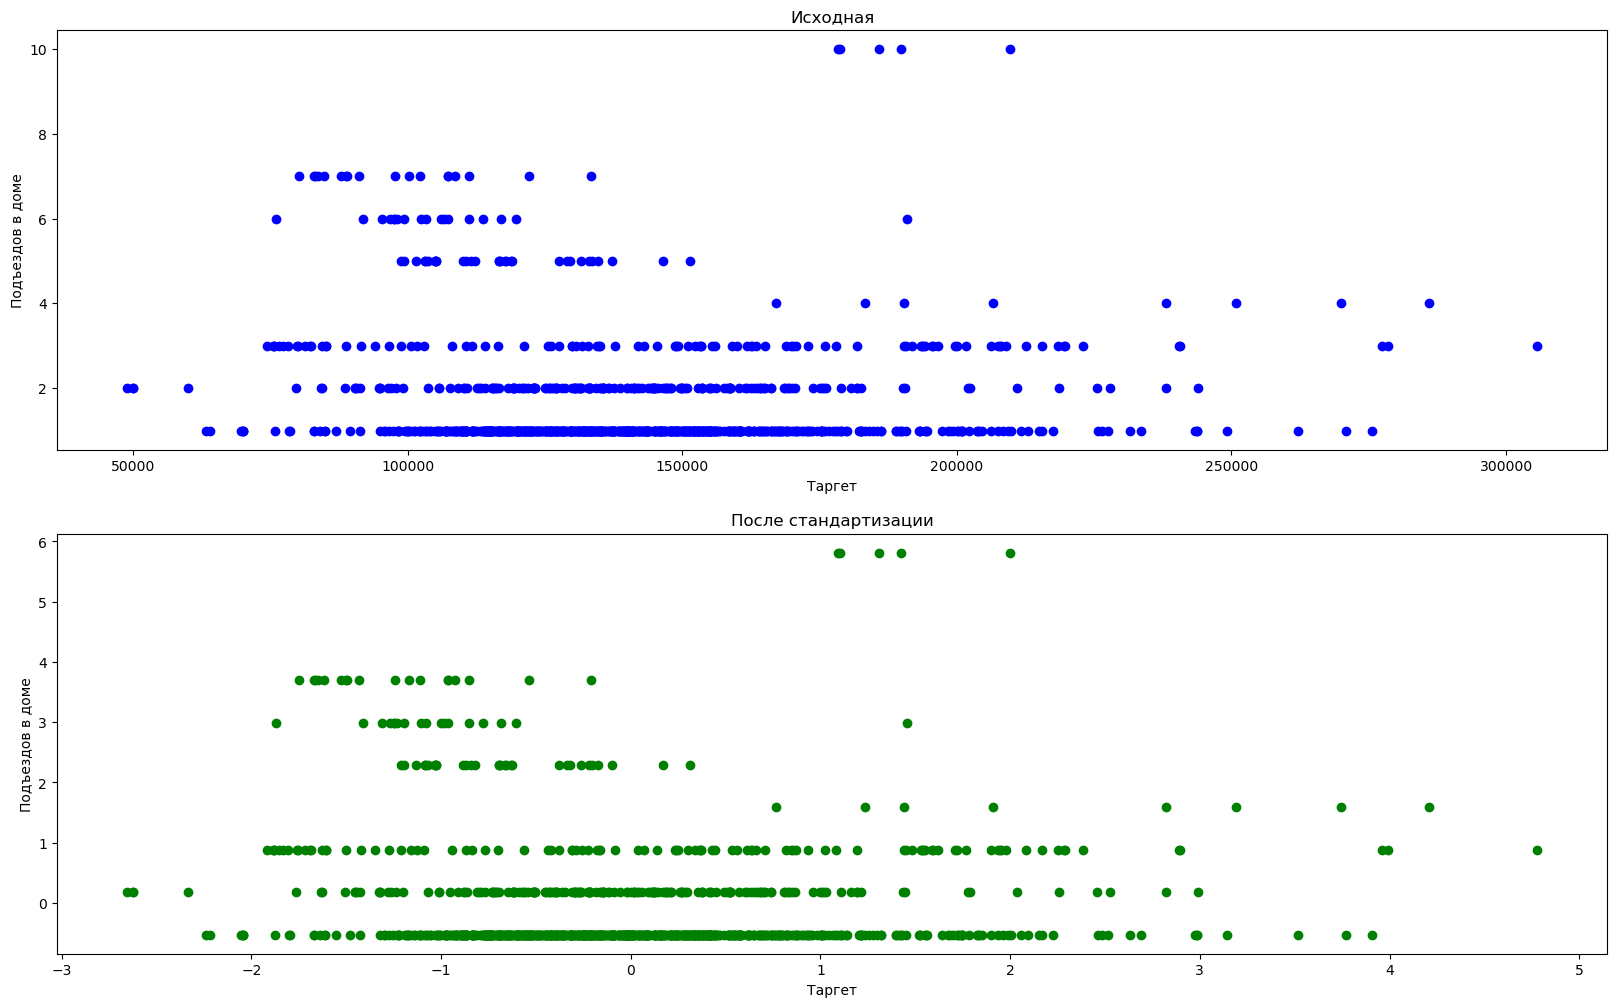

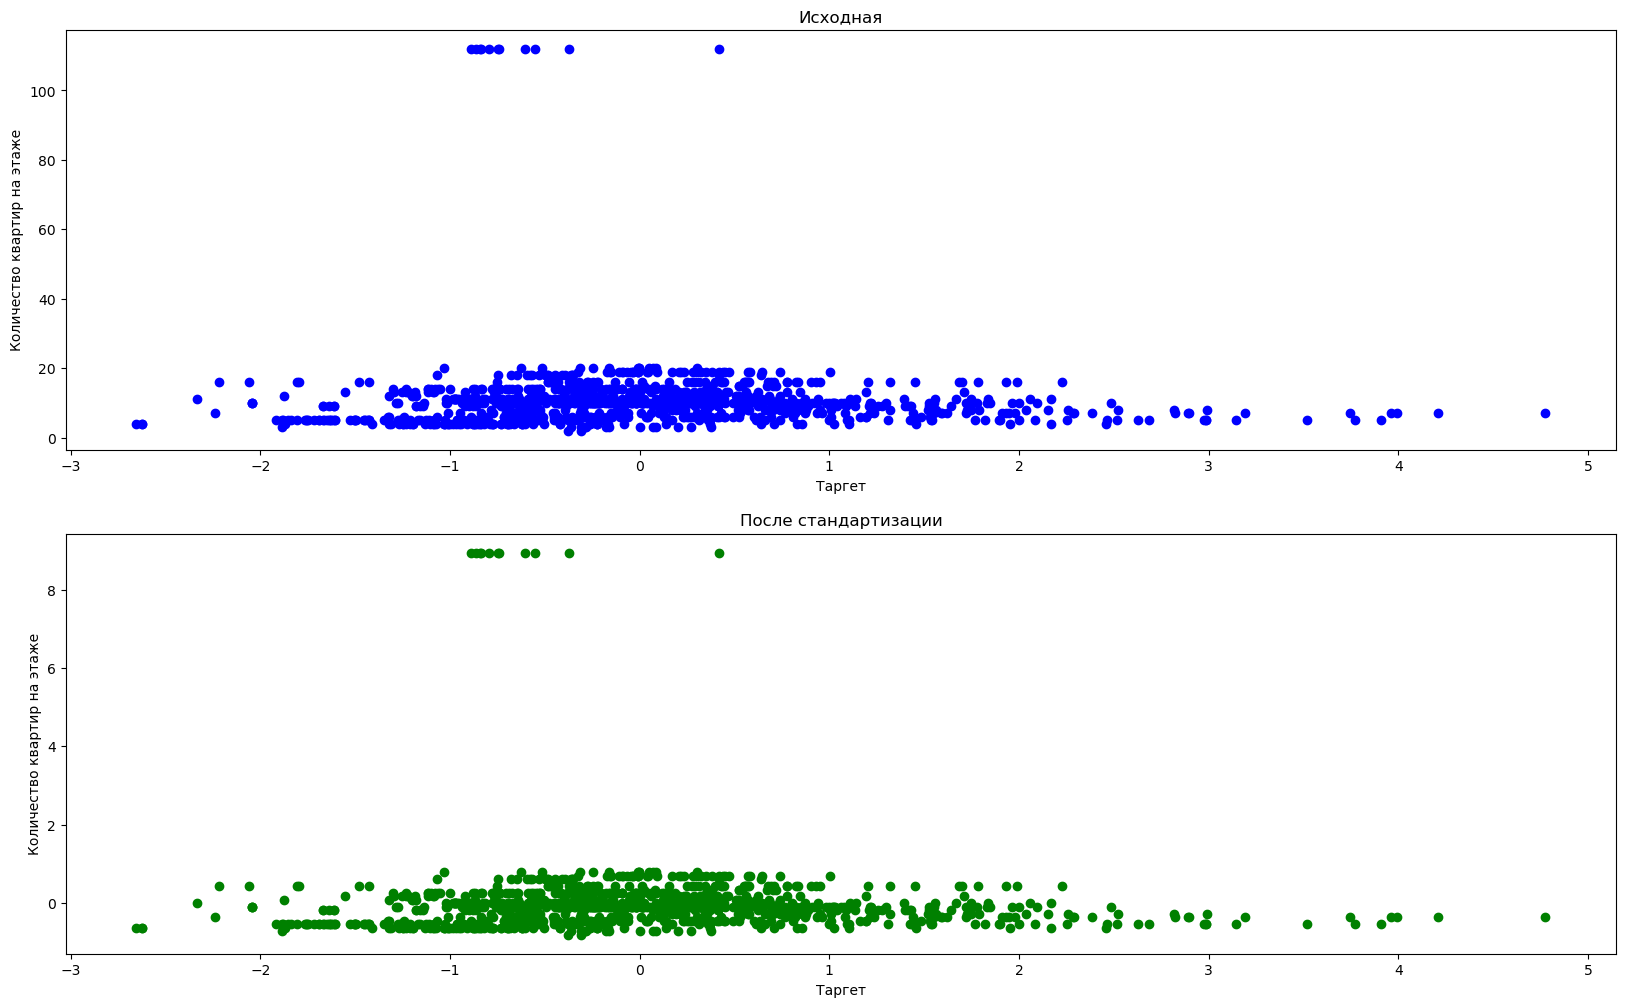

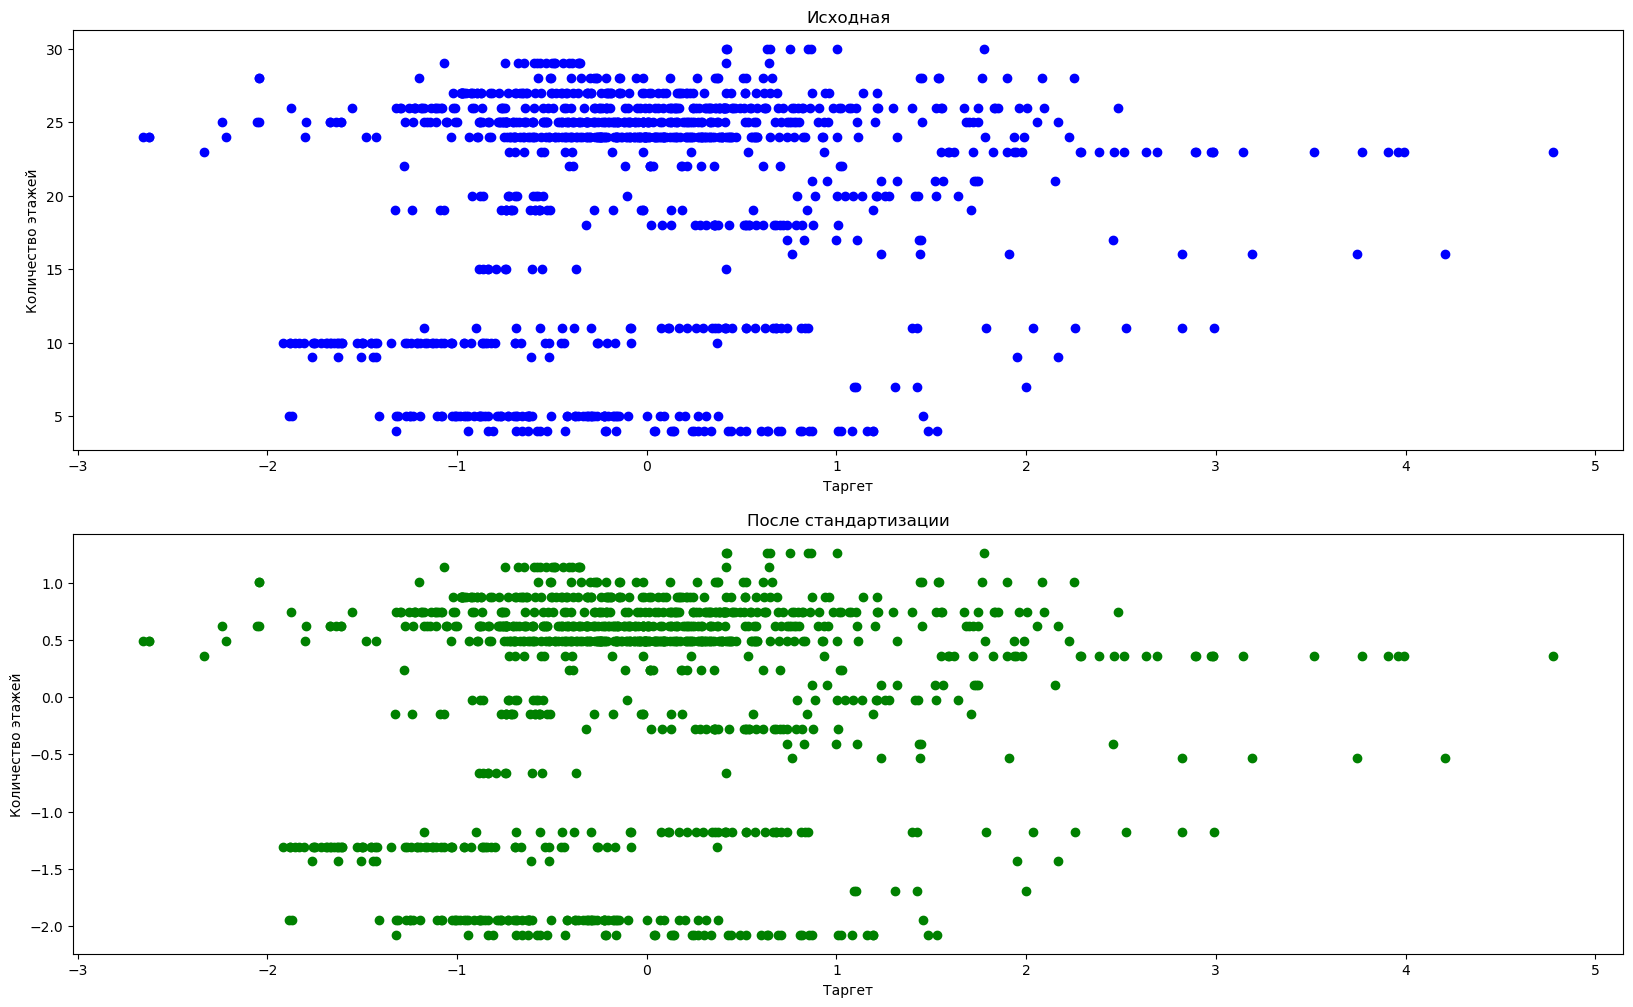

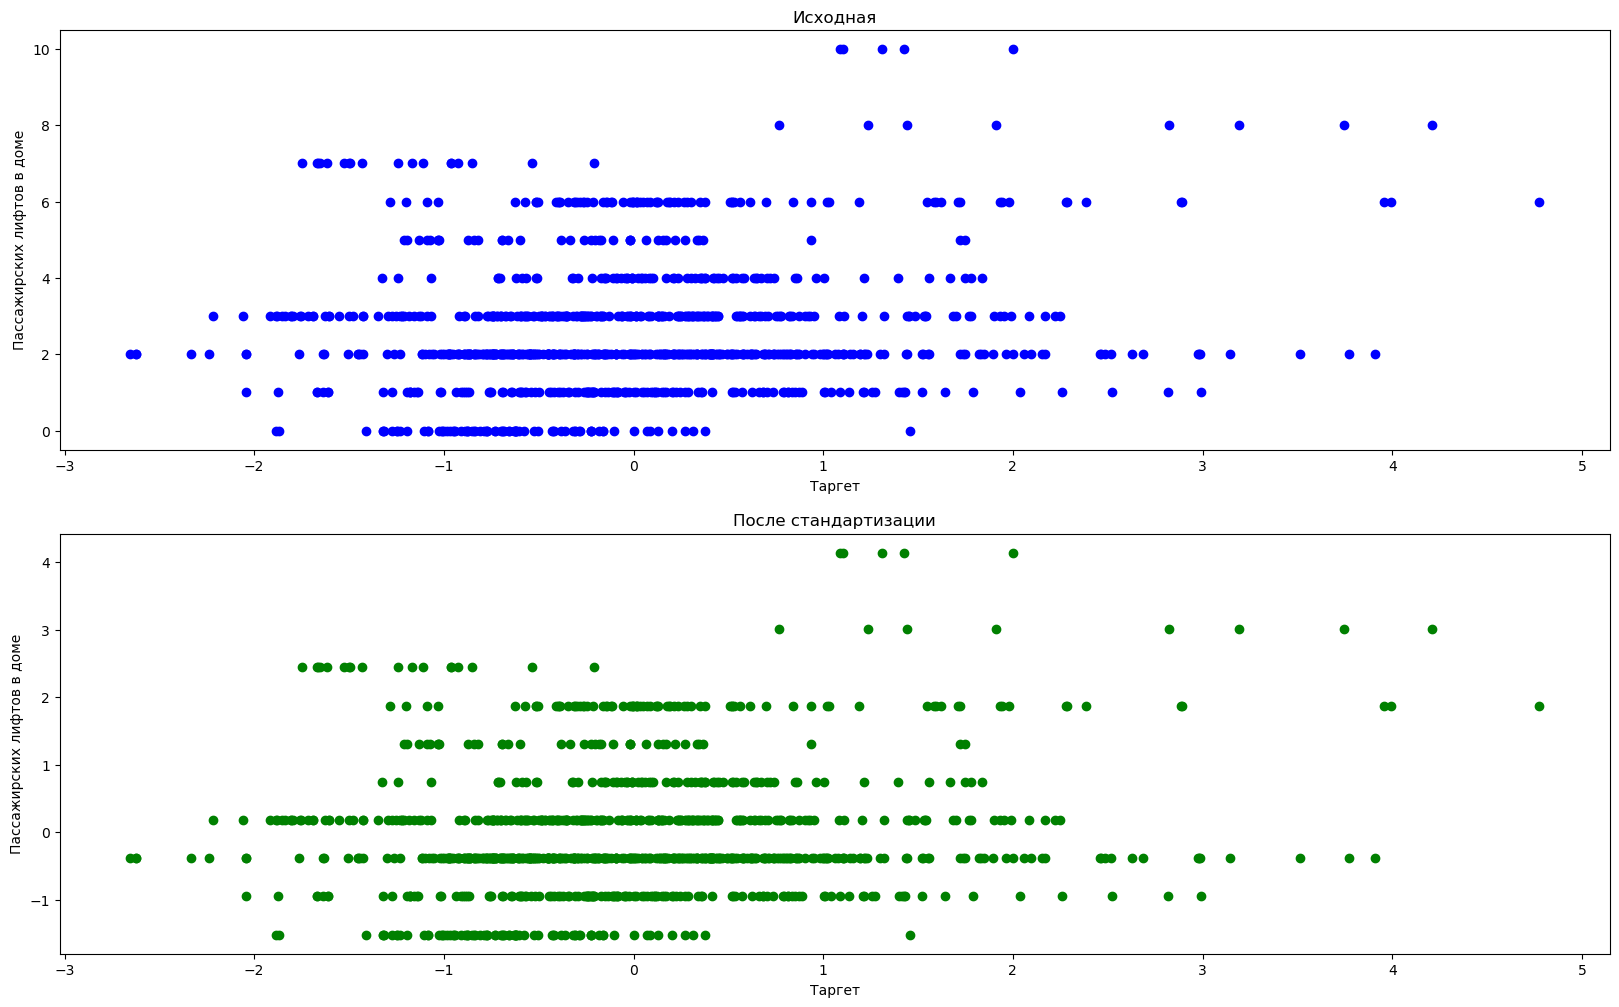

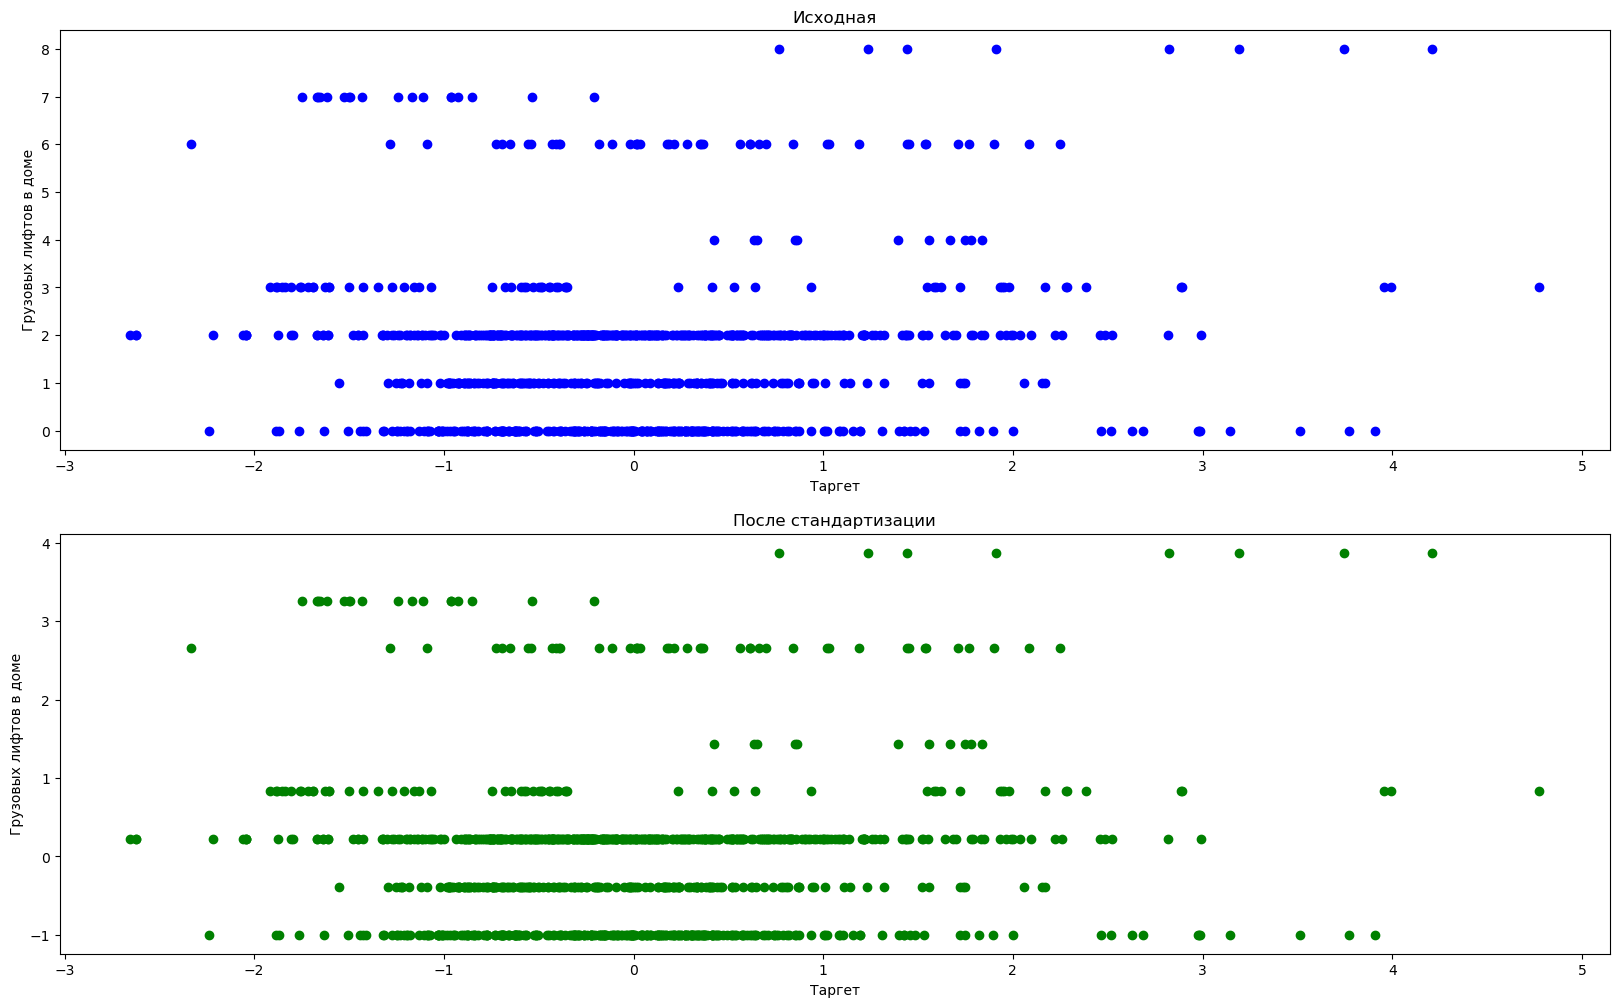

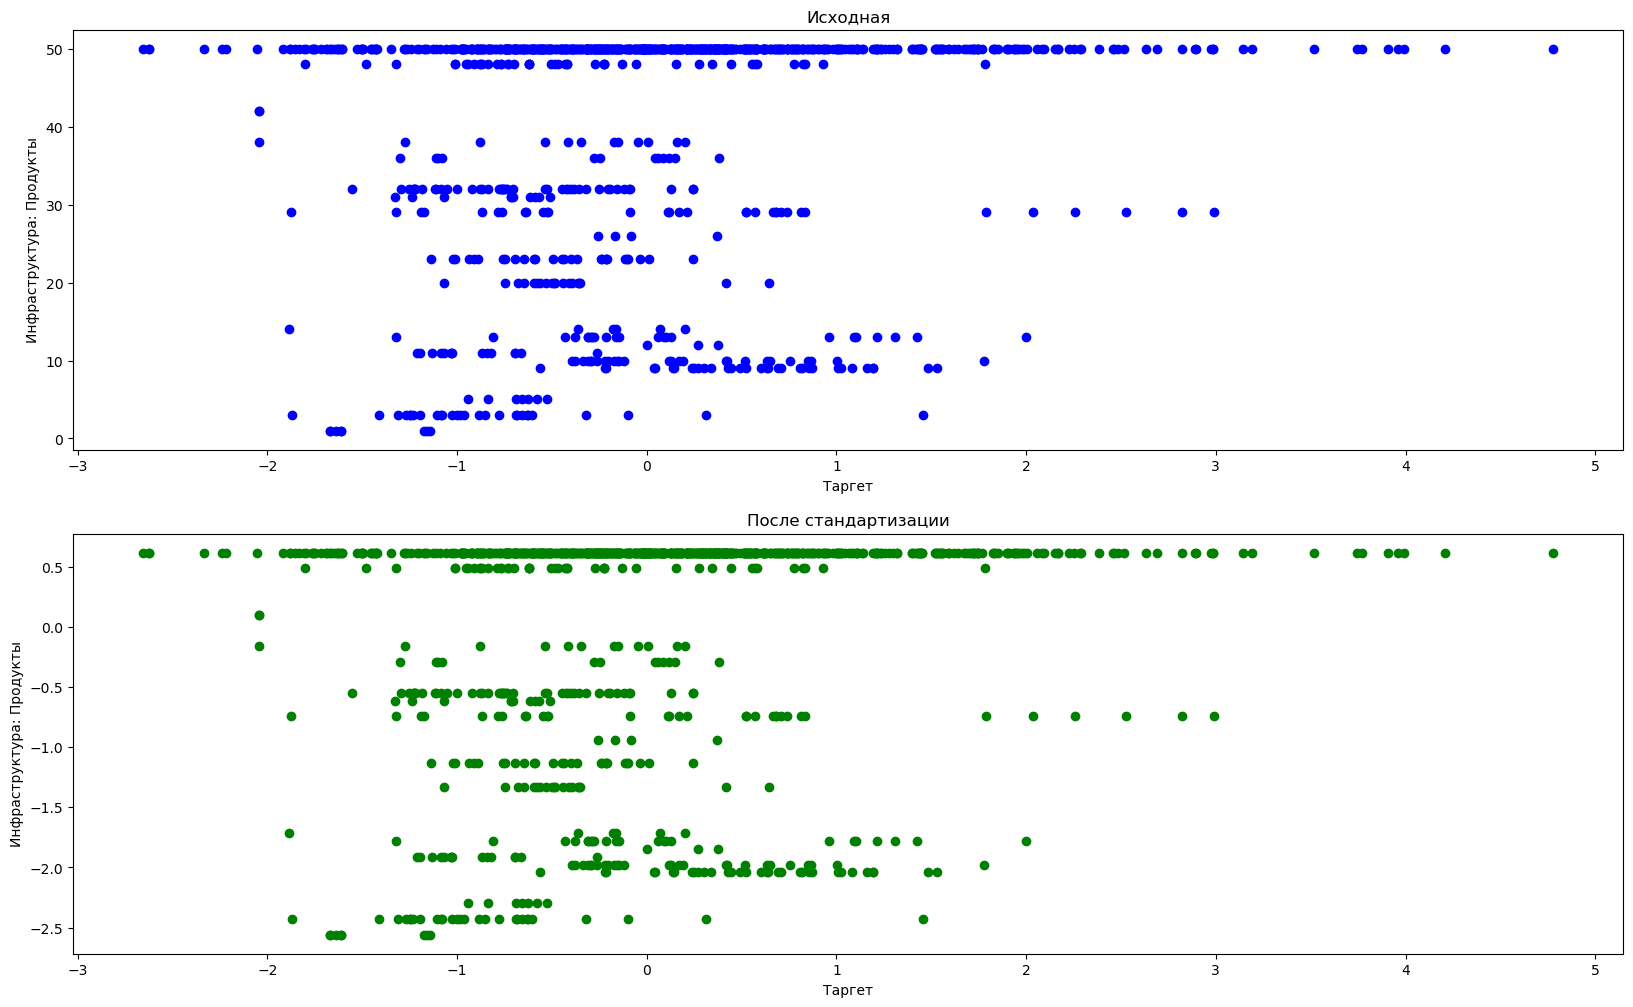

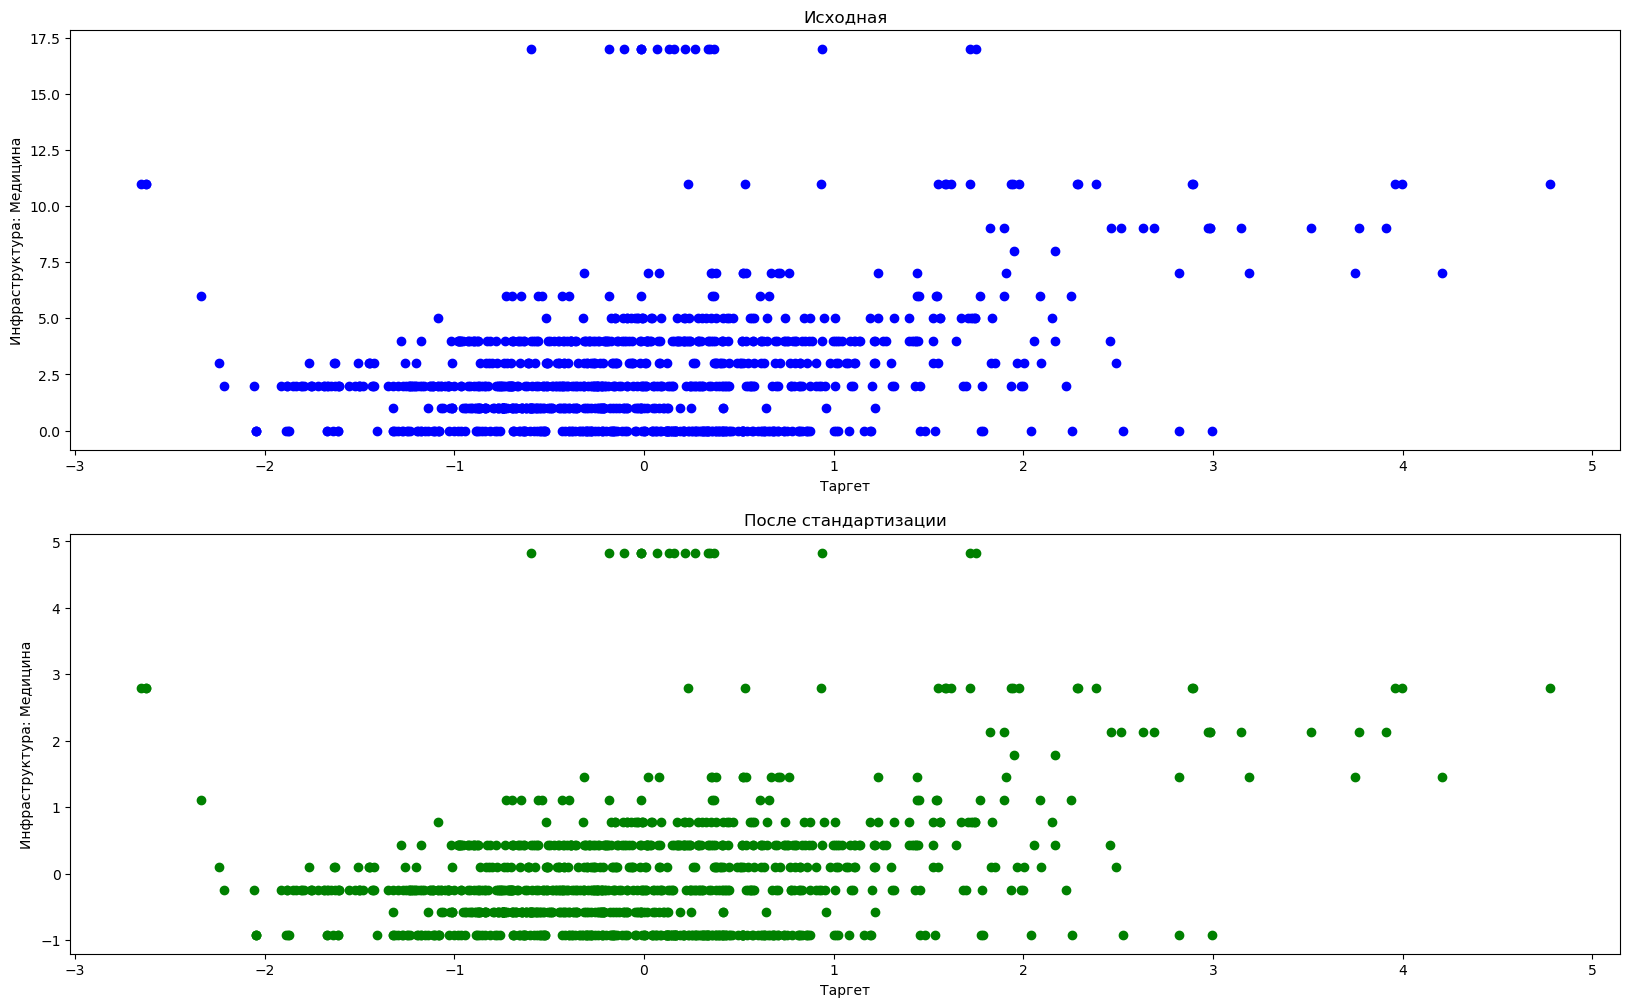

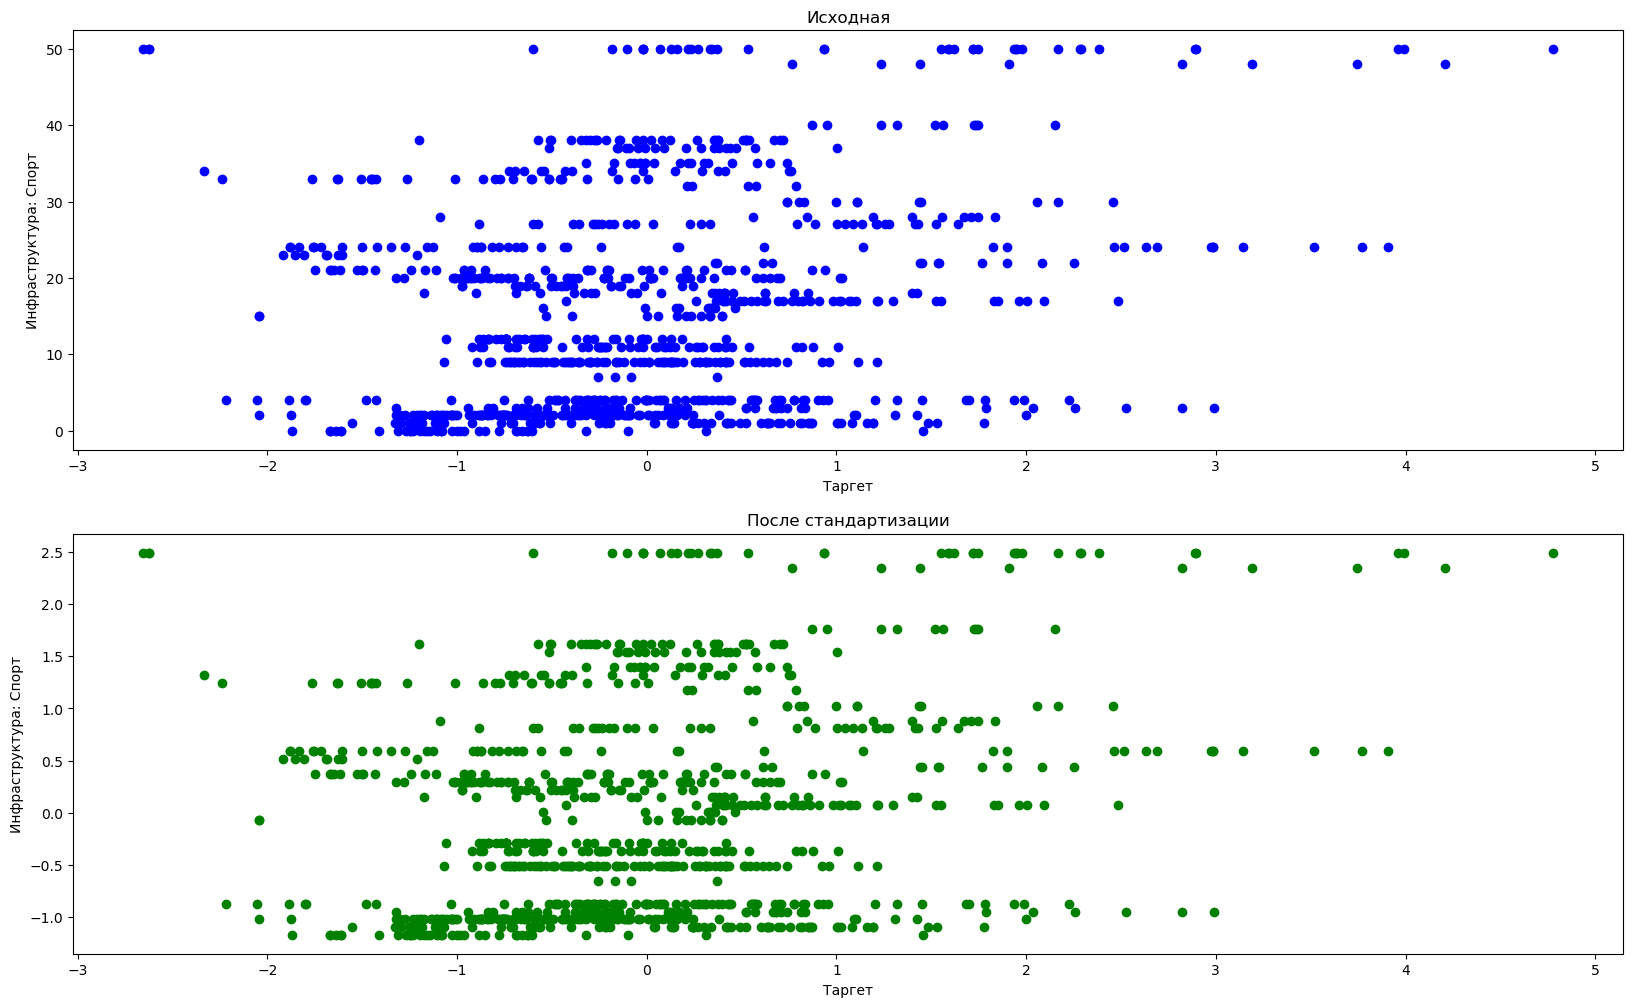

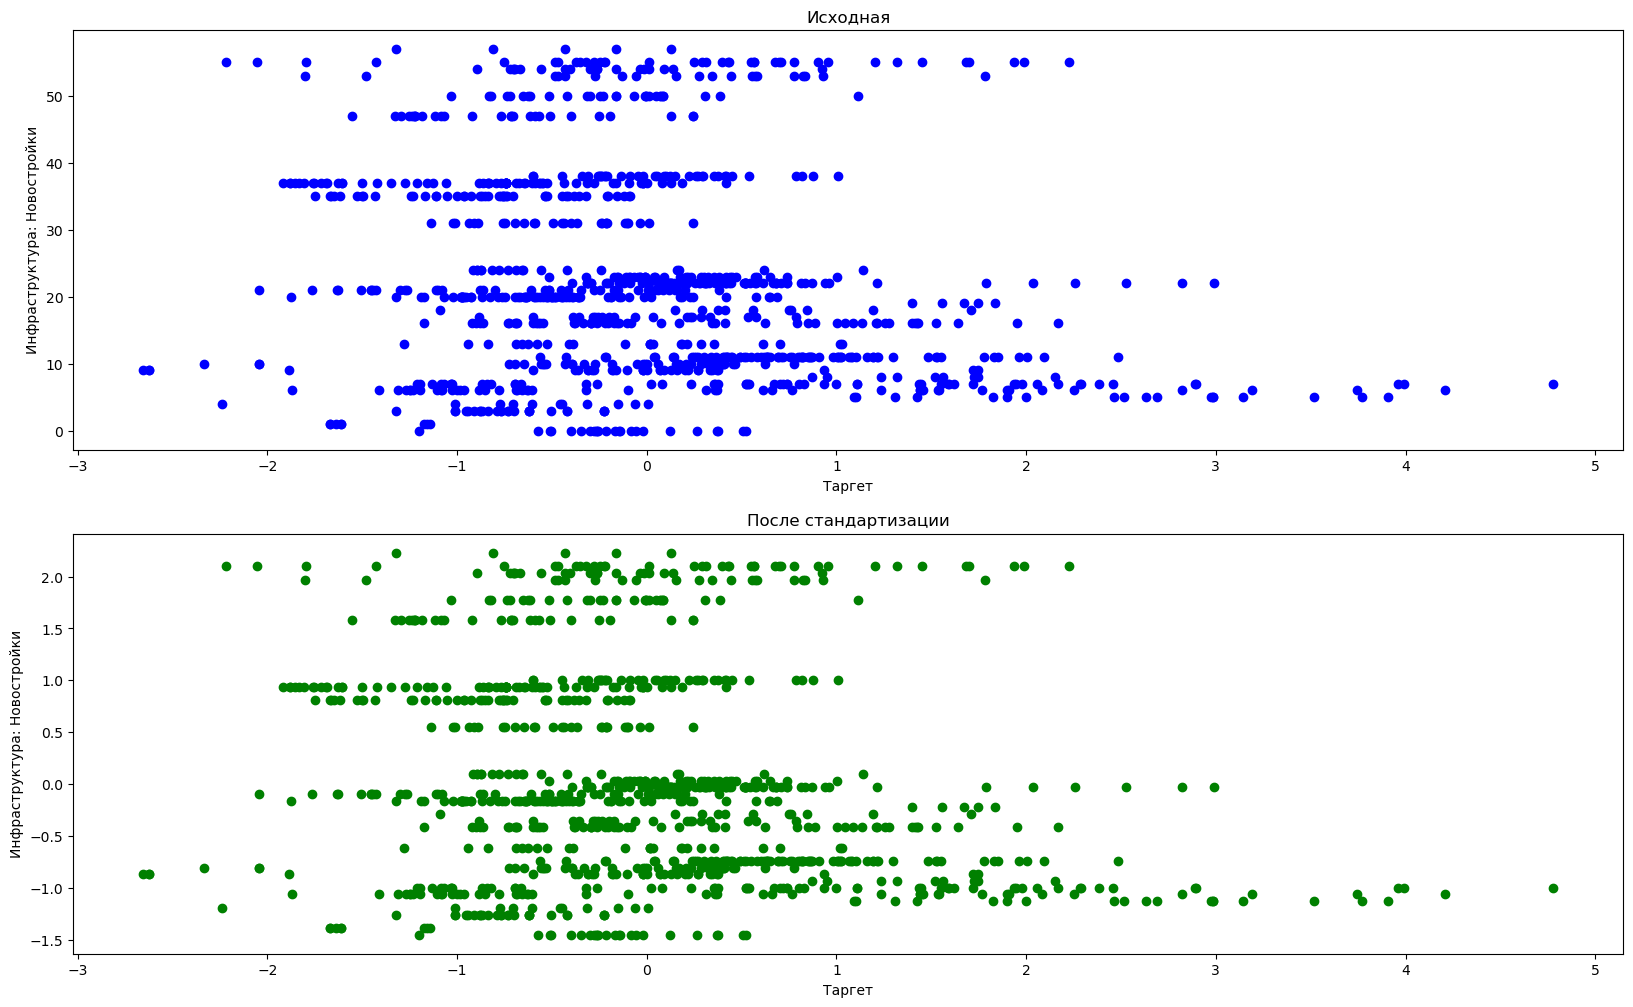

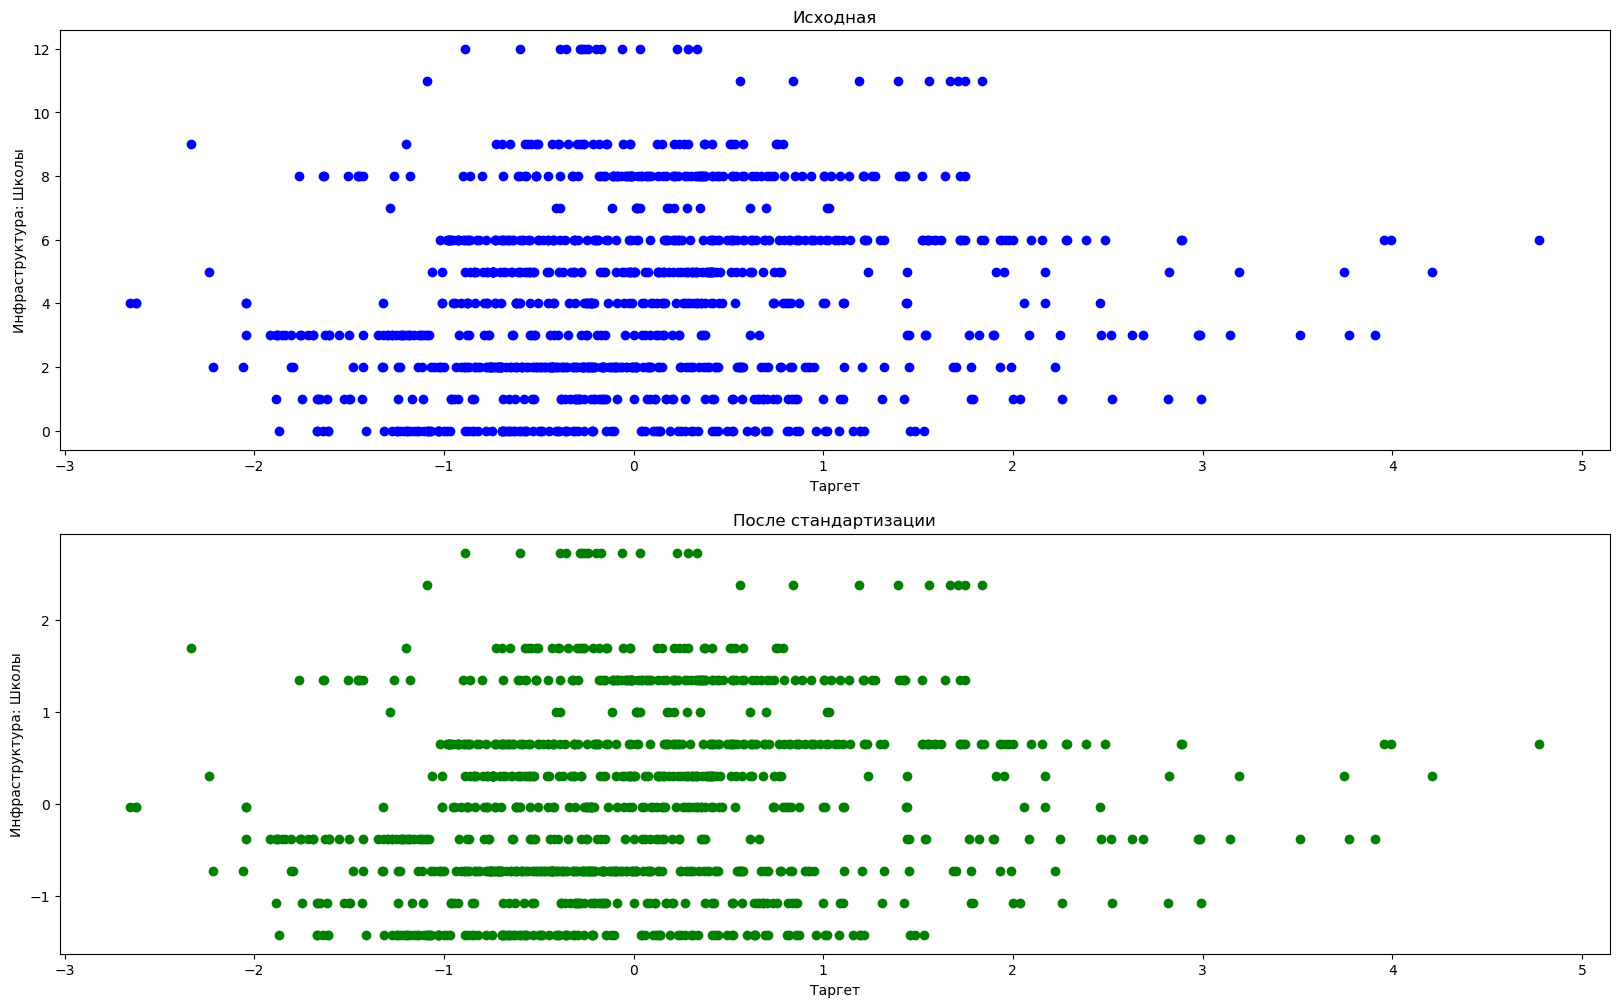

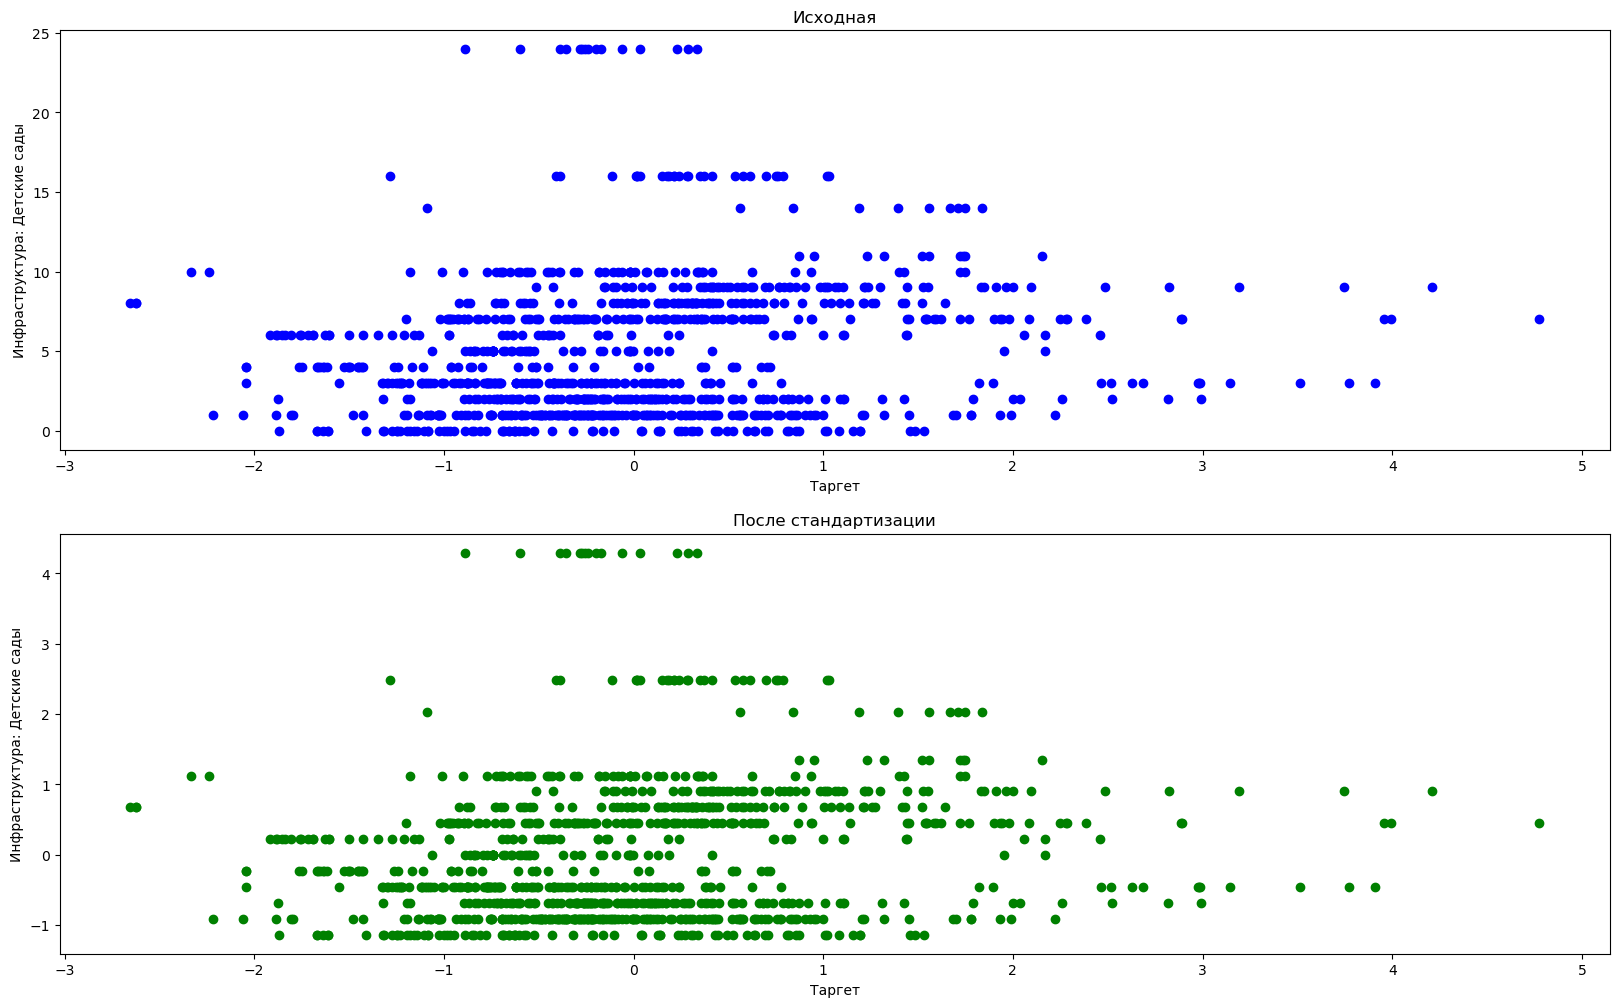

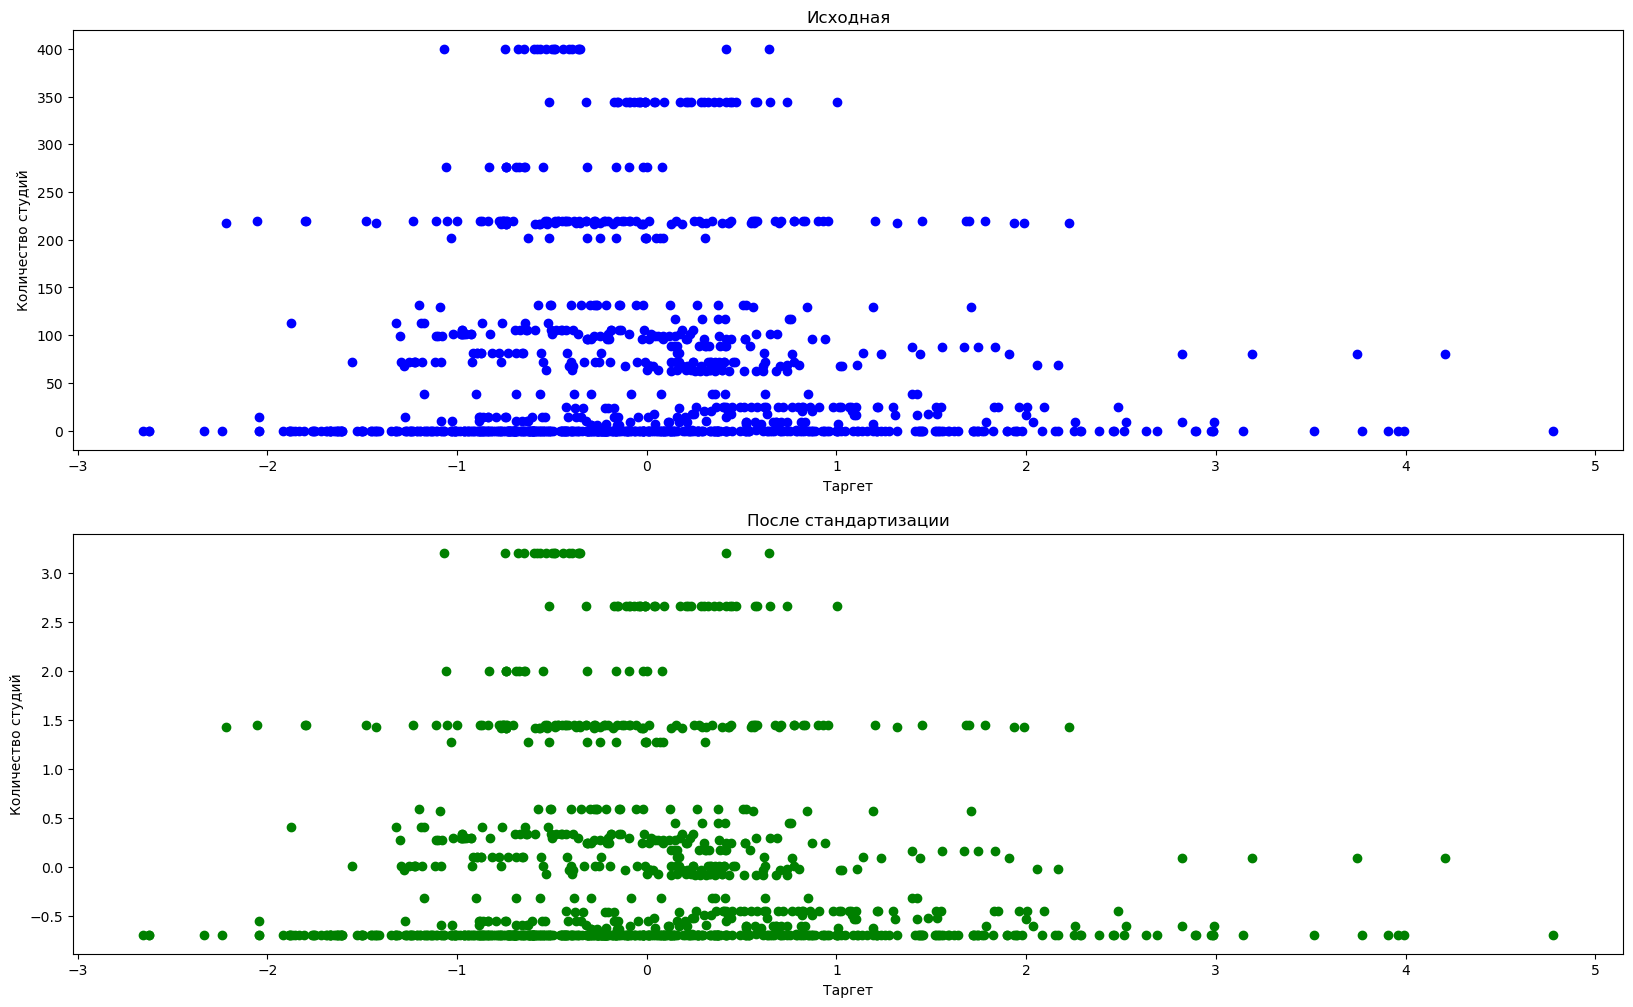

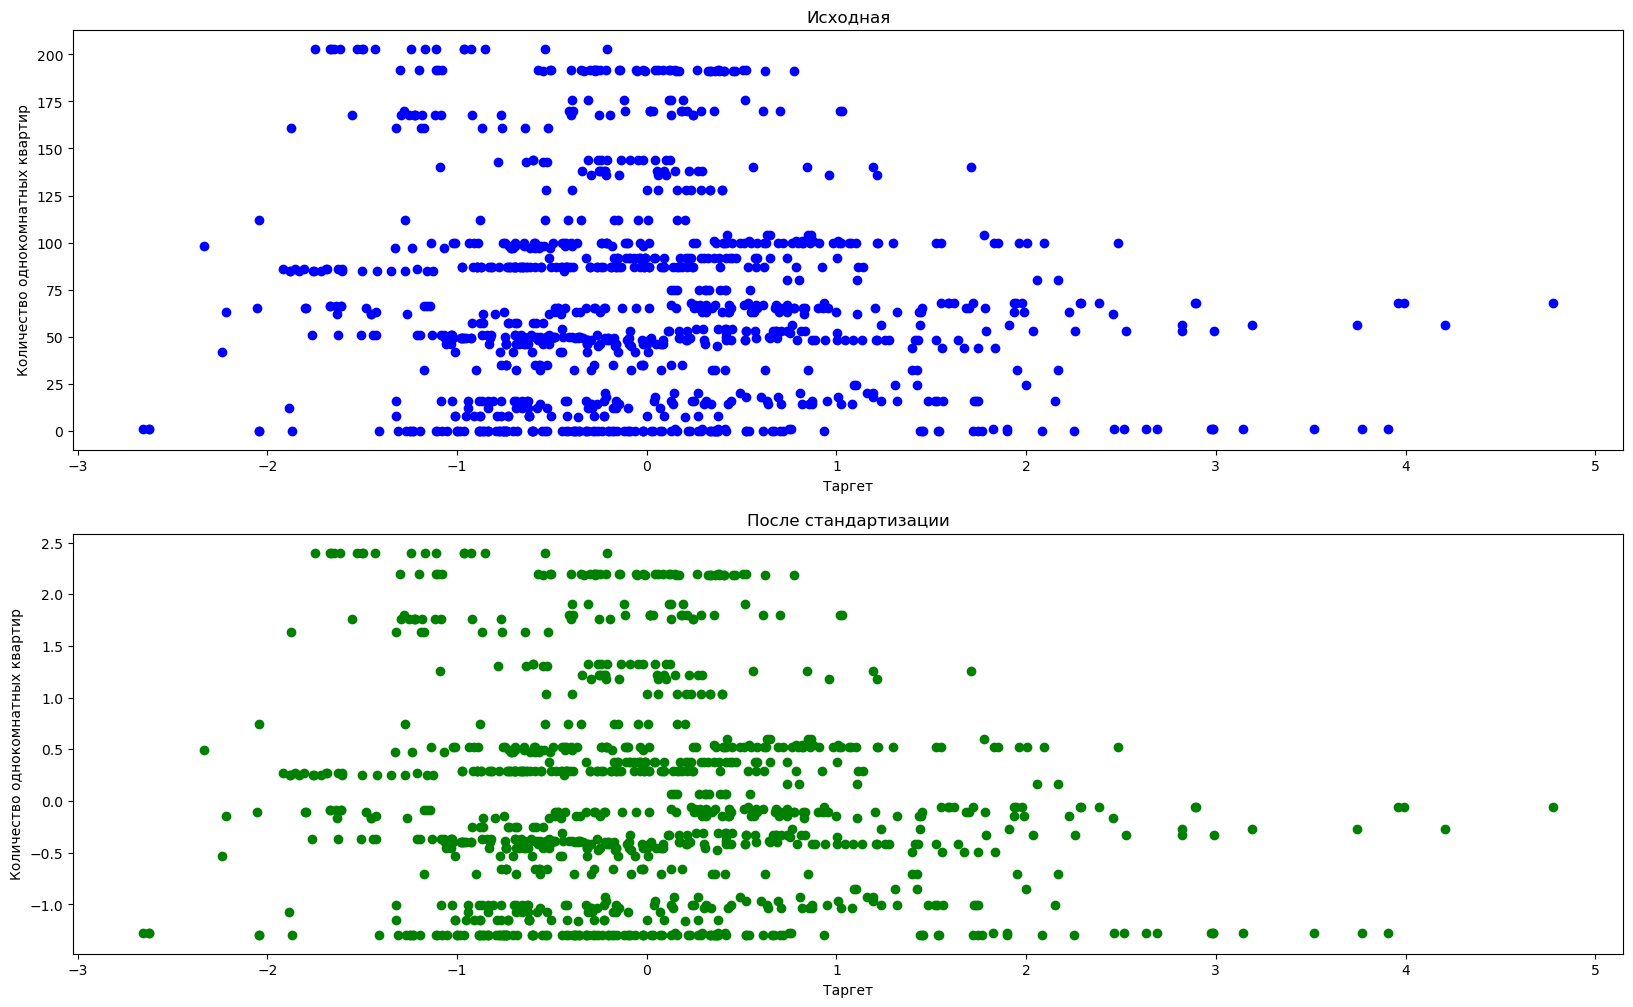

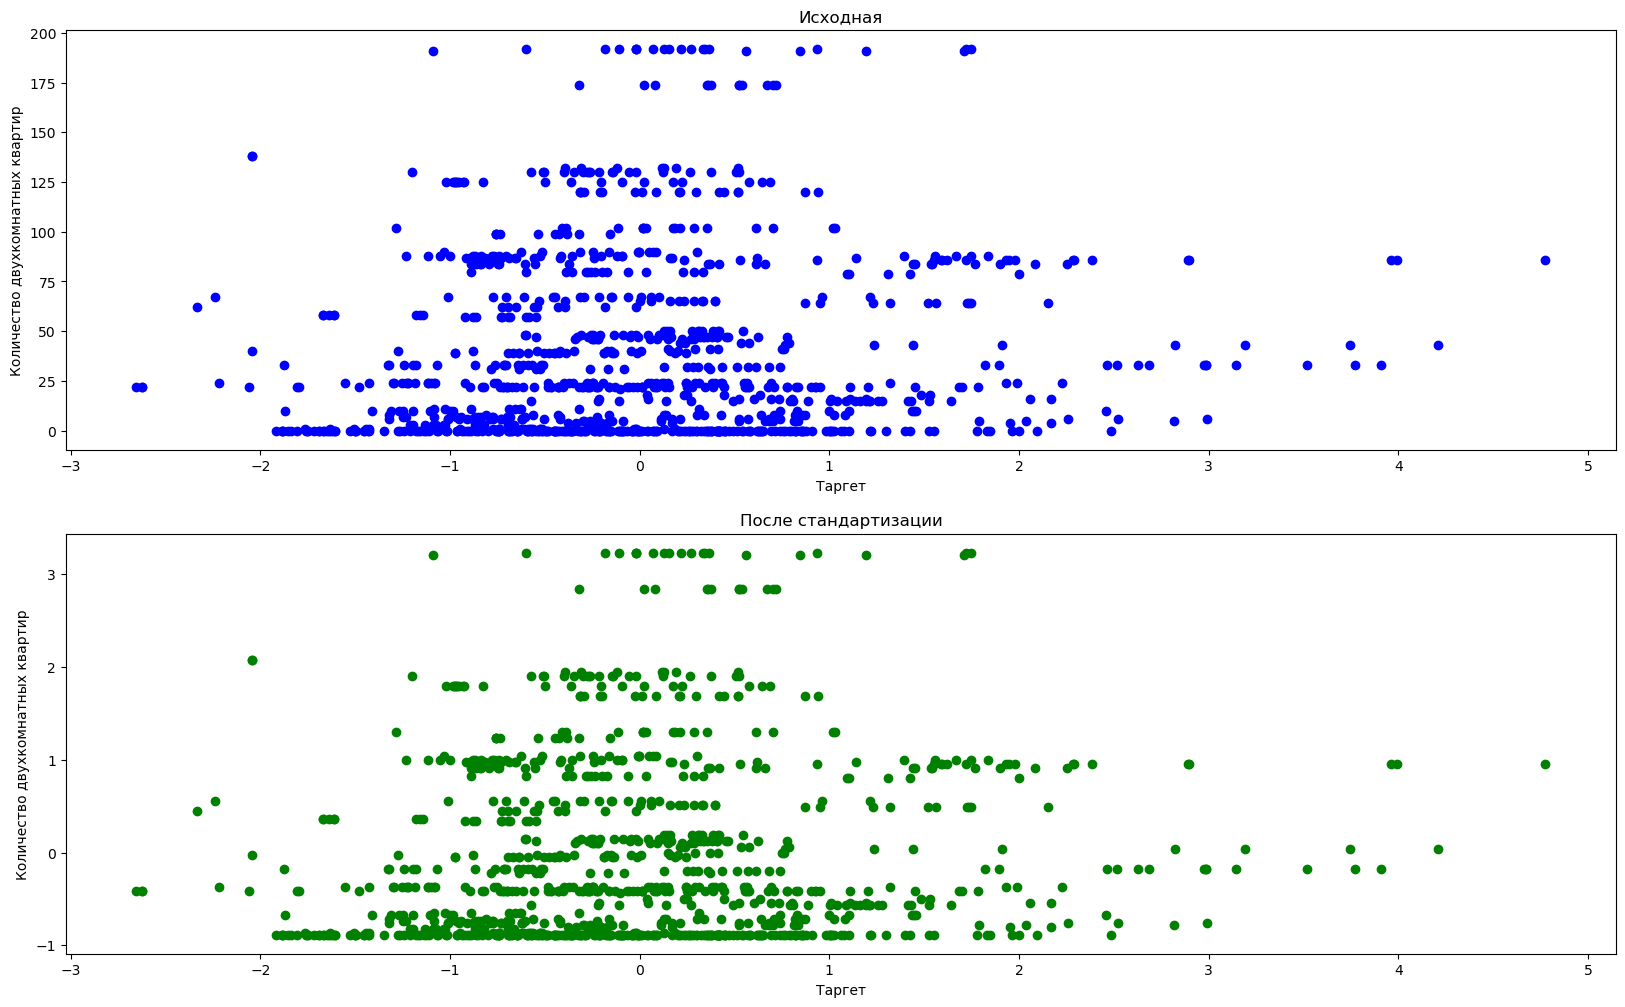

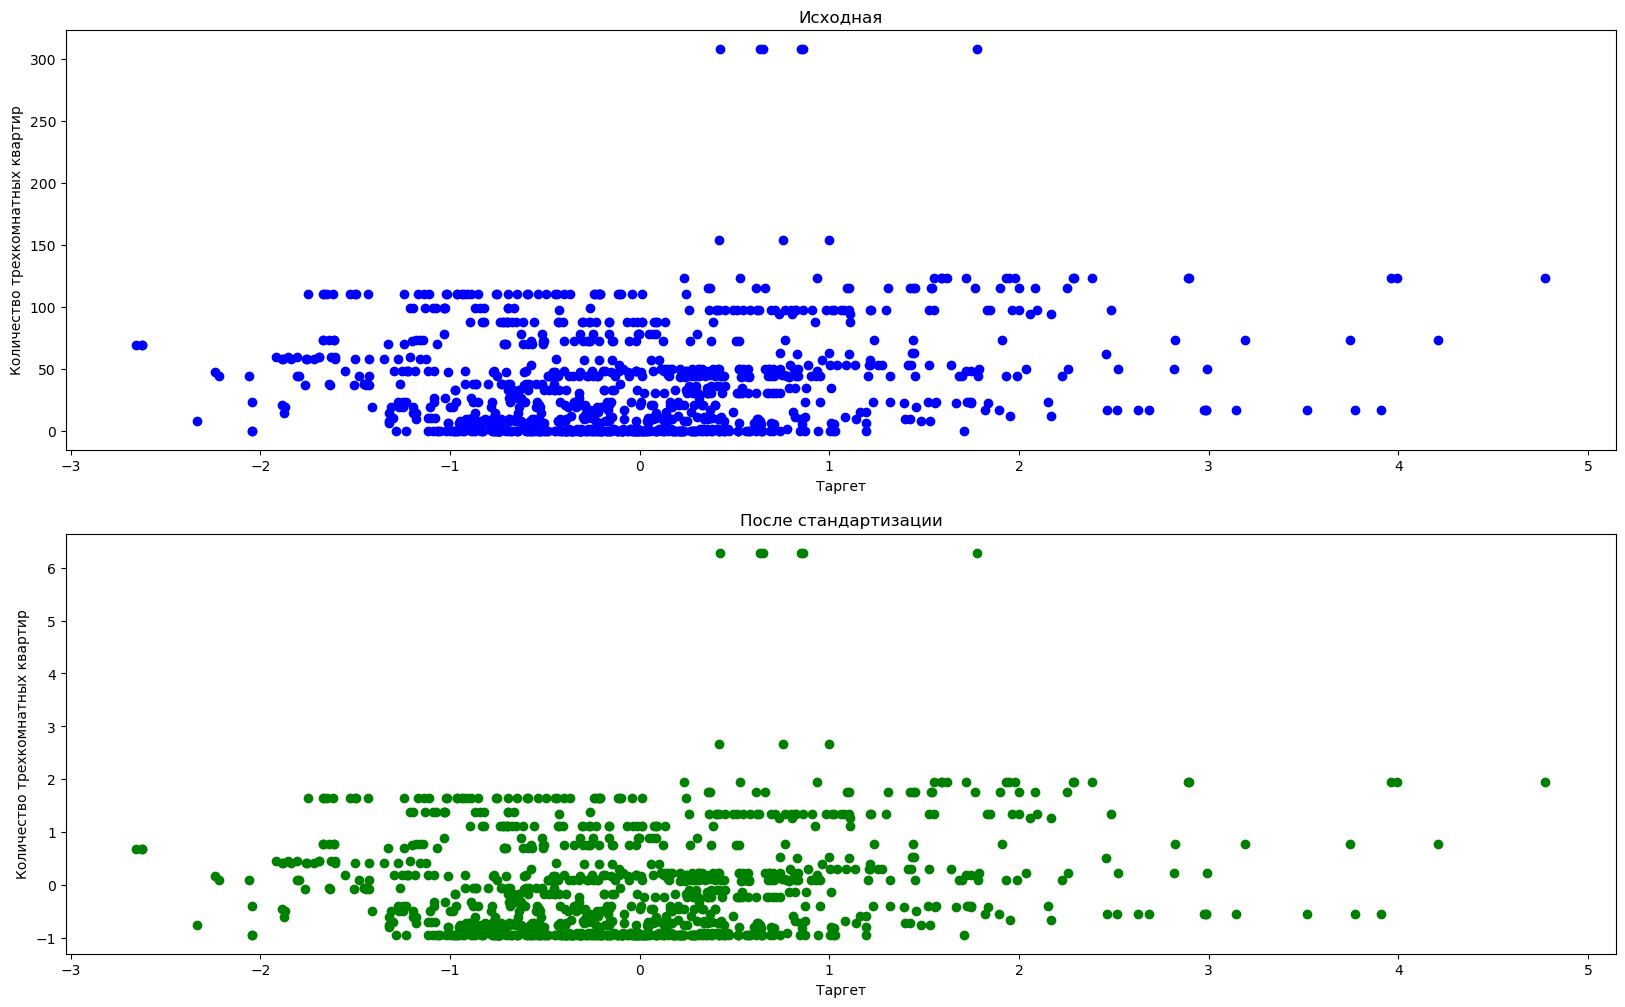

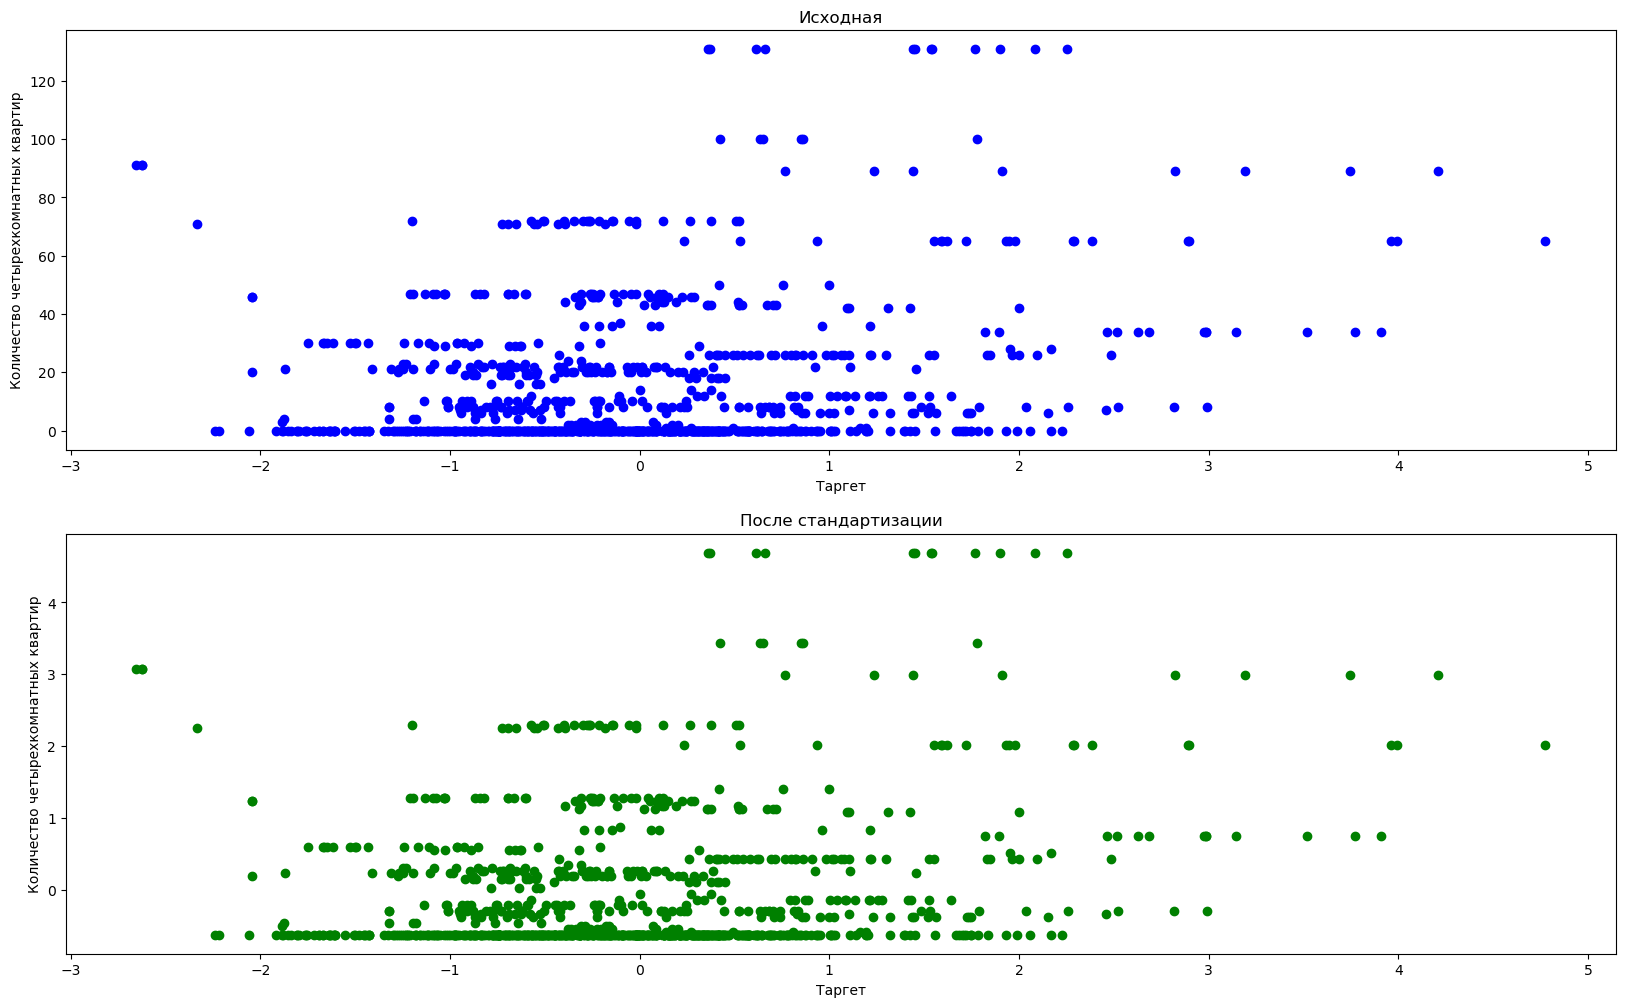

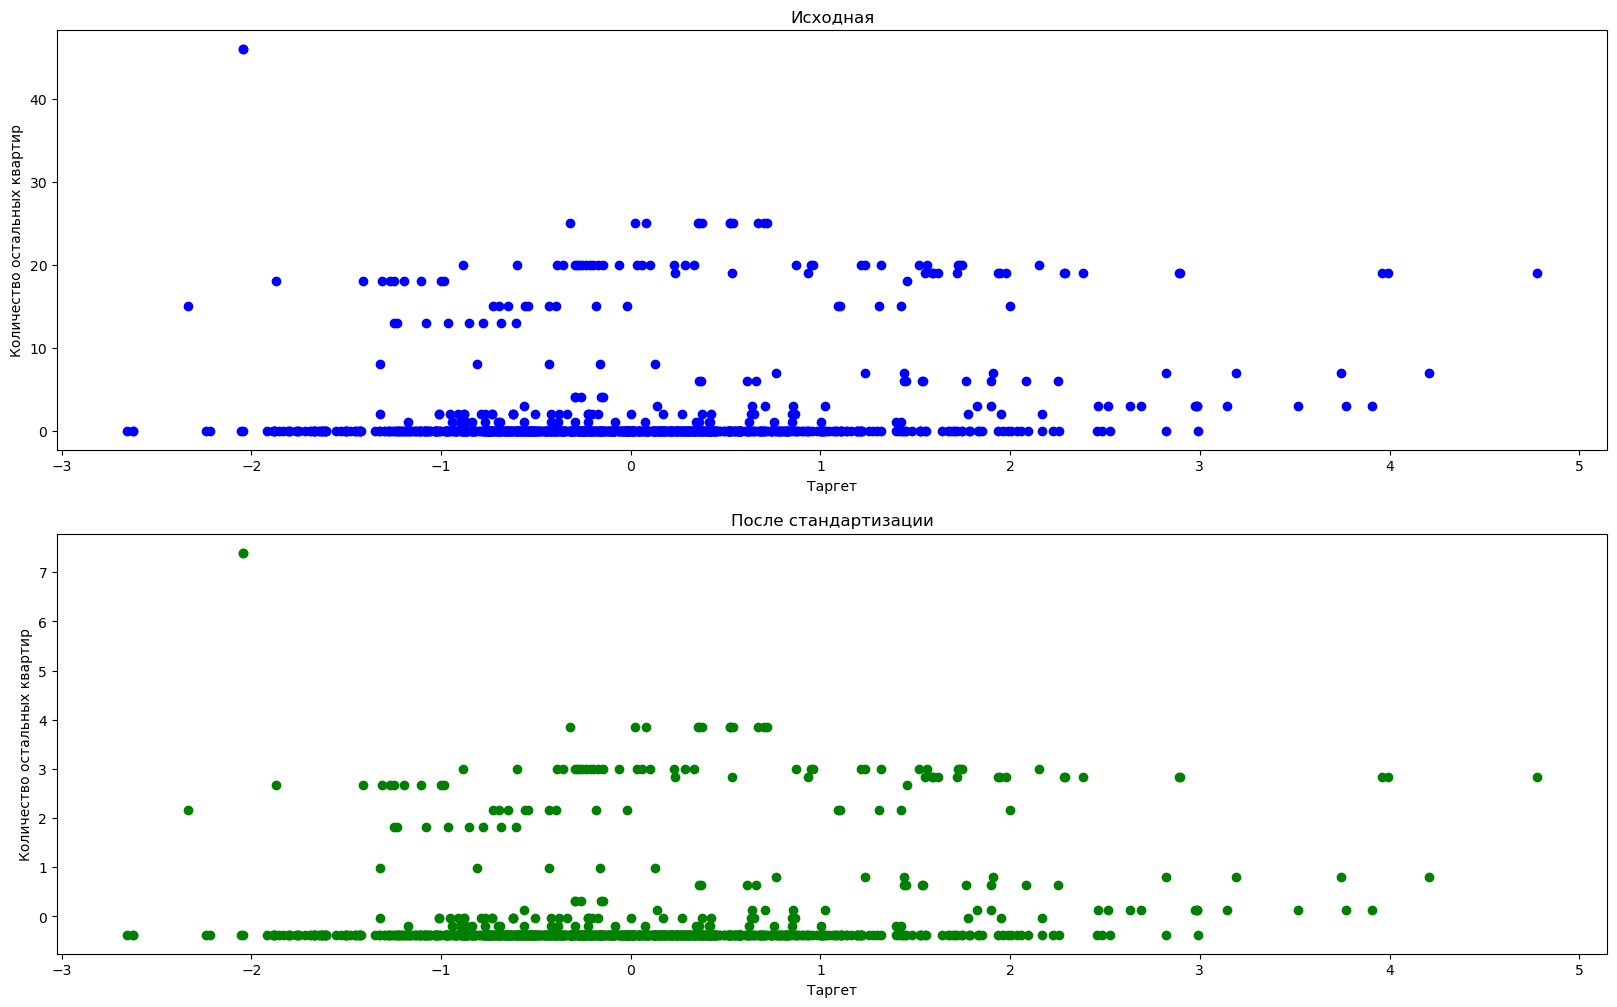

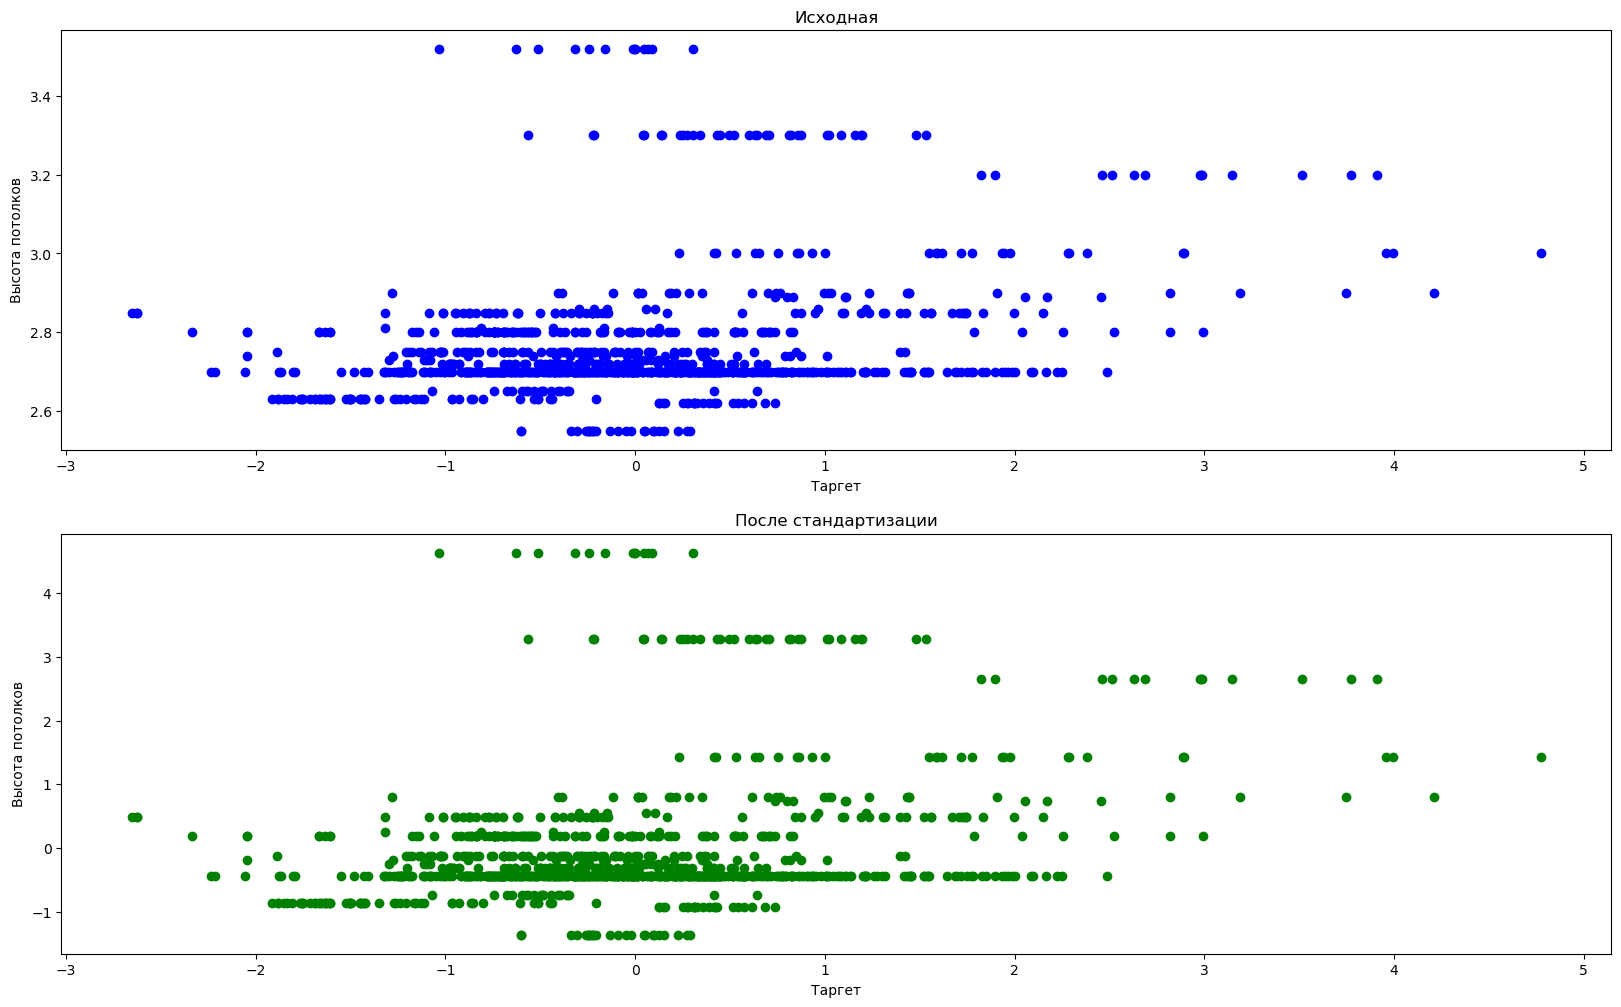

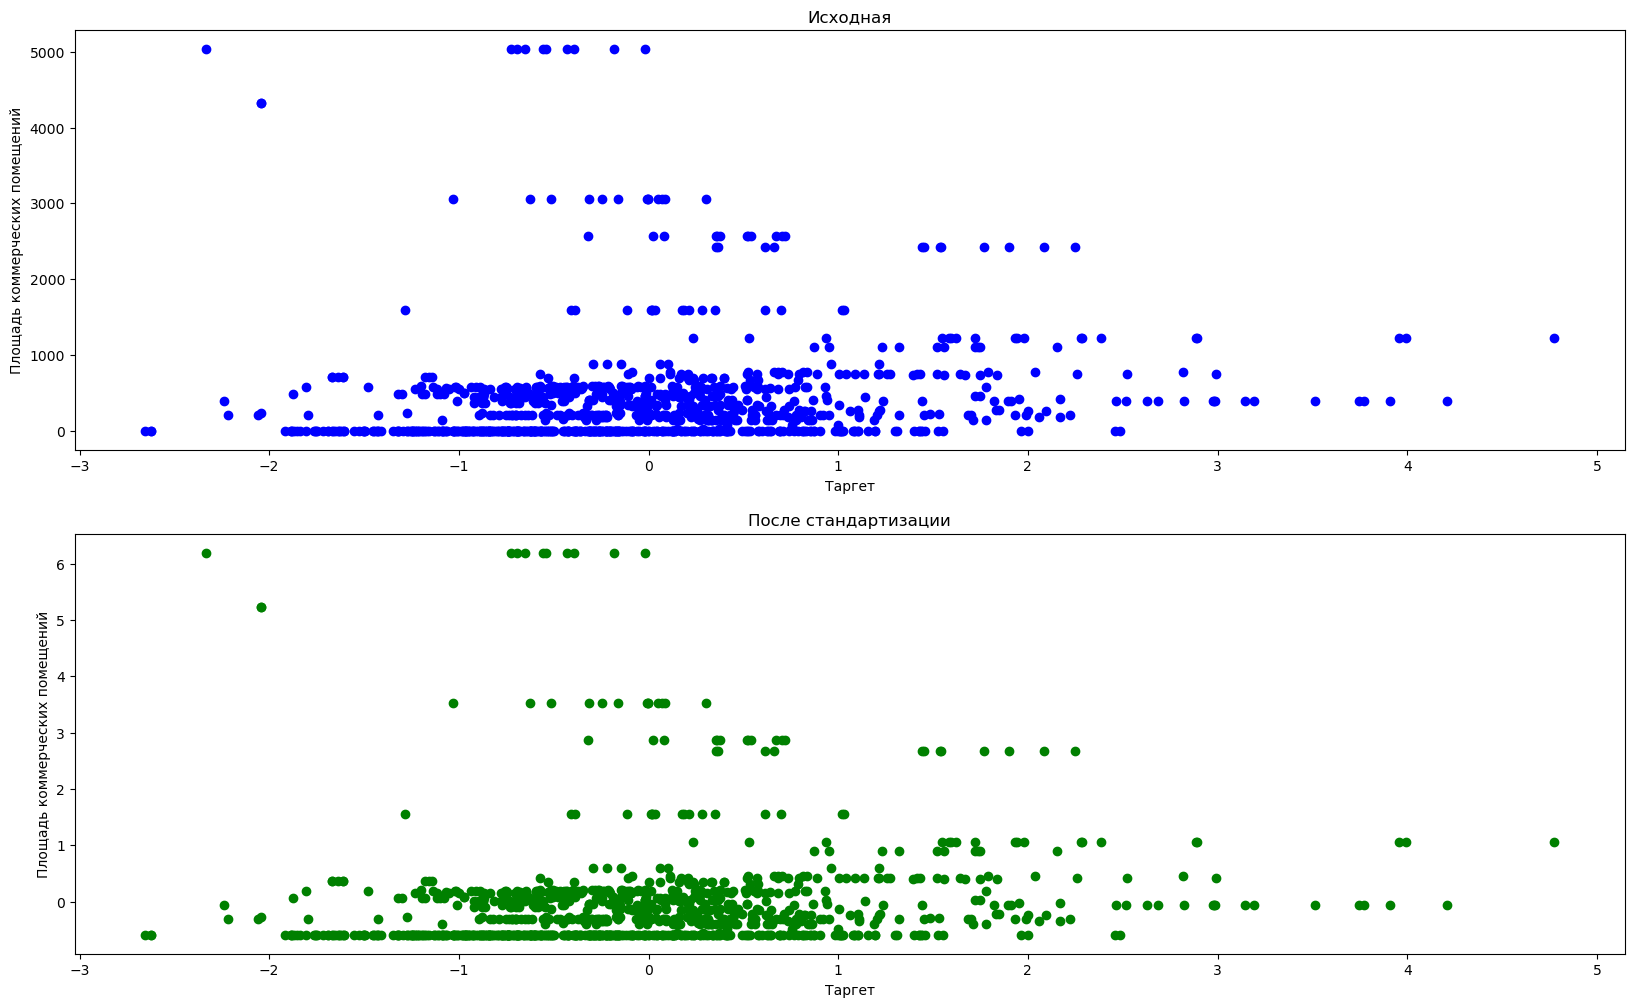

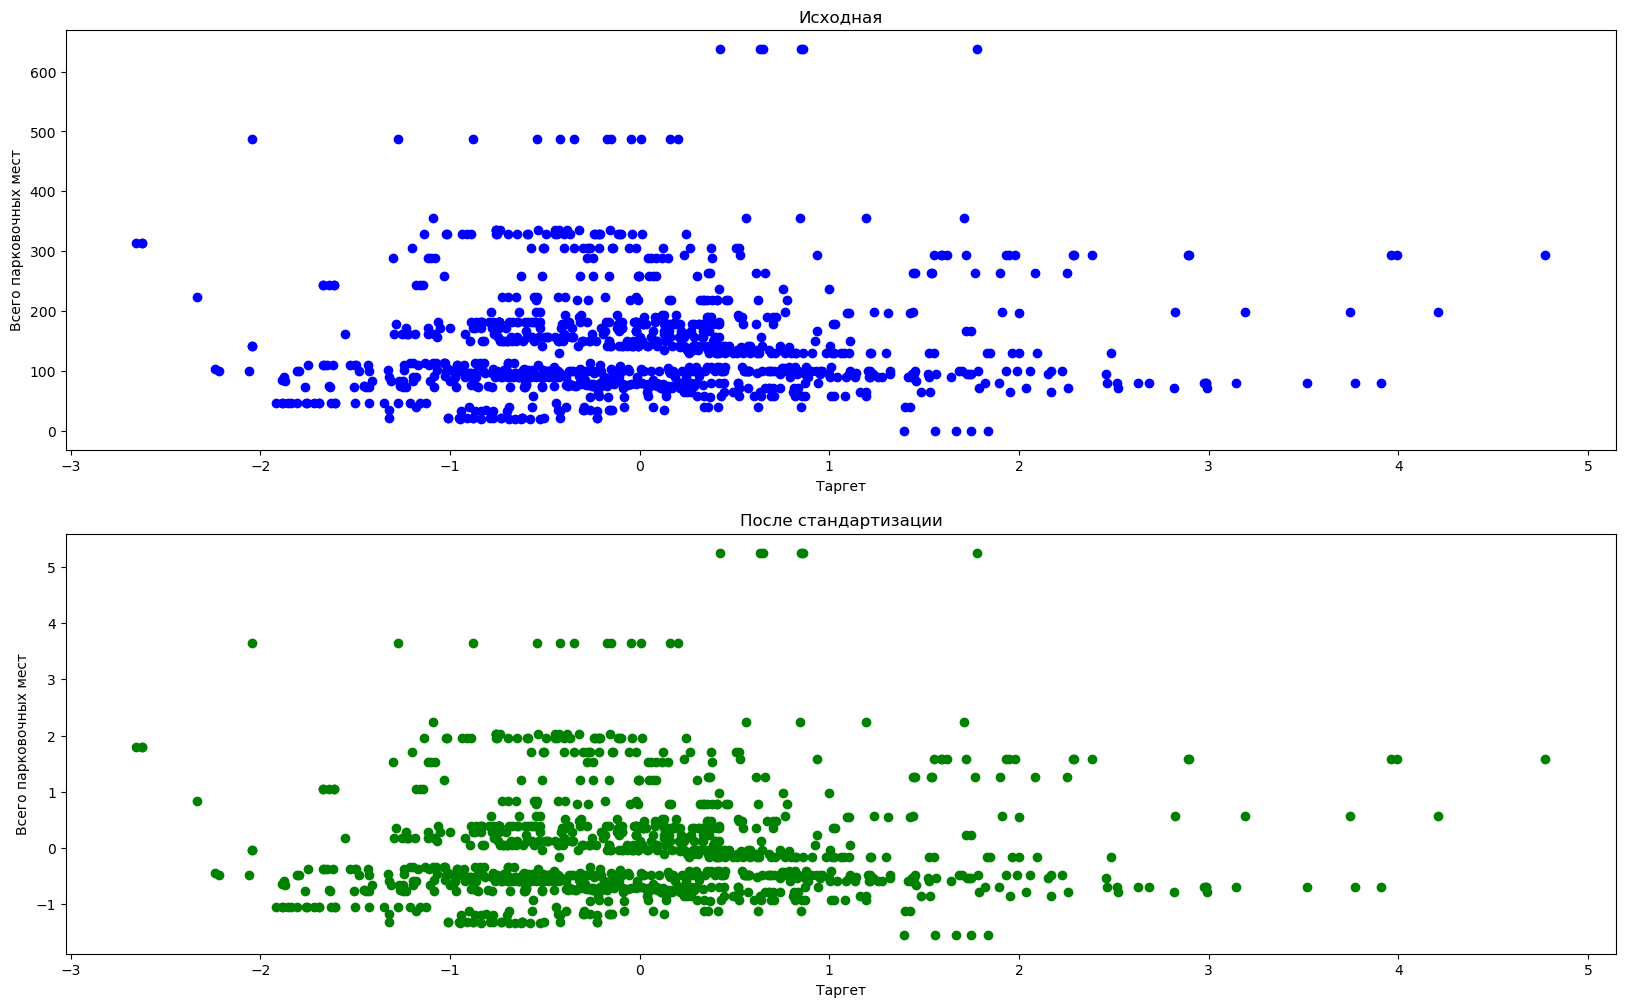

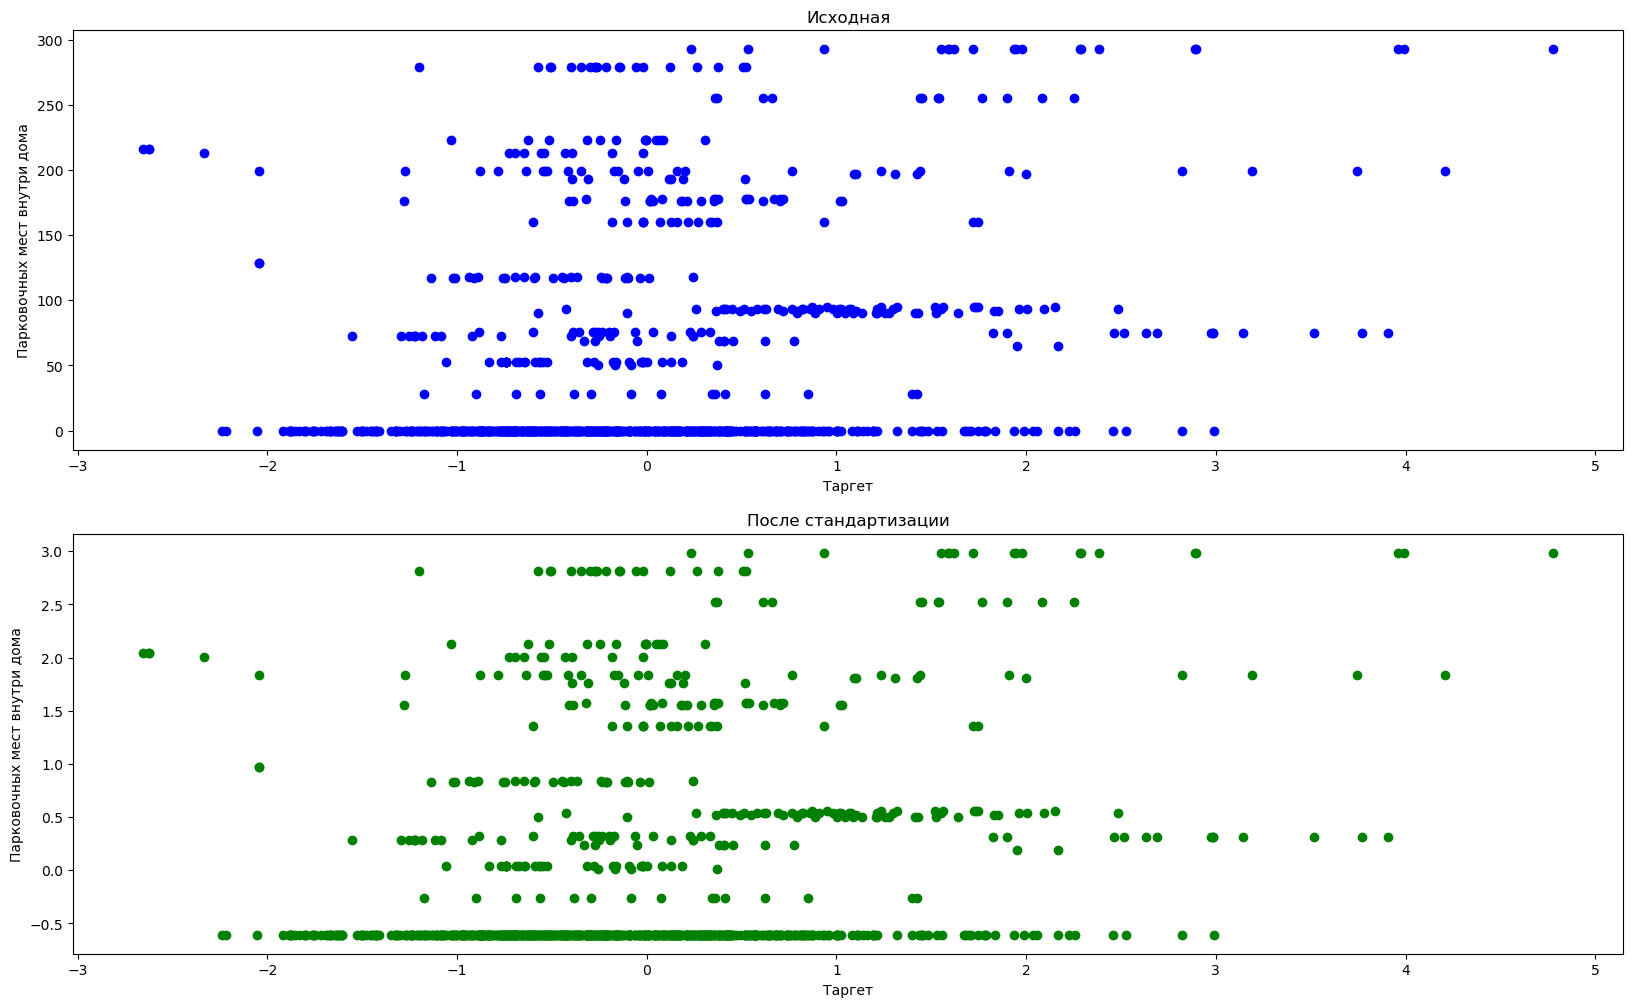

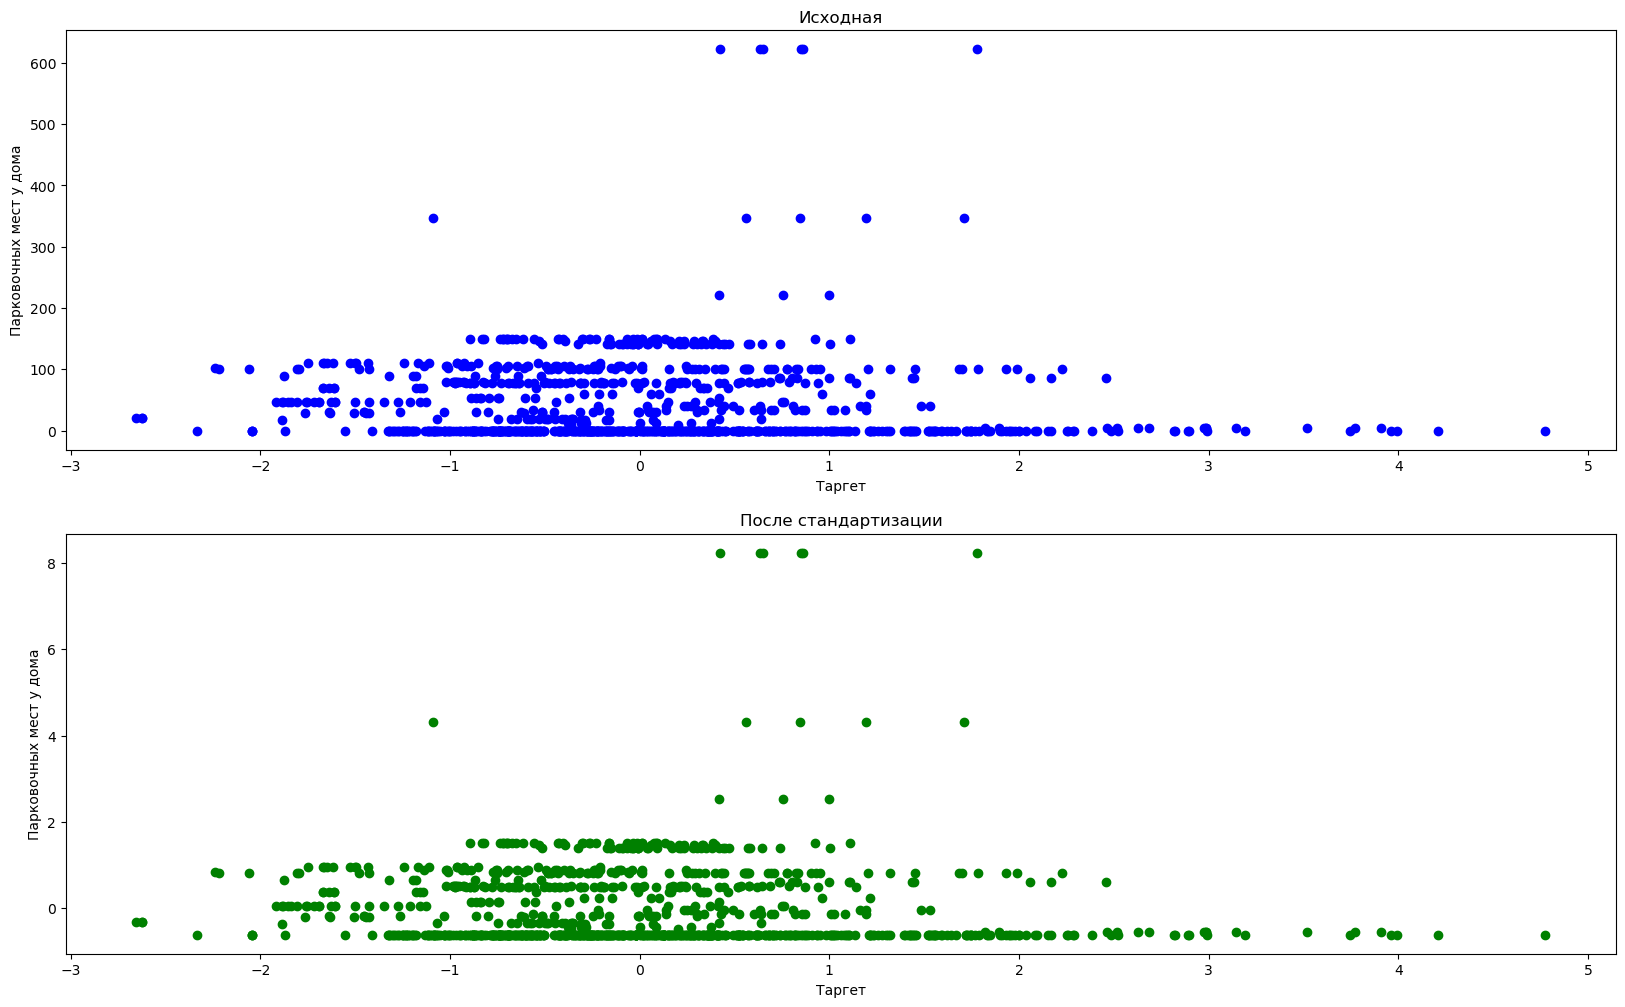

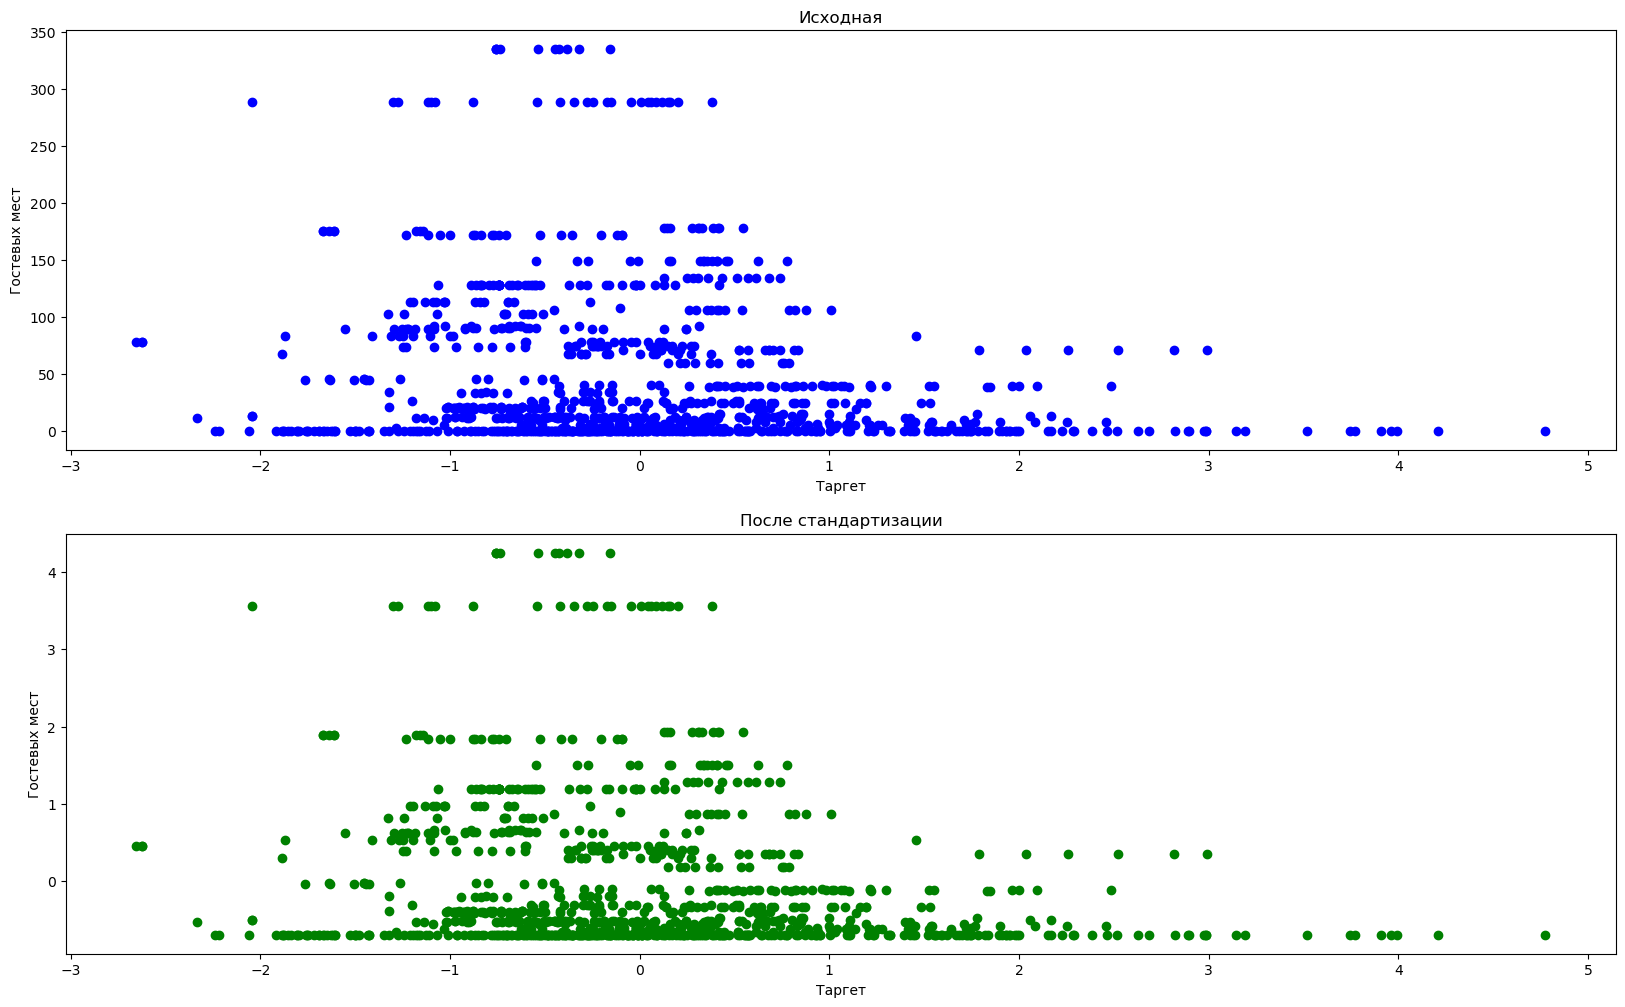

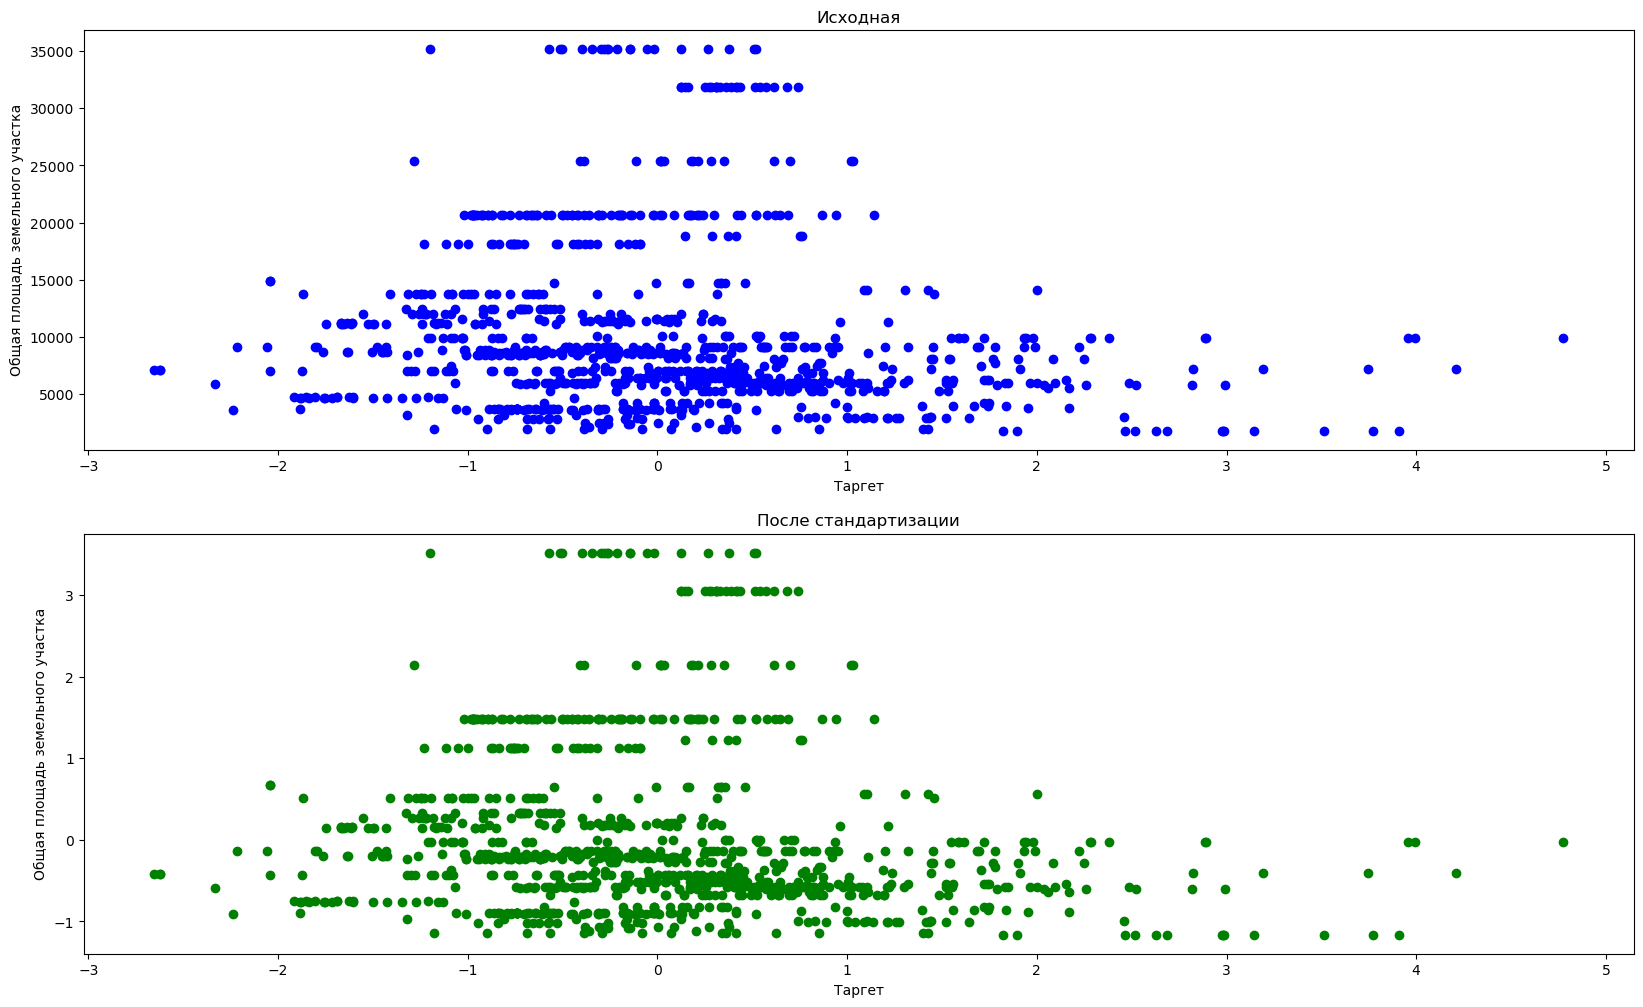

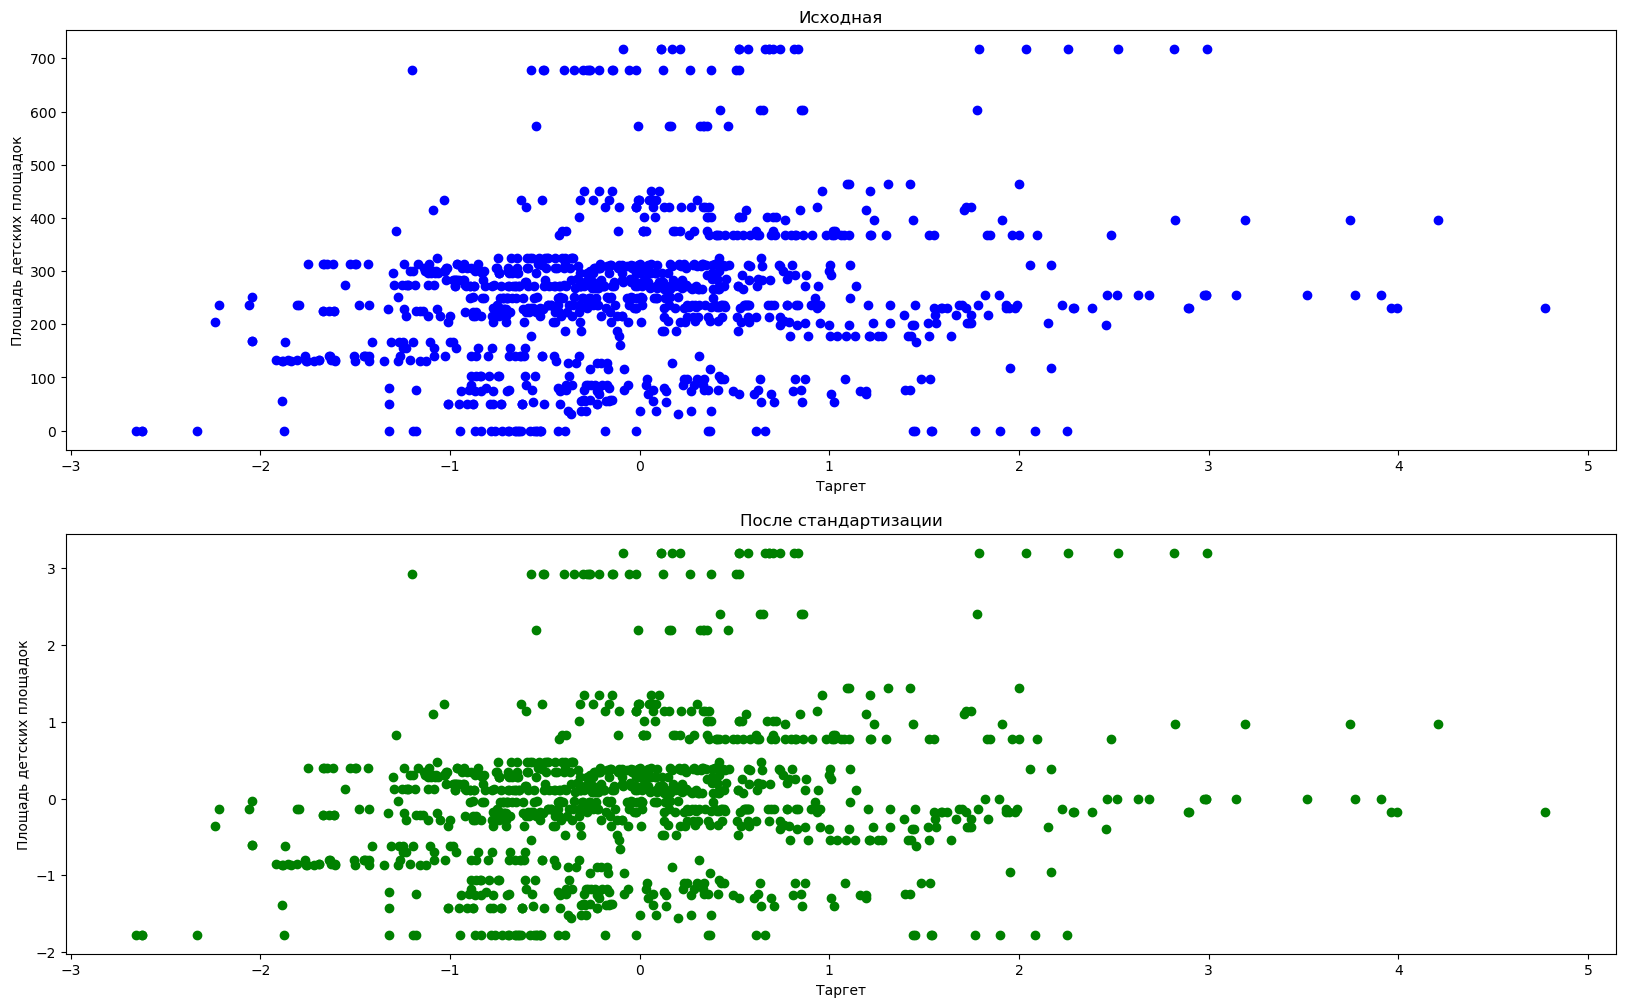

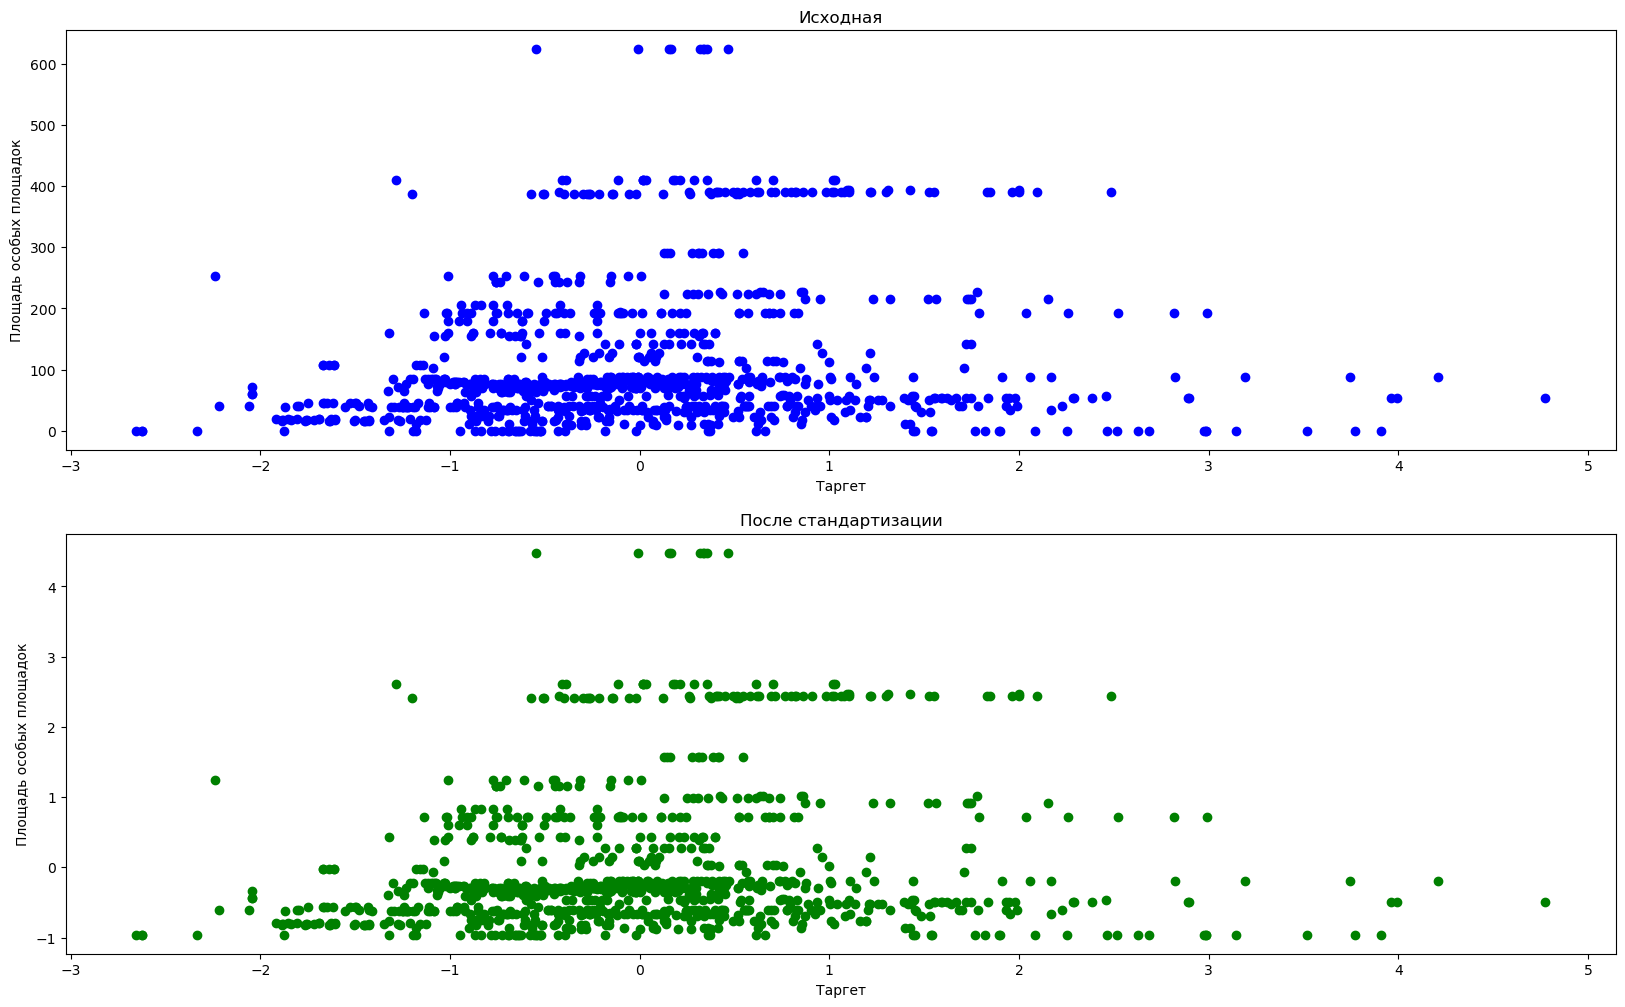

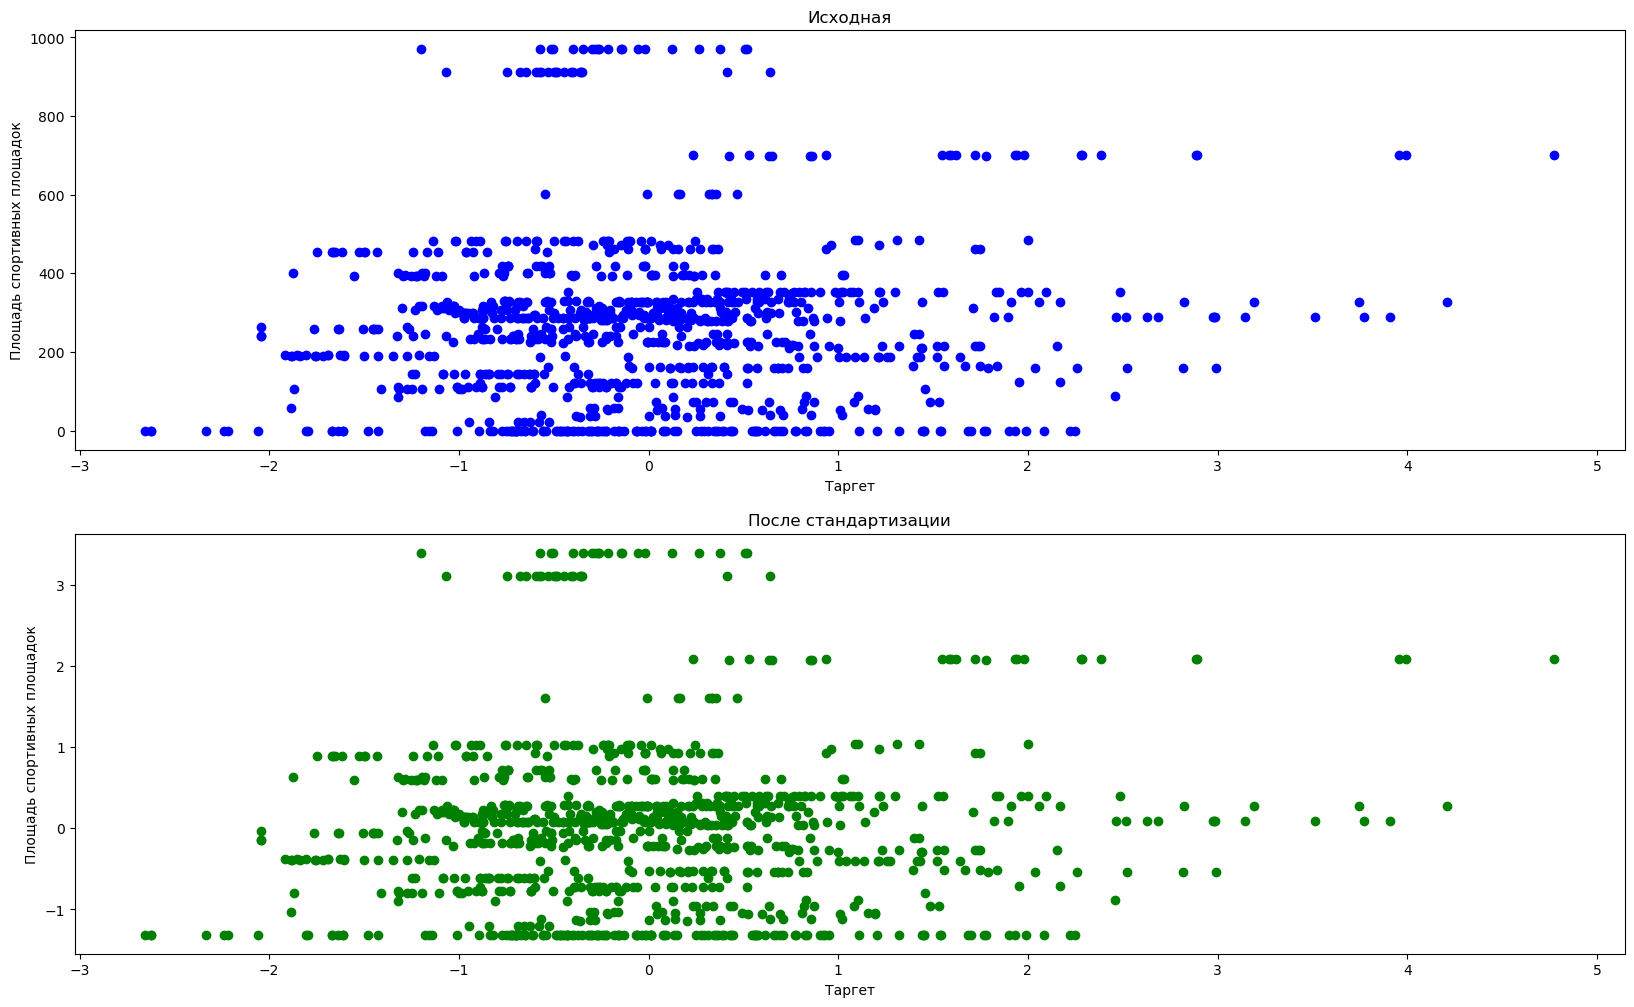

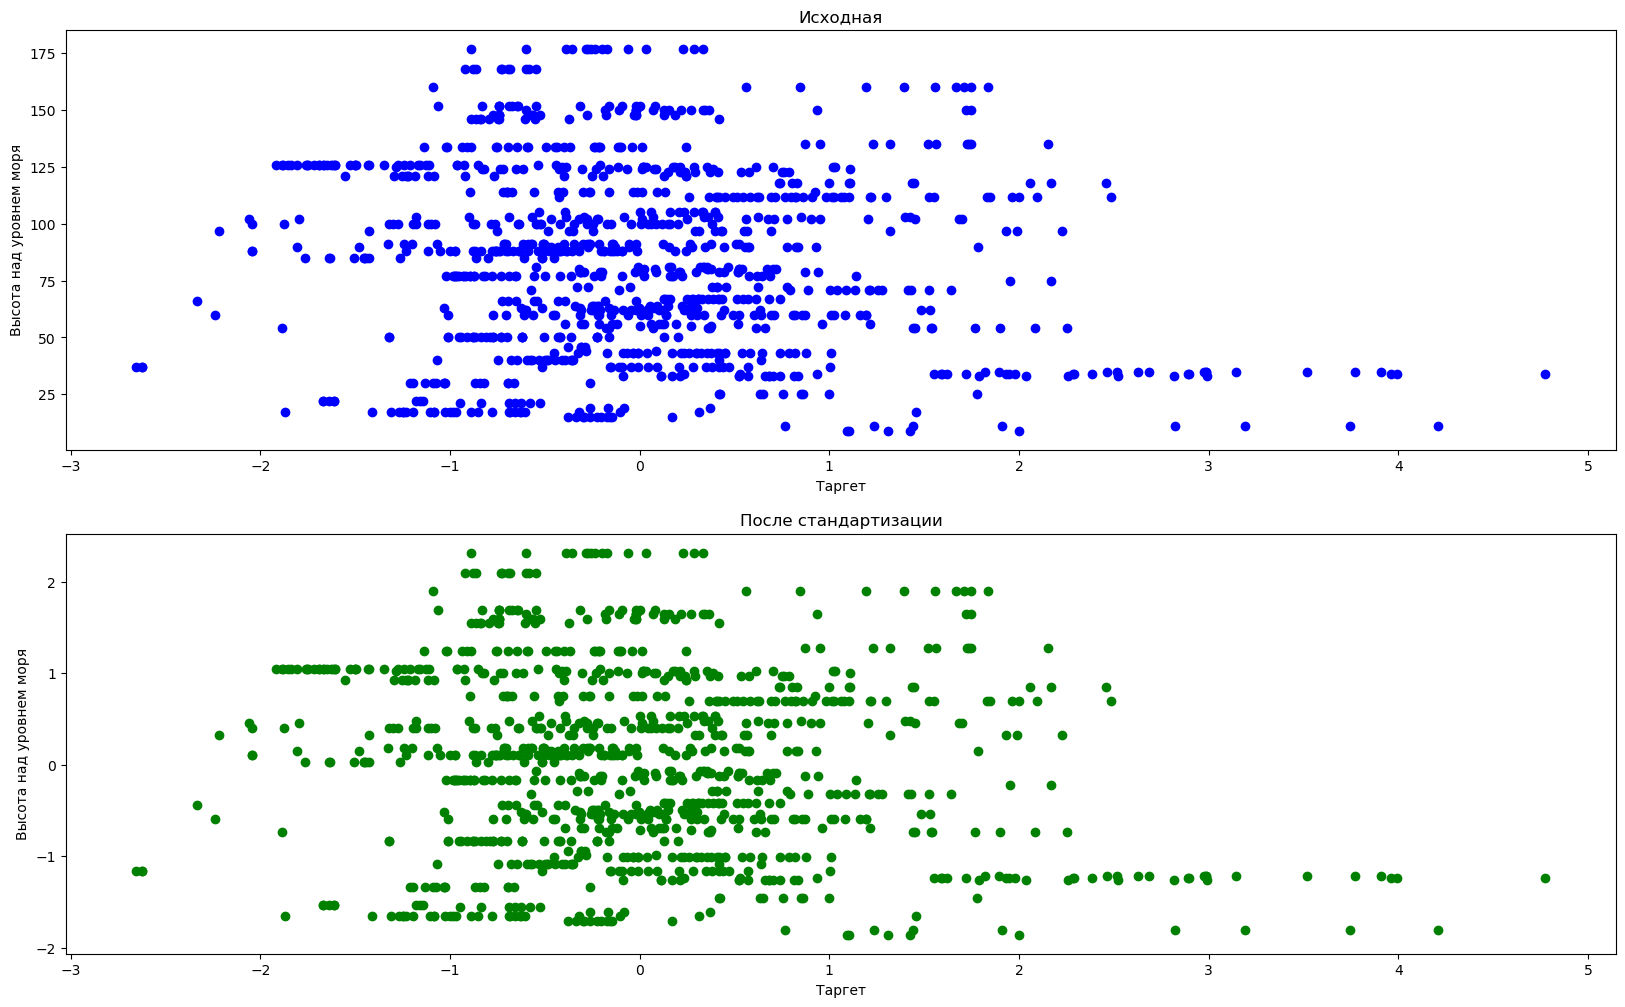

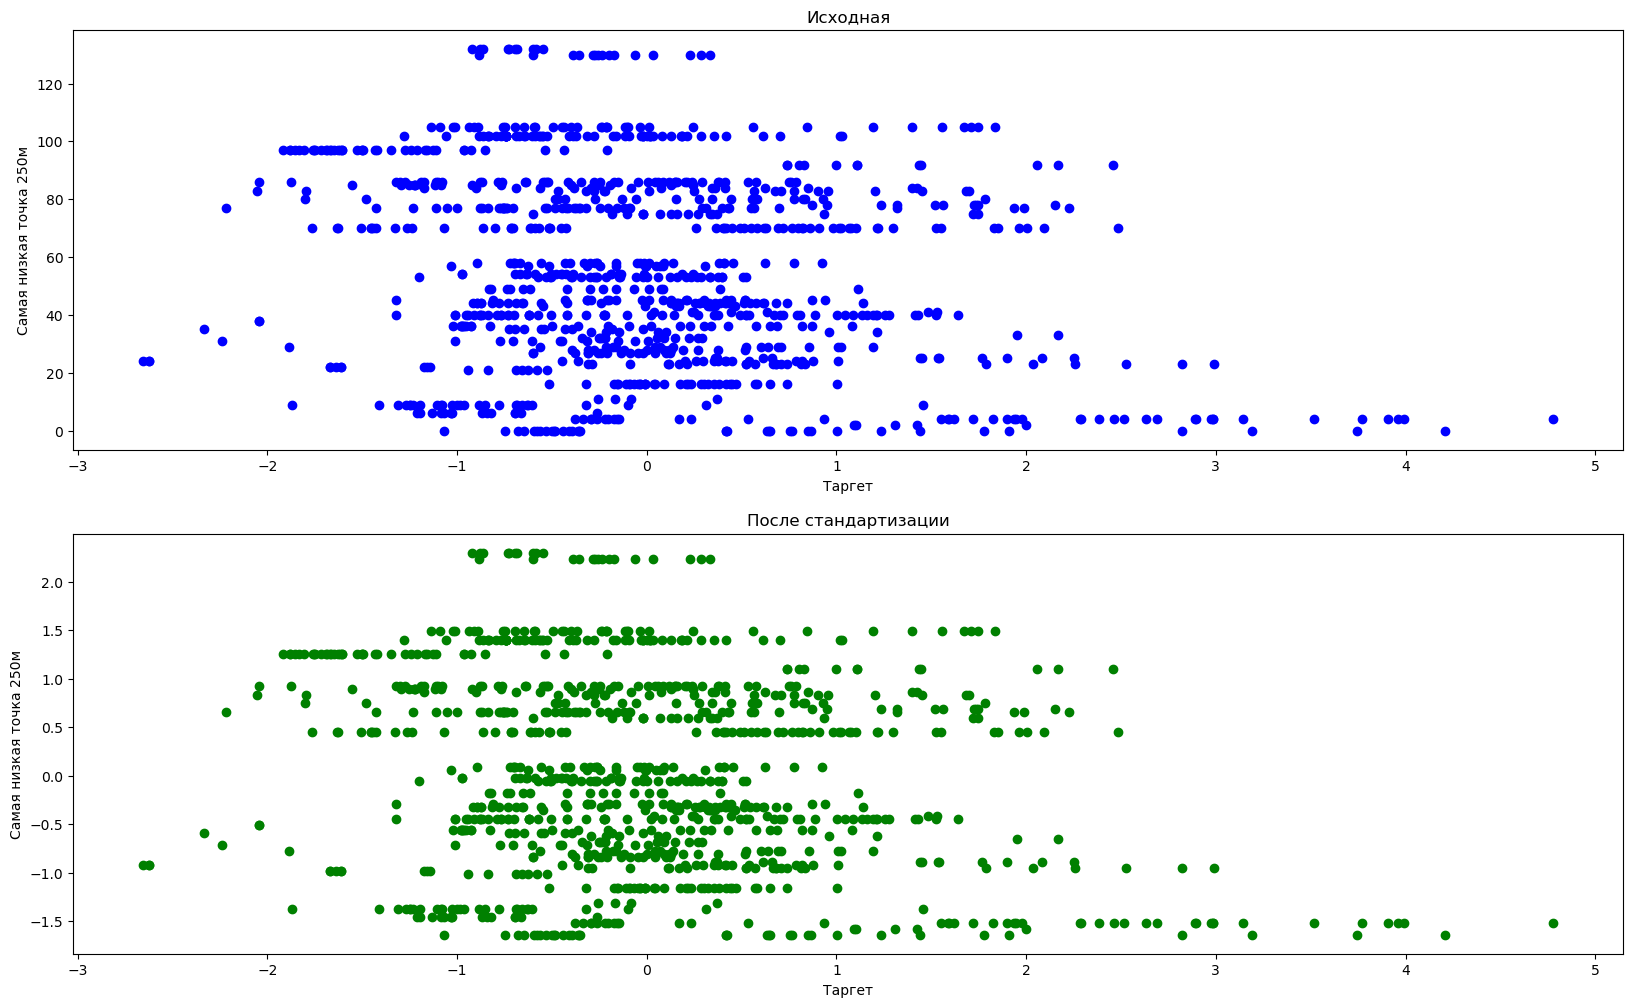

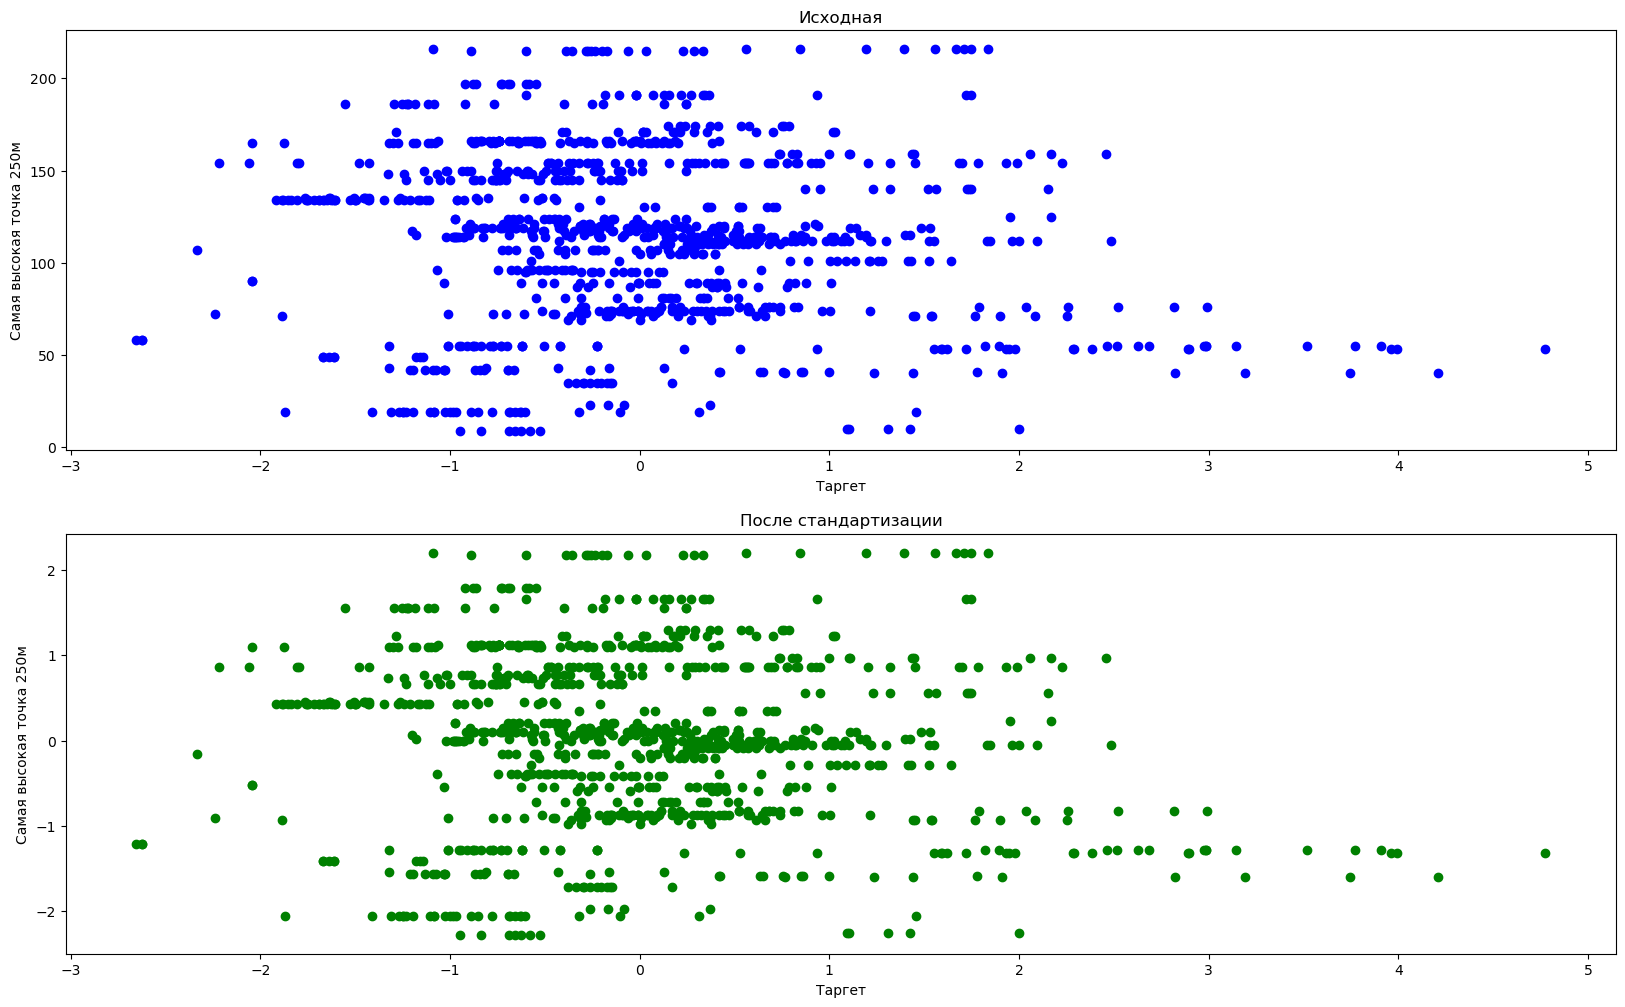

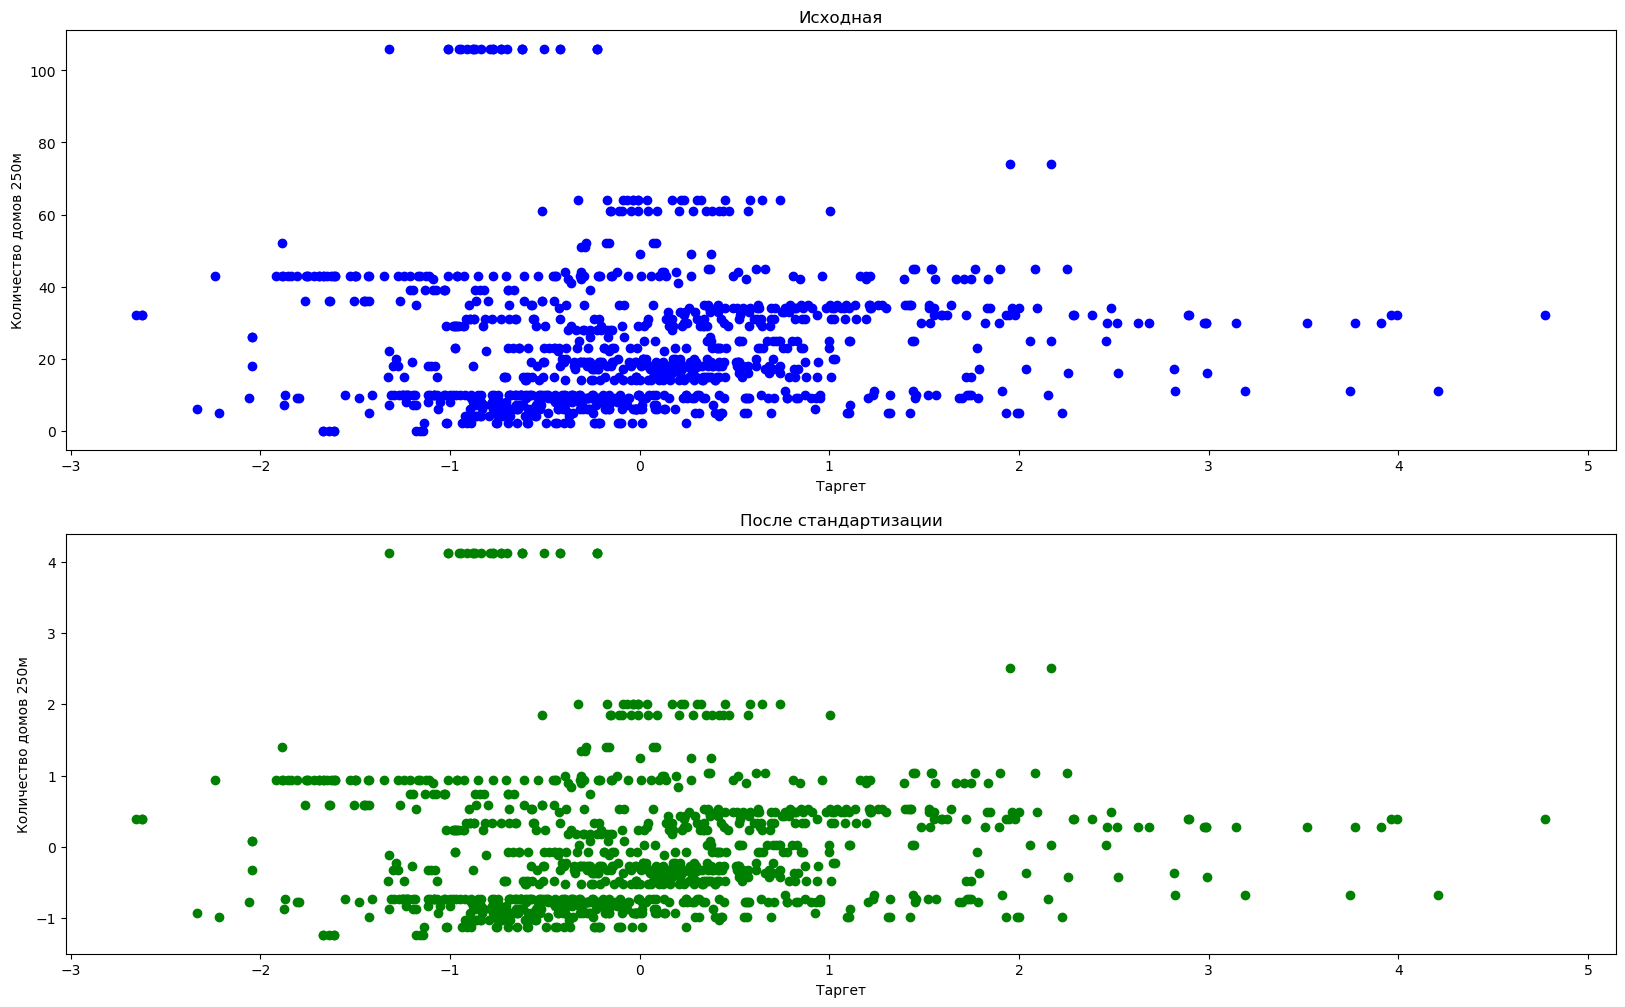

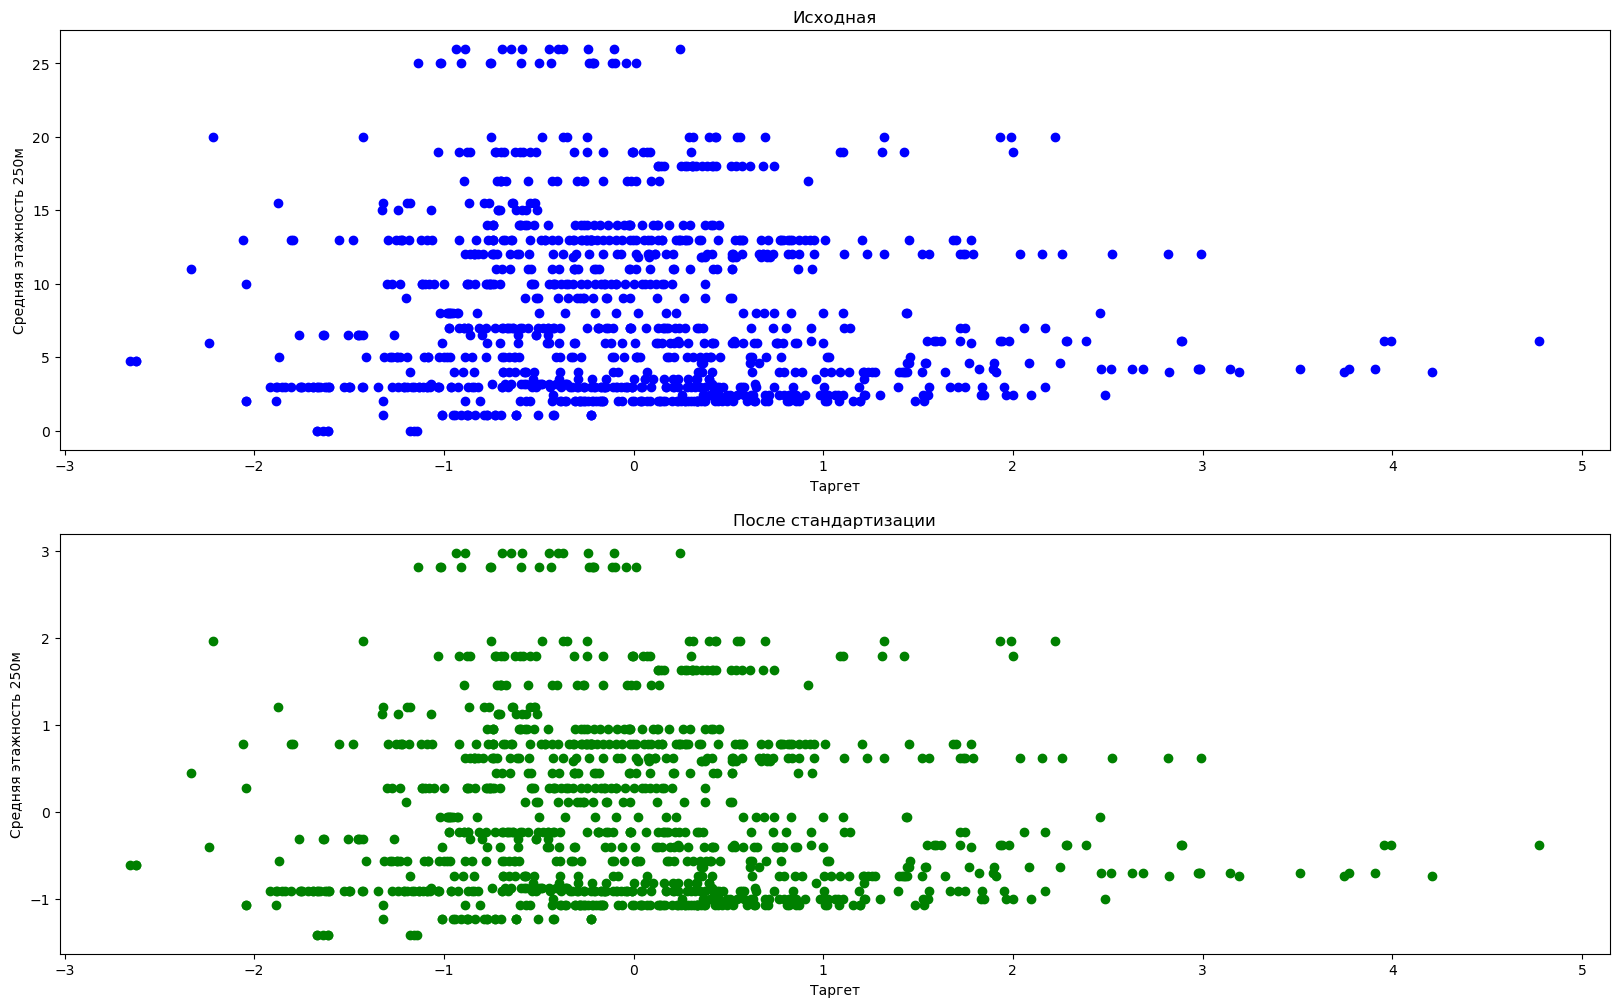

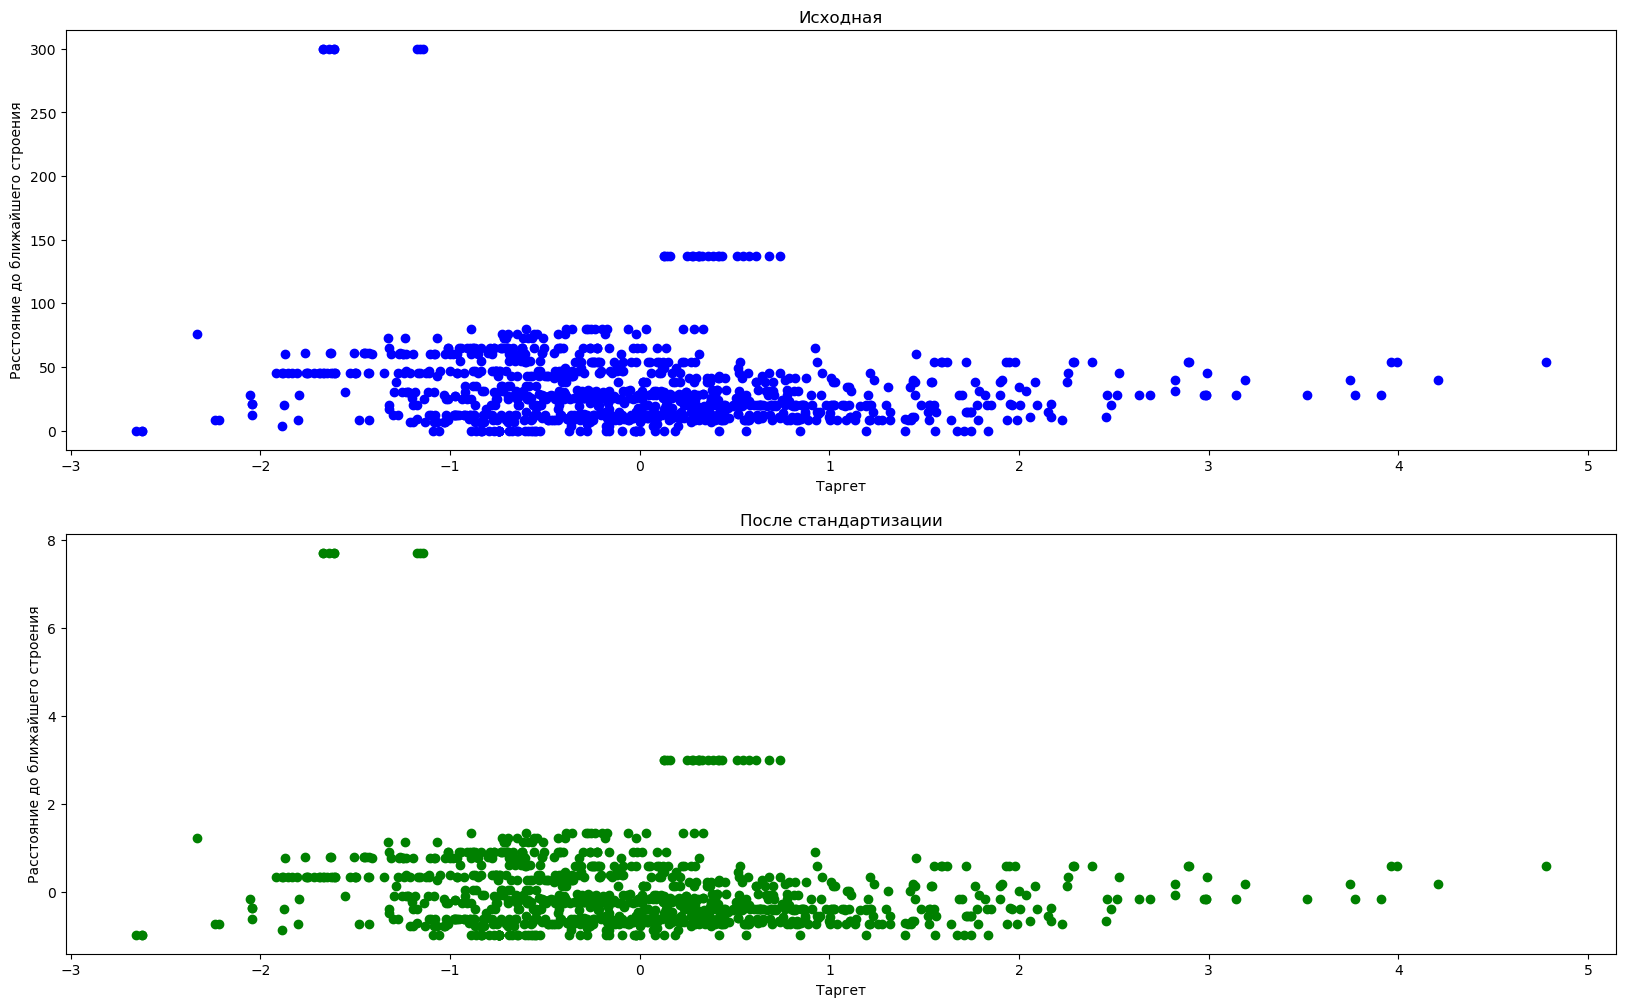

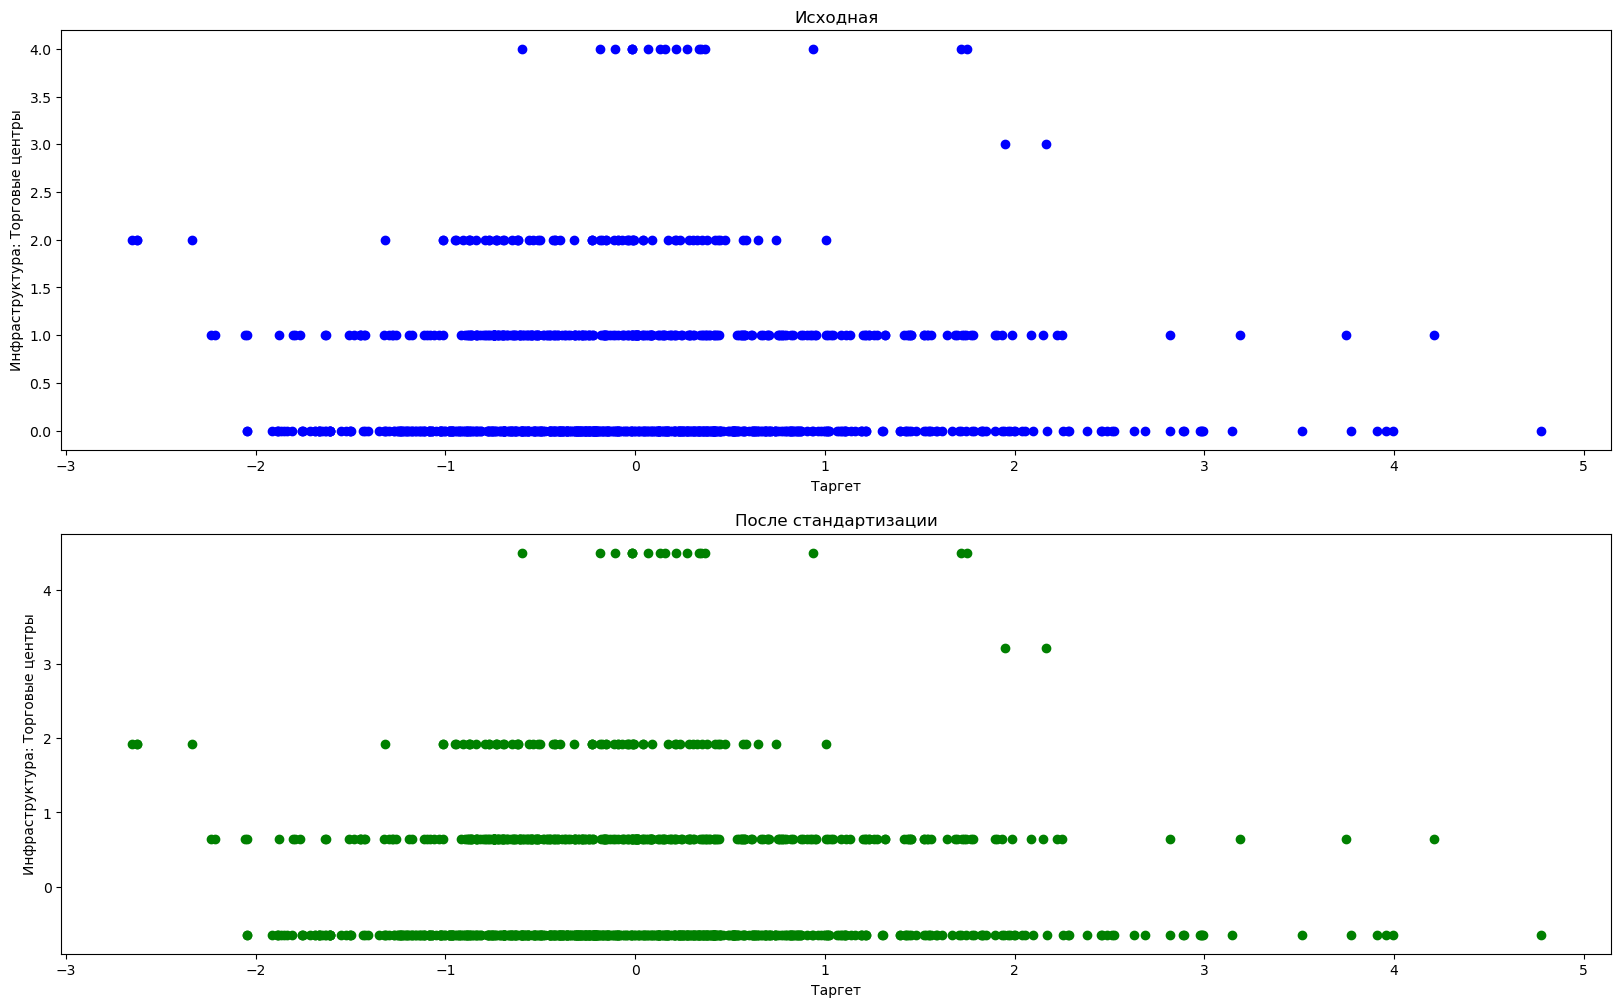

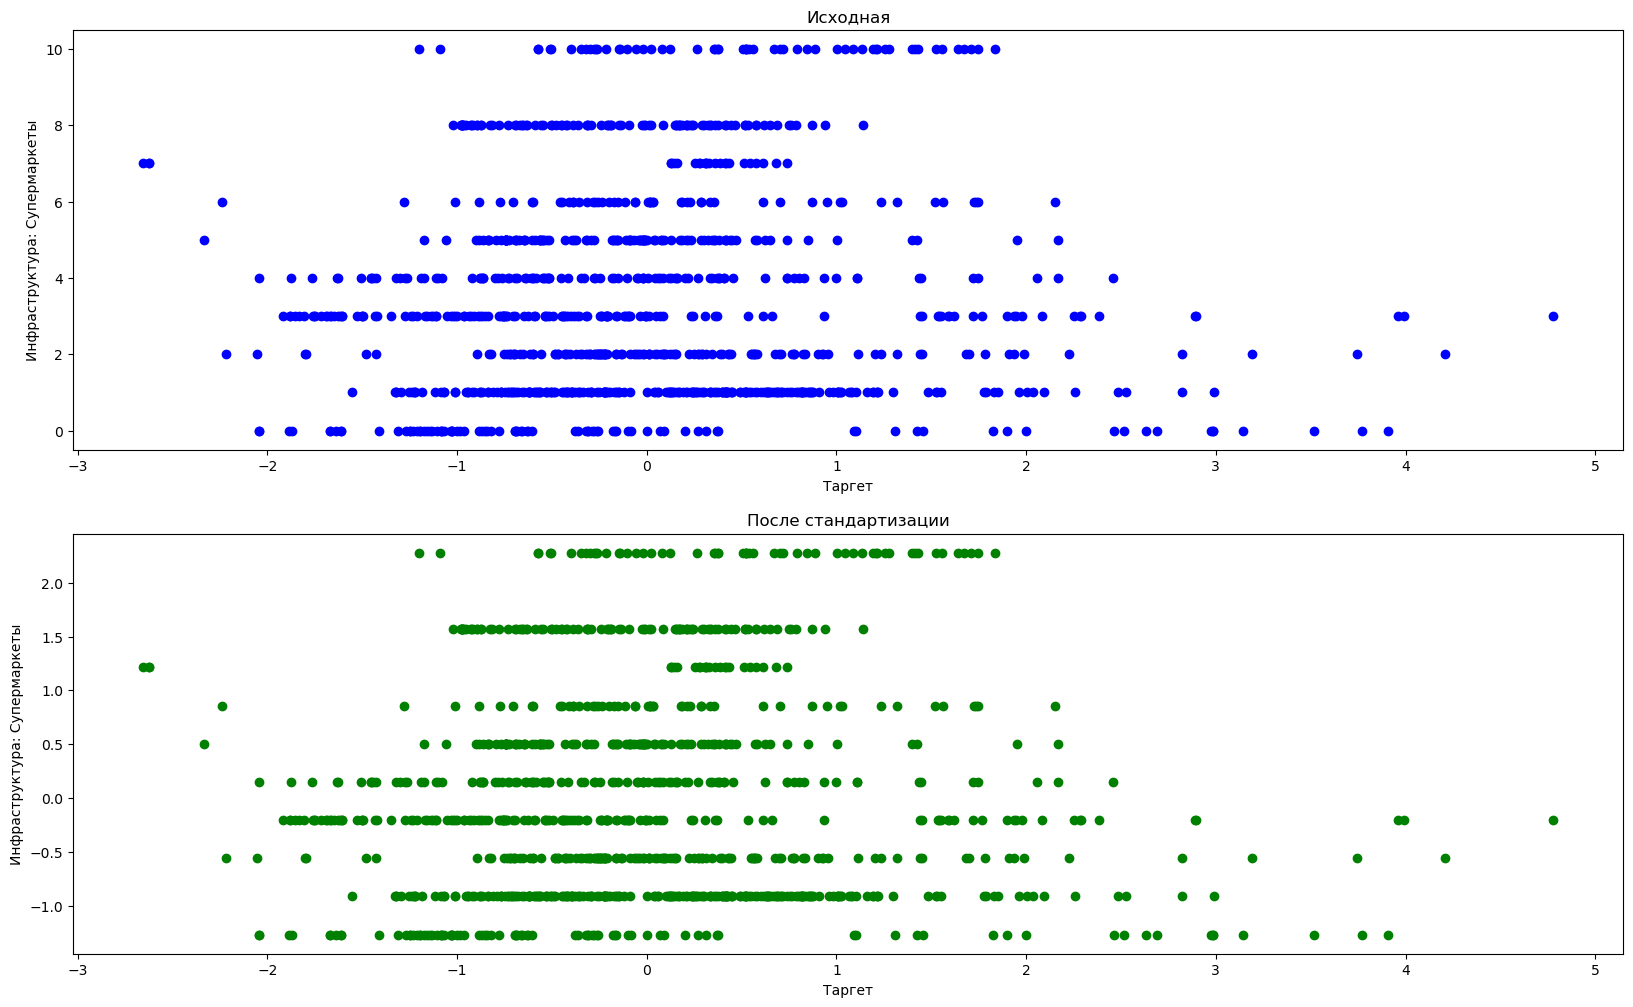

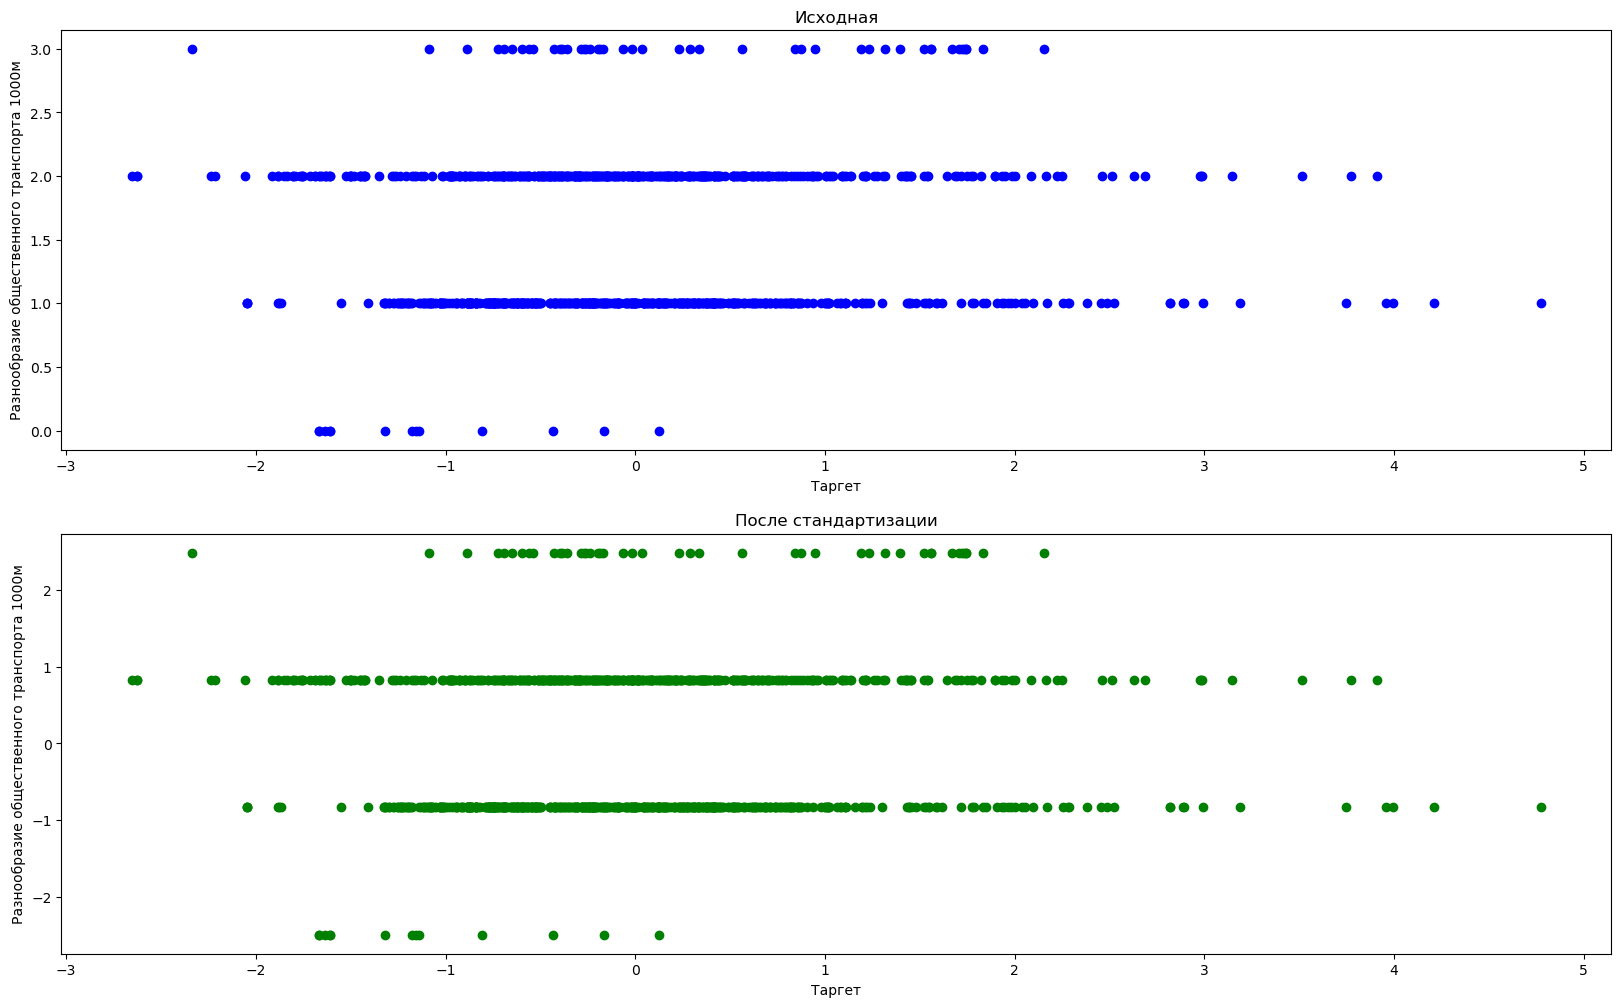

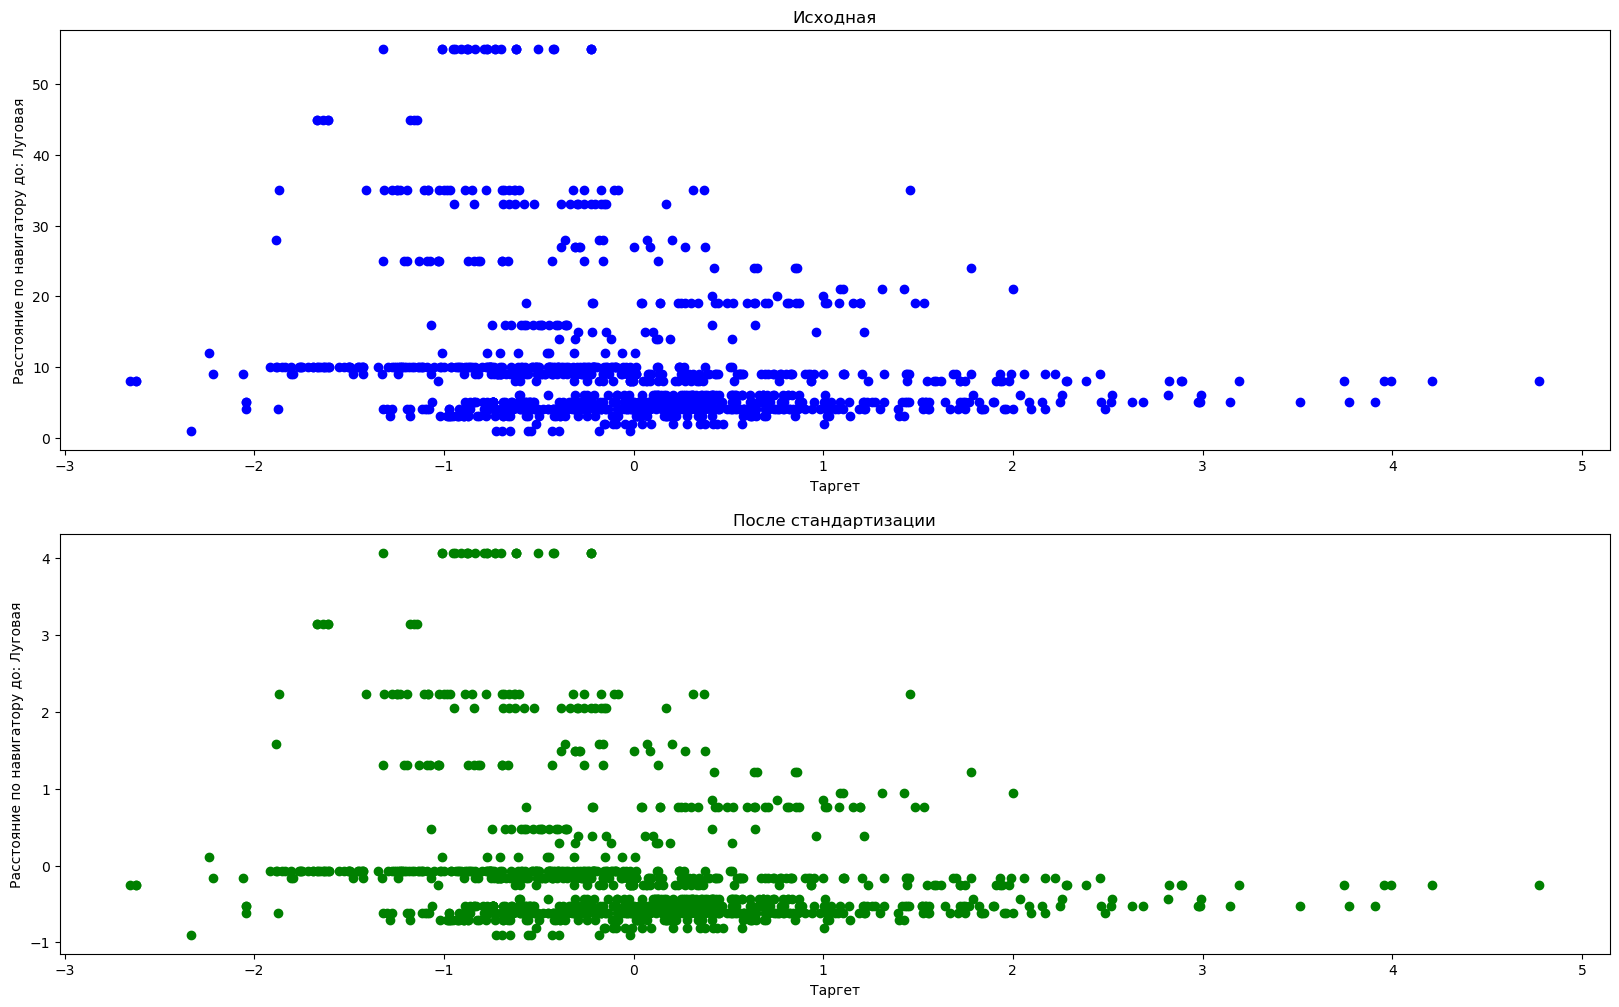

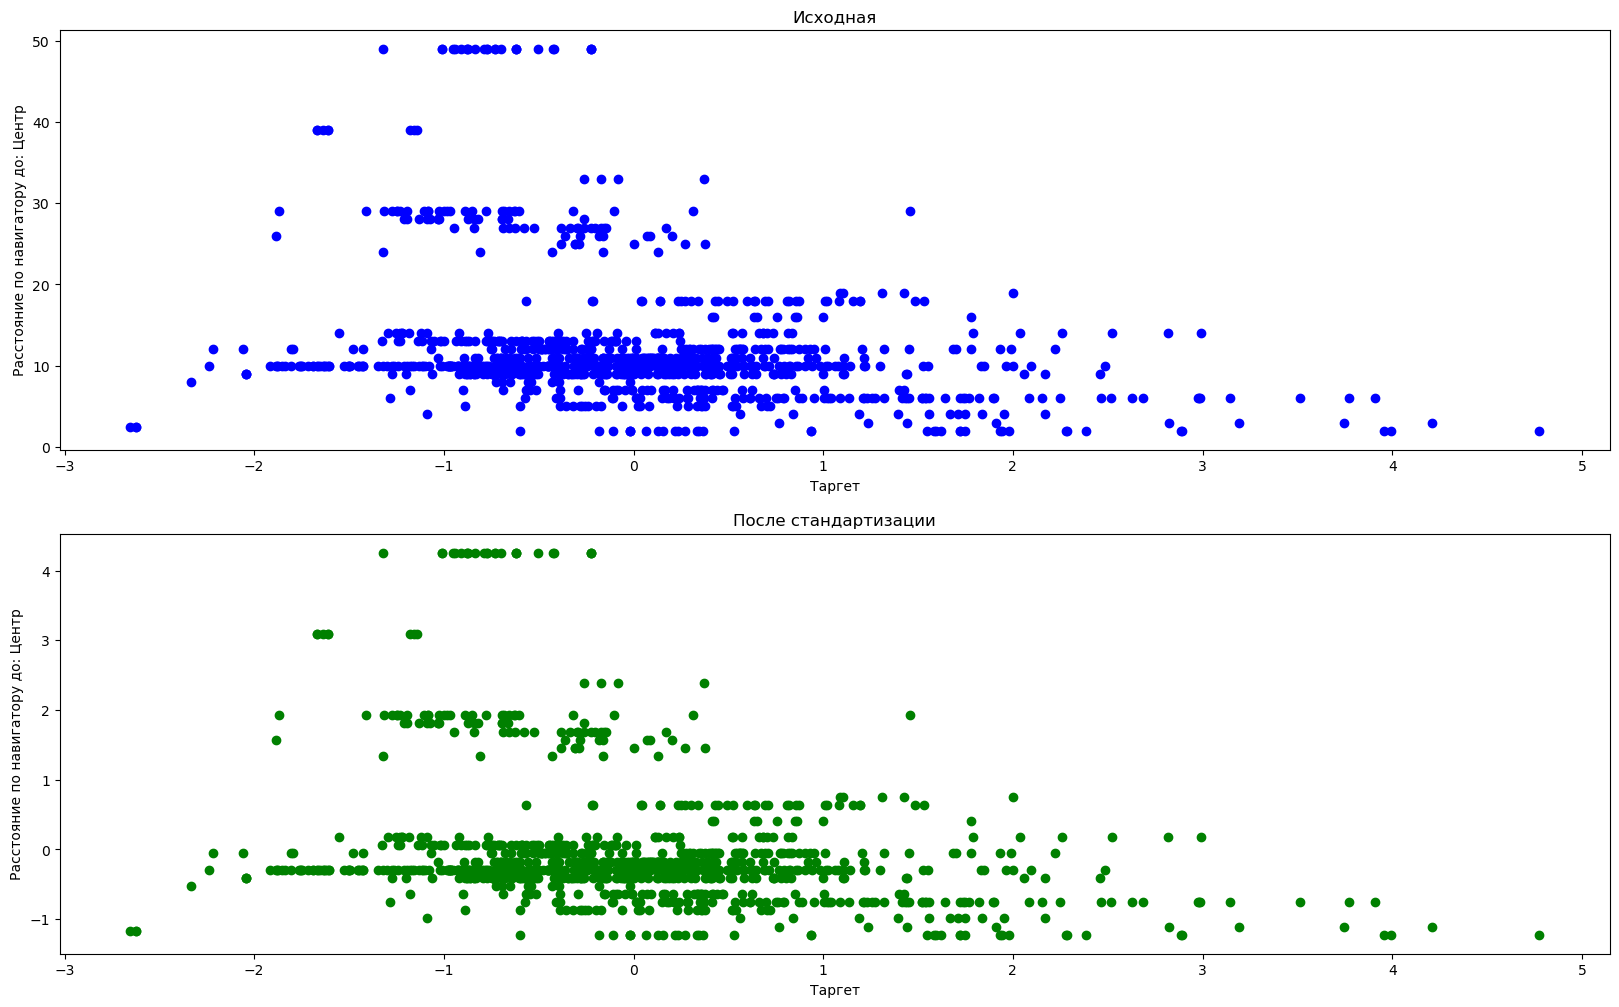

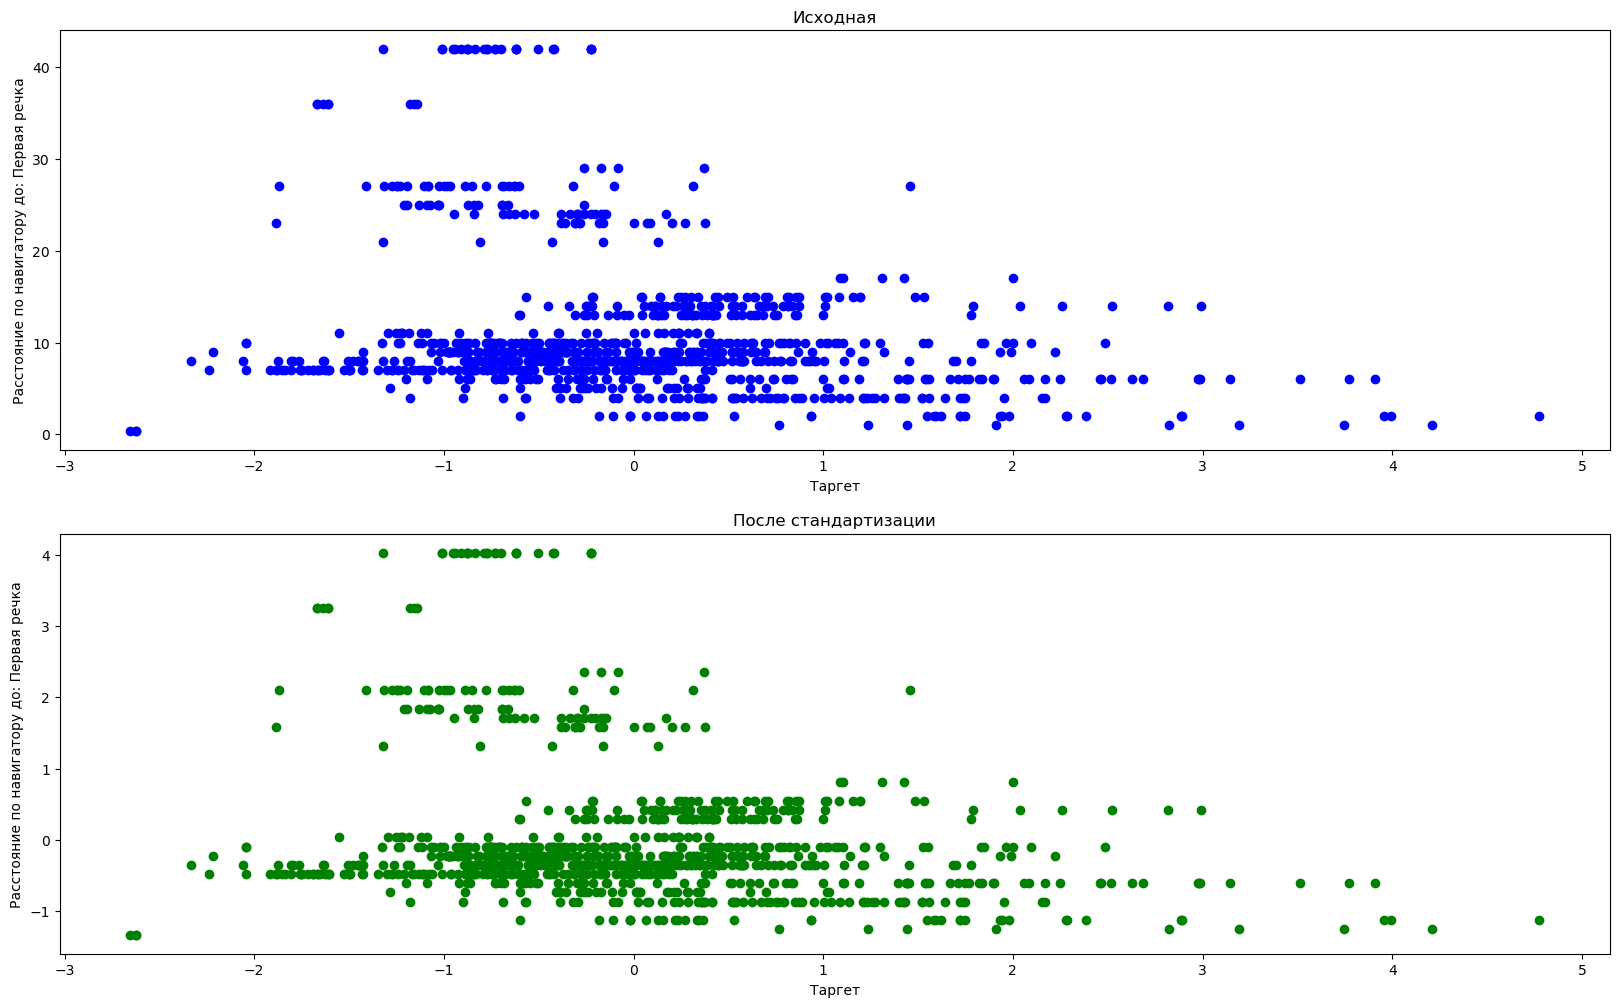

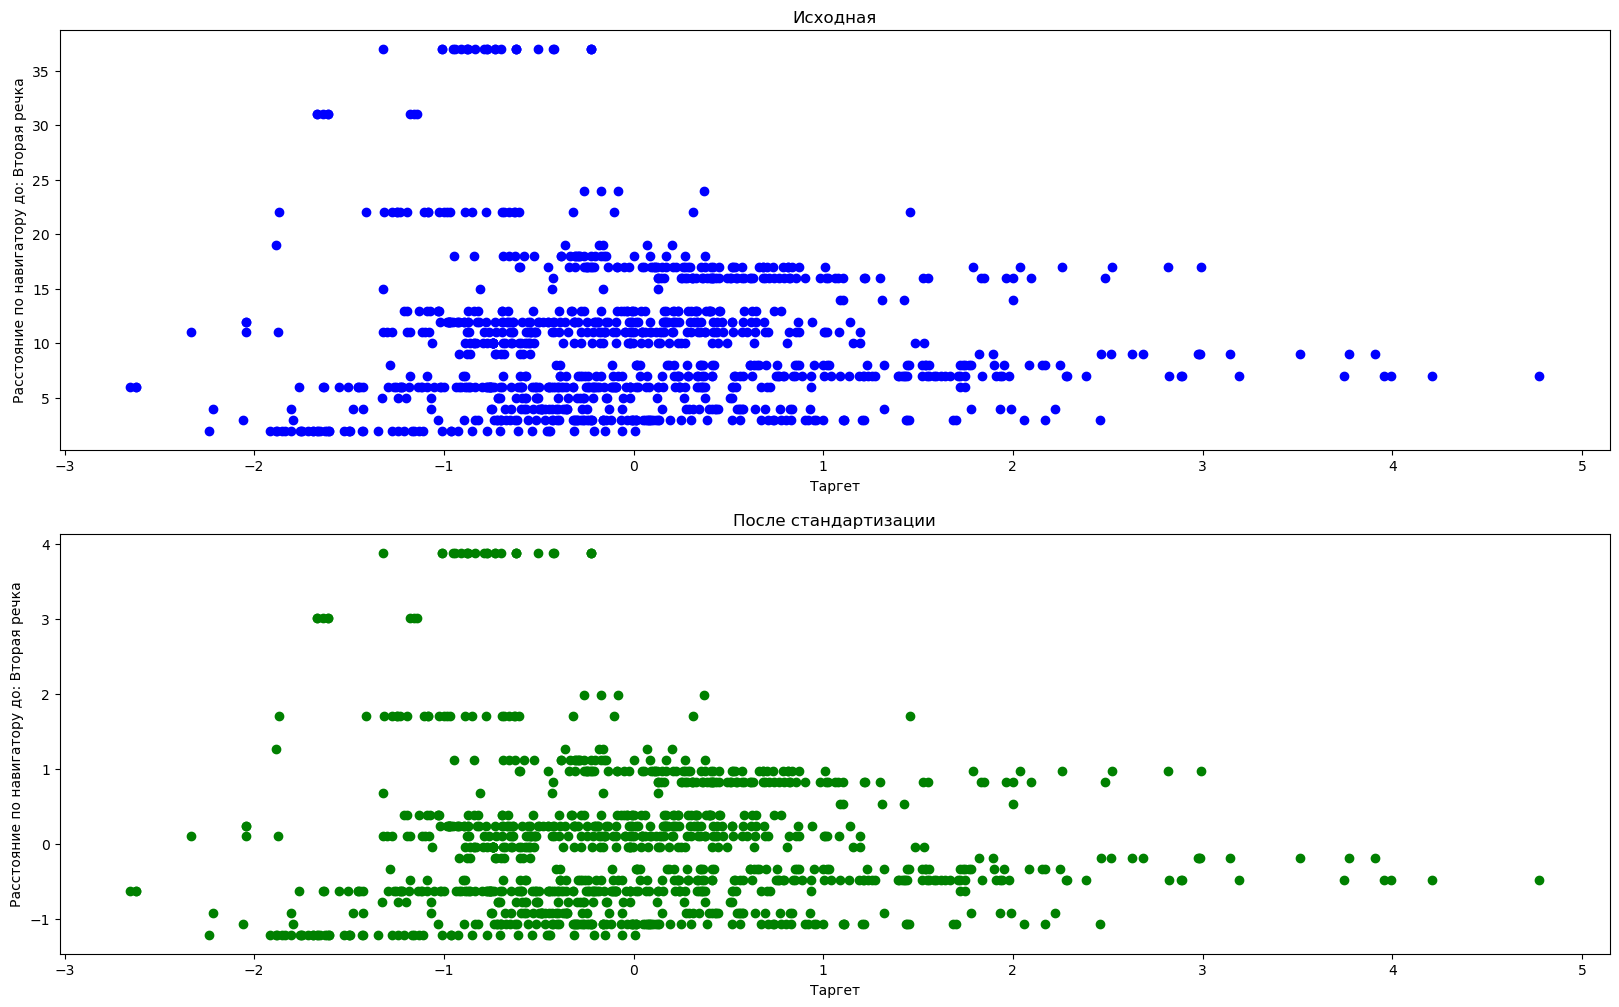

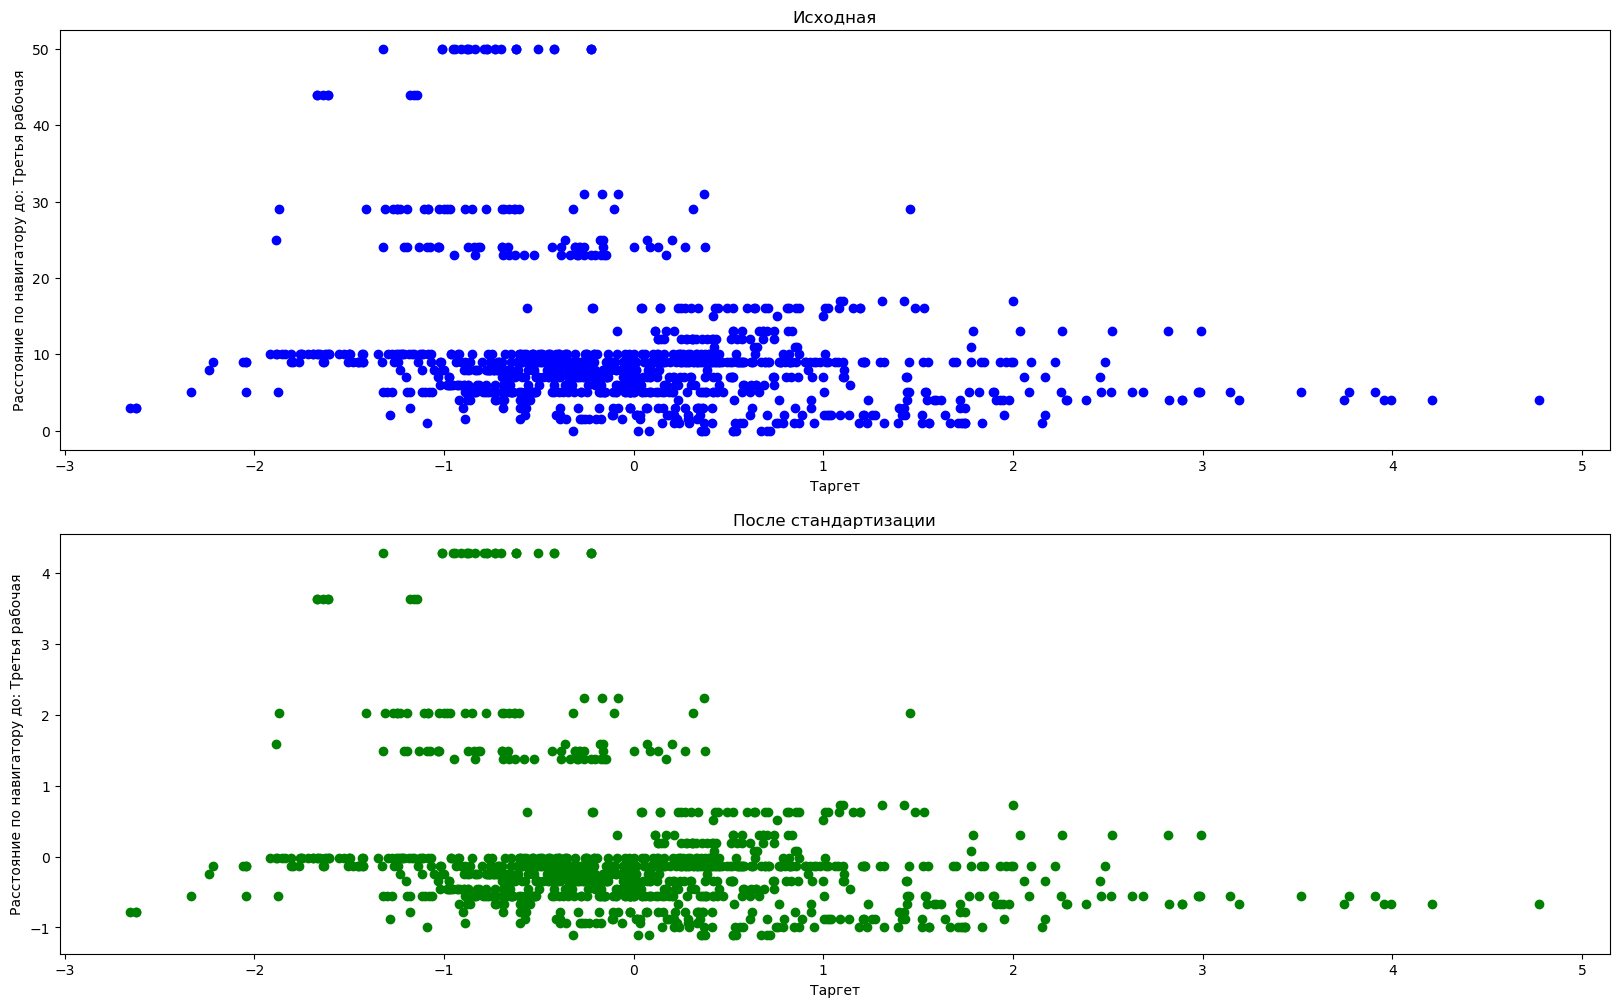

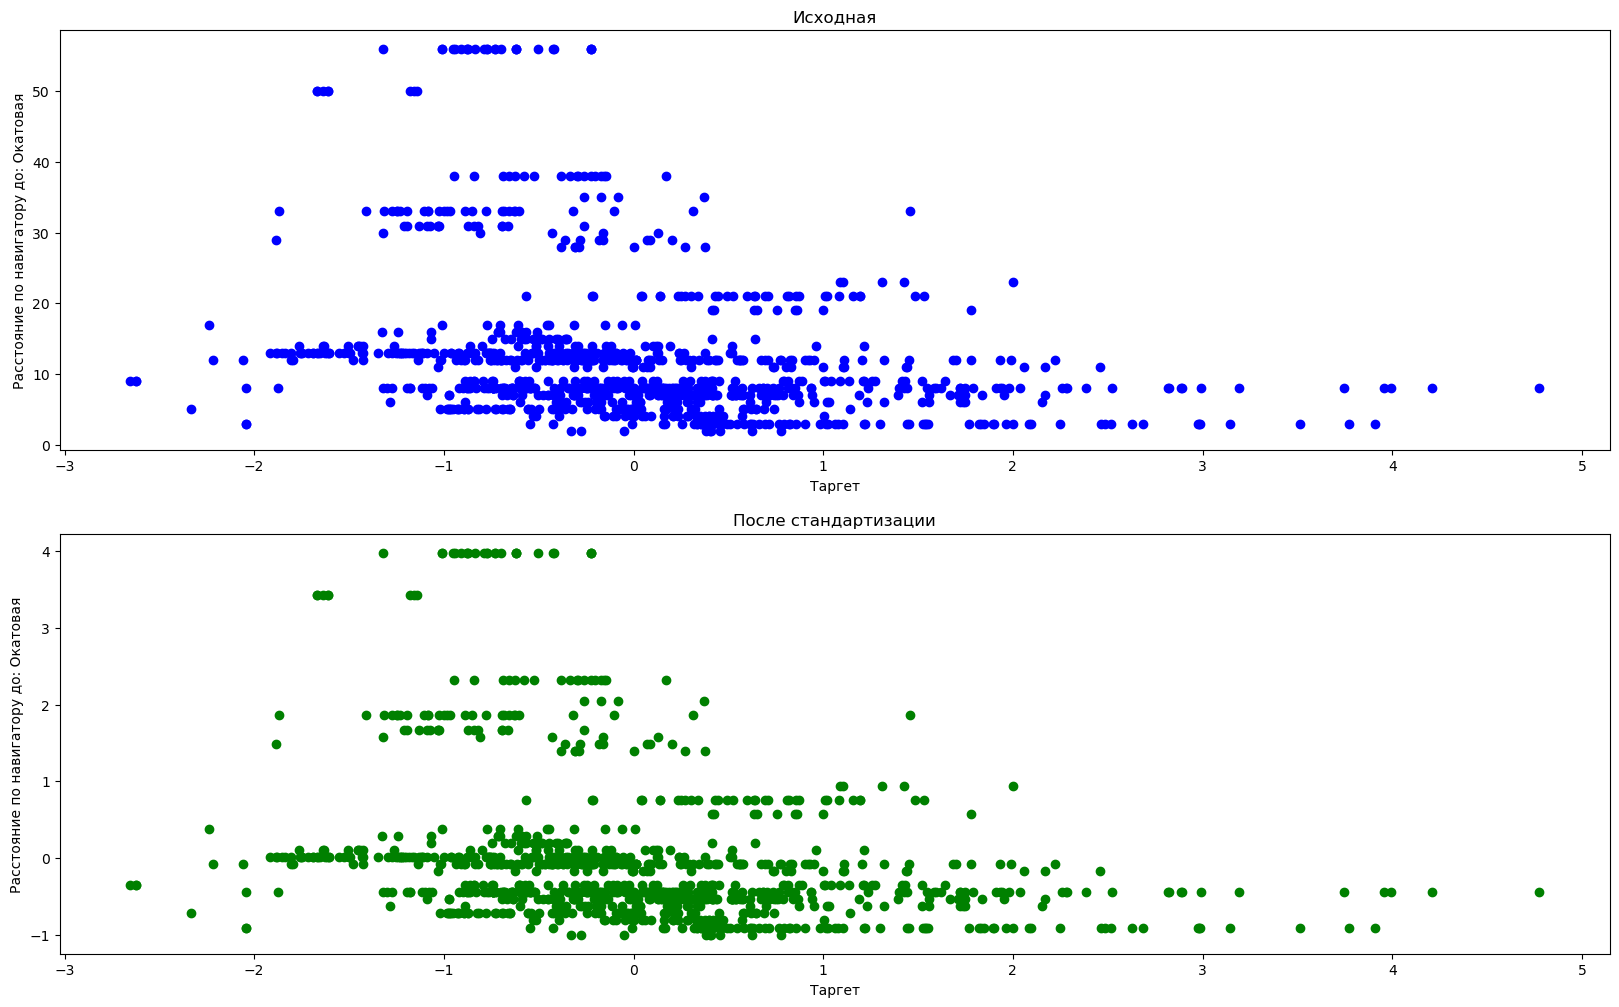

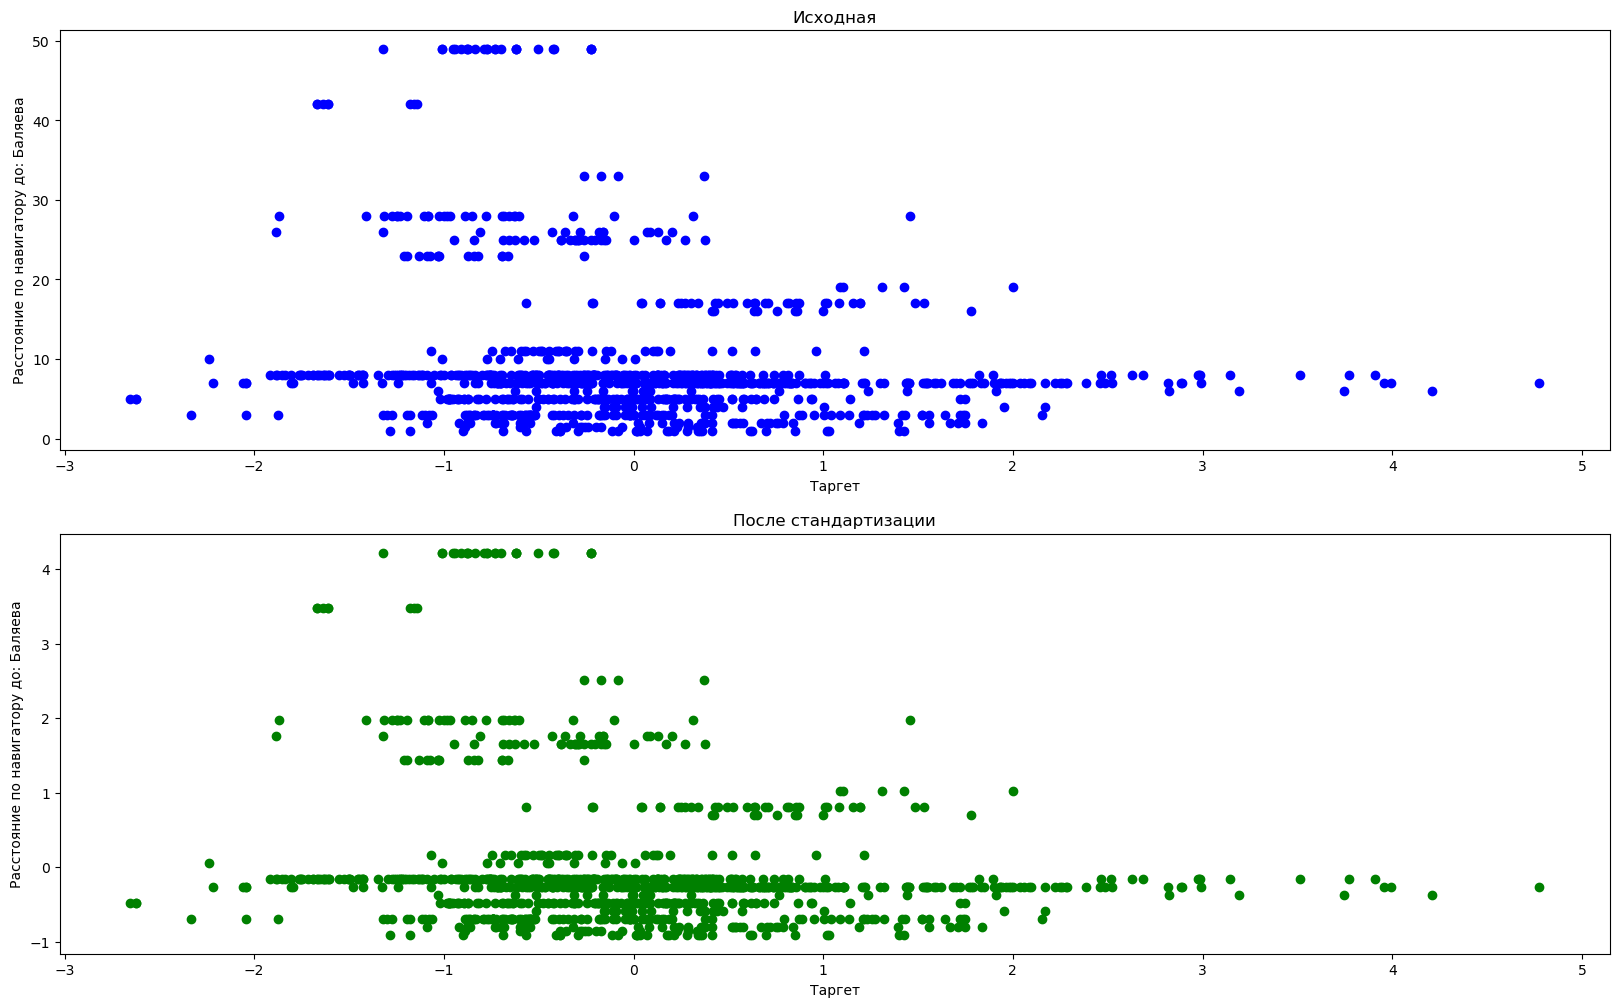

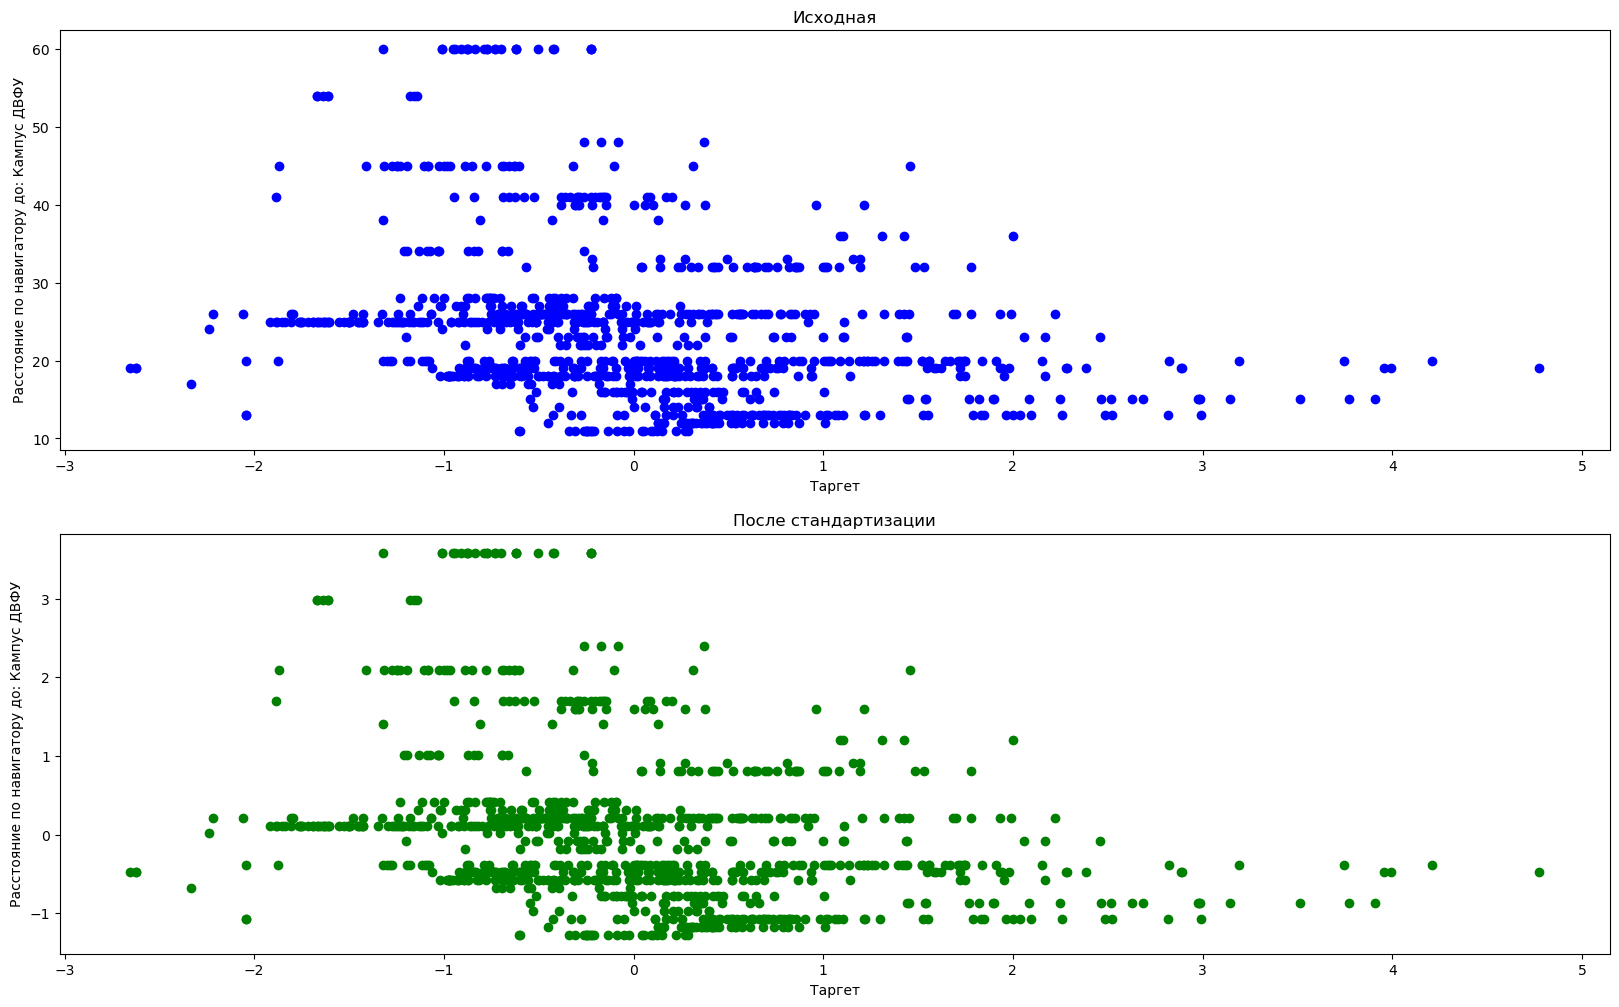

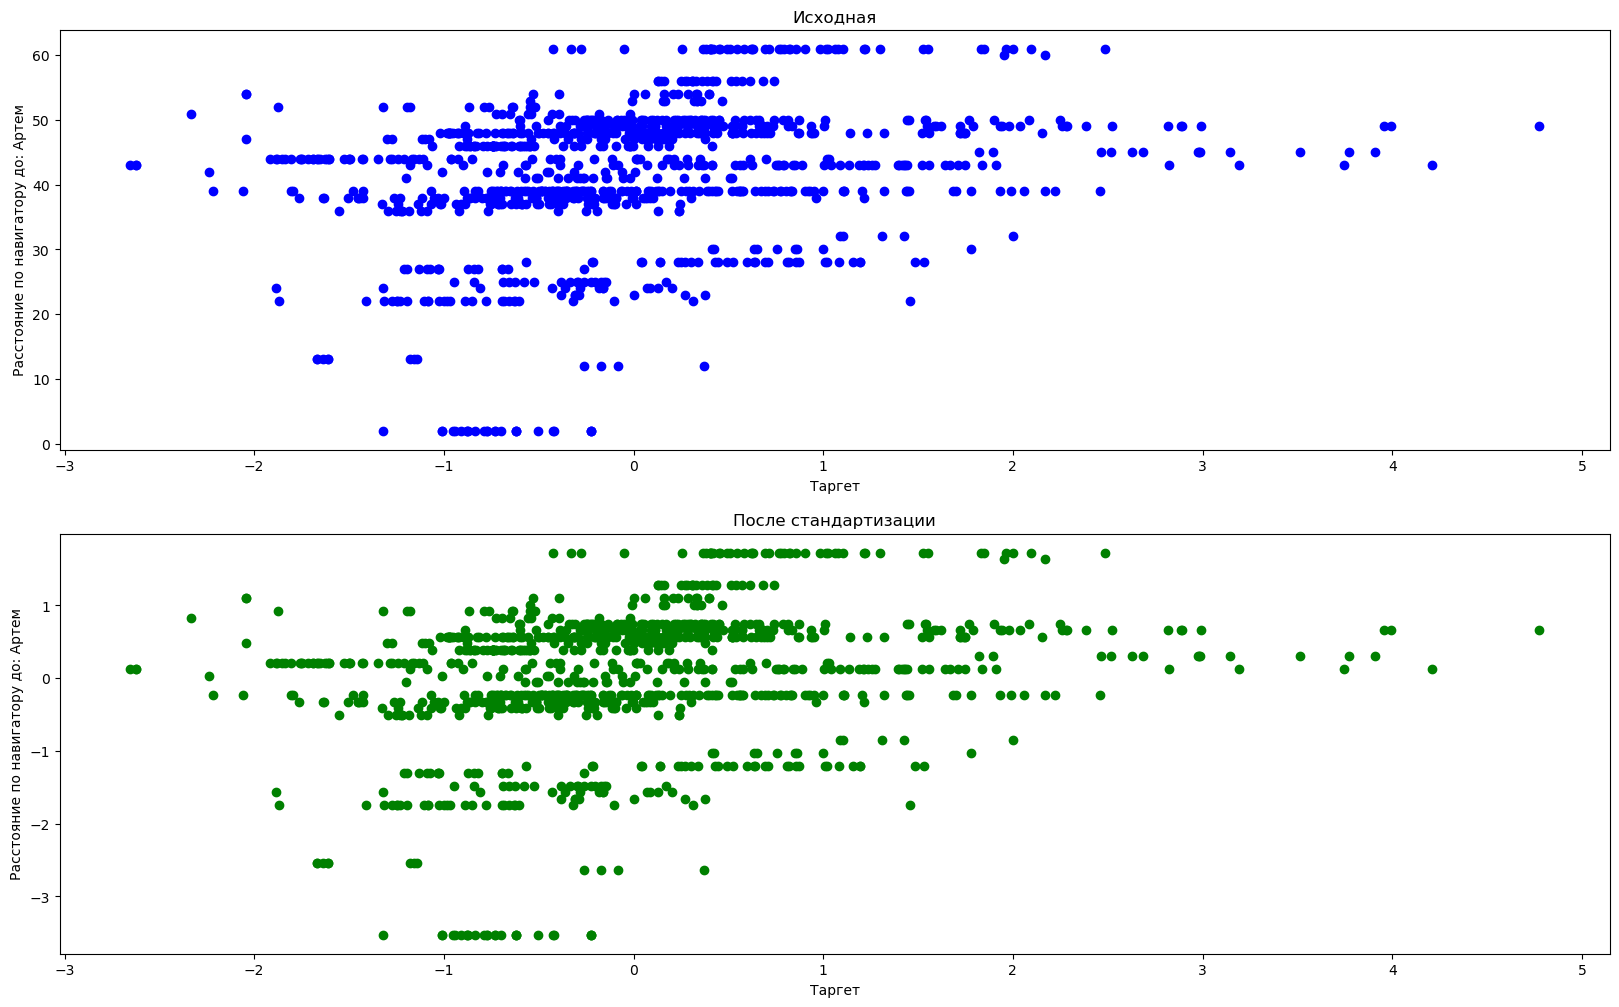

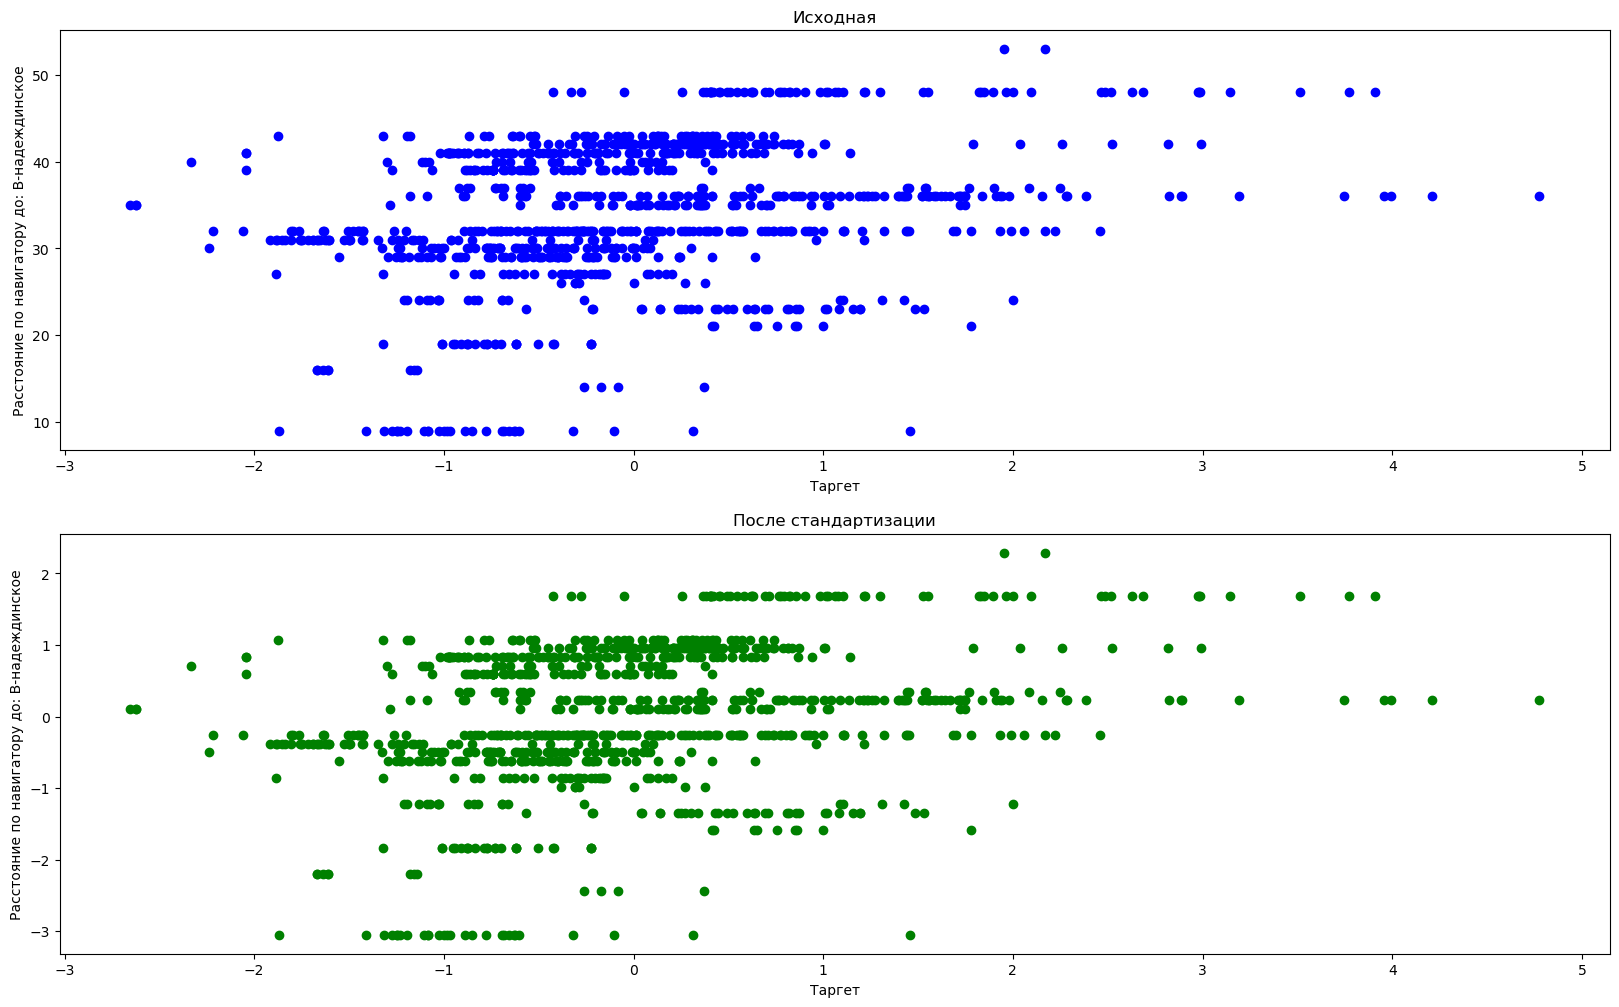

In [20]:
for atr in attributes:
    std_scaler = StandardScaler()

    std_scaler.fit(result[[atr, 'Таргет']])

    std_scaled = std_scaler.transform(result[[atr, 'Таргет']])

    tmp = result[[atr, 'Таргет']]
    result[[atr, 'Таргет']] = std_scaled

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

    ax1.scatter(tmp['Таргет'], tmp[atr], color='blue')
    ax1.set_title('Исходная')
    ax1.set_ylabel(atr)
    ax1.set_xlabel('Таргет')


    ax2.scatter(result['Таргет'], result[atr], color='green')
    ax2.set_title('После стандартизации')
    ax2.set_ylabel(atr)
    ax2.set_xlabel('Таргет')

# result.to_excel(r'/home/maxleb/Desktop/FEIP/square_meter/data/result_norm_df.xlsx', sheet_name='result_norm_df')
result.to_excel(r'../data/result_norm_df.xlsx', sheet_name='result_norm_df')